In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

## data processing: merge datasets, feature engineering

In [113]:
# Import data
influencer_profile = pd.read_excel(r"D:\Python编程\influencer recommendation system project\influencers_profile_data_1000-4000.xlsx")
post = pd.read_excel(r"D:\Python编程\influencer recommendation system project\post1_with_four_adtags.xlsx")
#hashtag = pd.read_csv(r"D:\Python编程\influencer recommendation system project\hashtags_aggregated_by_influencer.csv")

In [78]:
#influencer_profile = pd.read_excel(r"D:\Python编程\influencer recommendation system project\profile_new.xlsx")
#influencer_profile = influencer_profile.drop_duplicates(subset=['user_id', 'username'])

In [79]:
influencer_profile

,user_id,username,full_name,category,follower_count,biography,profile_pic_url,is_business,is_verified,media_count,instagram_location_id
0,171146,shanedawson,Shane Dawson,Video creator,7286023,🎙️ @shanedawsonpodcast\nNEW VIDEO🔻⬇️,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4362,NaN
1,181587,eddievolkman,Eddie Volkman,DJ,3644,Program Director and Afternoon Co-Host on WSSR...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,False,2953,NaN
2,311960,manuel.bartual,Manuel Bartual,Writer,12230,✍🏻 Guionista y entusiasta. \n✨ Creador de Biot...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1696,NaN
3,476322,redbull,Red Bull,NaN,26417175,watch the World Of Red Bull👇\n#givesyouwiiings,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,10562,1.422655e+10
4,487760,loracarola,carolina dieckmmann,Artist,8484854,múltipla\n🐯✴️⚡️\nag: comercial@twogether.com.b...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,9625,1.099561e+14
...,...,...,...,...,...,...,...,...,...,...,...
3780,209501464,tracymorgan,Tracy Morgan,Comedian,908993,NaN,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,527,NaN
3781,21289594,tulsigabbard,Tulsi Gabbard,Public figure,1681258,Former Congresswoman. Ran for President. Veter...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,2938,NaN
3782,296163023,likenastya,Like Nastya,Blogger,1407657,The biggest kid YouTuber in the world \n⭐350...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,1366,NaN
3783,212077332,nygovcuomo,Governor Andrew M. Cuomo,NaN,811389,"Father, fisherman, motorcycle enthusiast, 56th...",https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,2511,NaN


In [142]:
user_product_pairs = pd.read_csv(r"D:\Python编程\influencer recommendation system project\influencer_product_recommendation_final.csv")

In [41]:
unique_count = influencer_profile['user_id'].nunique()
print(f"\n唯一user_id的数量: {unique_count}")
influencer_profile.head()


唯一user_id的数量: 2713


,user_id,username,full_name,category,follower_count,biography,profile_pic_url,is_business,is_verified,media_count,instagram_location_id
0,953293389,iss,International Space Station,Government organization,8827511,The International Space Station is a collabora...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,3443,NaN
1,436393844,davidvilla,David Villa,Athlete,8921848,President at DV7 Group\nFollow our projects at...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1658,2.071474e+10
2,215594213,gameofthrones,gameofthrones,TV show,8924078,Only one can rule.\nStream all seasons of #GOT...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1312,7.413370e+10
3,35106392,iamdesibanks,Desi Banks,Comedian,8887718,🙏🏾 God 1st #PurposeChaser\nActor | Comedian | ...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,2954,NaN
4,29602280,neelofa,Neelofa,Entrepreneur,8651444,Founder of @naelofar @nunha @nilofaplus @theno...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,2886,NaN


In [114]:
# clean profile data
# Drop Business account as our system is for personal influencer
print(f"Original dataset size: {influencer_profile.shape[0]}")
influencer_profile = influencer_profile[influencer_profile["is_business"] == False].reset_index(drop=True)
print(f"Filtered dataset size (without business accounts): {influencer_profile.shape[0]}")

# Handling Missing values

# Fill missing 'full_name' with 'Unknown'
influencer_profile["full_name"].fillna("Unknown", inplace=True)

# Fill missing 'category' with 'Other' since category might be important for analysis
influencer_profile["category"].fillna("Other", inplace=True)

# Fill missing 'biography' with 'No biography provided'
influencer_profile["biography"].fillna("No biography provided", inplace=True)

# Fill missing 'instagram_location_id' with 0 (assuming it represents no location data)
influencer_profile["instagram_location_id"].fillna(0, inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:")
print(influencer_profile.isnull().sum())

# Handling Duplicates
# Delete row with same user_id (unique)
print(f'Dataframe shape Before handling: {influencer_profile.shape}\n')
influencer_profile.drop_duplicates(subset=["user_id"], keep="first", inplace=True)
print(f'Dataframe shape After handling: {influencer_profile.shape}')

# Type Conversion
# Convert 'user_id' to string
influencer_profile["user_id"] = influencer_profile["user_id"].astype(str)

# Convert 'instagram_location_id' to string since it's an ID, not a numerical value
influencer_profile["instagram_location_id"] = influencer_profile["instagram_location_id"].astype(str)

# Convert 'category' to categorical type to optimize memory usage
influencer_profile["category"] = influencer_profile["category"].astype("category")

# Convert 'biography' to string to ensure proper text handling
influencer_profile["biography"] = influencer_profile["biography"].astype(str)

# Convert 'full_name' to string
influencer_profile["full_name"] = influencer_profile["full_name"].astype(str)

print(influencer_profile.info())

# Standardizing Text Data
# convert text data to lowercase, removel special characters and emojis from caption and biography
import re

def clean_text(text):
  text = str(text).lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  return text

influencer_profile['username'] = influencer_profile['username'].apply(clean_text)
influencer_profile['biography'] = influencer_profile['biography'].apply(clean_text)

Original dataset size: 2778
Filtered dataset size (without business accounts): 1302

Missing Values After Handling:
user_id                  0
username                 0
full_name                0
category                 0
follower_count           0
biography                0
profile_pic_url          0
is_business              0
is_verified              0
media_count              0
instagram_location_id    0
dtype: int64
Dataframe shape Before handling: (1302, 11)

Dataframe shape After handling: (1278, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 1278 entries, 0 to 1301
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                1278 non-null   object  
 1   username               1278 non-null   object  
 2   full_name              1278 non-null   object  
 3   category               1278 non-null   category
 4   follower_count         1278 non-null   int64   
 5   biograph

C:\Users\Beyre\AppData\Local\Temp\ipykernel_22632\2372119680.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  influencer_profile["full_name"].fillna("Unknown", inplace=True)
C:\Users\Beyre\AppData\Local\Temp\ipykernel_22632\2372119680.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [115]:
unique_count = influencer_profile['user_id'].nunique()
print(f"\n唯一user_id的数量: {unique_count}")
# 方法1：使用notnull()和nunique()
unique_count = influencer_profile[influencer_profile['follower_count'].notnull()]['user_id'].nunique()
print(f"follower_count不为空的唯一user_id数量: {unique_count}")
influencer_profile.head()


唯一user_id的数量: 1278
follower_count不为空的唯一user_id数量: 1278


,user_id,username,full_name,category,follower_count,biography,profile_pic_url,is_business,is_verified,media_count,instagram_location_id
0,436393844,davidvilla,David Villa,Athlete,8921848,president at dv7 group\nfollow our projects at...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1658,20714737025.0
1,215594213,gameofthrones,gameofthrones,TV show,8924078,only one can rule\nstream all seasons of got o...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1312,74133697733.0
2,29602280,neelofa,Neelofa,Entrepreneur,8651444,founder of naelofar nunha nilofaplus thenoorco...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,2886,0.0
3,506263213,anirudhofficial,Anirudh,Digital creator,10379810,pieceofrockoffl vsmaniandco localokatequila,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1681,0.0
4,52568013,jaclynhill,JACLYN TORREY💍,Health/beauty,8785093,animal mommy \nwife to my dream man\nteamjacly...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1903,0.0


In [36]:
unique_count = post['user_id'].nunique()
print(f"\n唯一user_id的数量: {unique_count}")
post.head()


唯一user_id的数量: 2771


,user_name,user_id,post_id,date,media_type,likes,comments,views,caption,media_urls,sponsor_tags,whether_is_ad,ad_product_category,ad_product_name,advertising_brand
0,shanedawson,171146,3517268854429040128,2024-12-06 18:52:00,Album,149608,1744,0,I’ve been too self conscious to go to a theme ...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,NaN,non-ad,na,na,na
1,shanedawson,171146,3499285996154630144,2024-11-11 23:23:00,Video,57786,1285,0,Hungry for a New Conspiracy Video? I know I am...,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,NaN,ad,Others,video,na
2,shanedawson,171146,3491996435582260224,2024-11-01 22:00:00,Album,186098,2012,0,5 years of the Conspiracy Collection and Serie...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,NaN,ad,All_Beauty,eyeshadow palette,jeffreestar
3,shanedawson,171146,3475349031680070144,2024-10-09 22:45:00,Video,49689,1006,0,New Conspiracy Video Out Now ?? youtube.com/Shane,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,NaN,non-ad,na,na,na
4,shanedawson,171146,3463671652088189952,2024-09-23 20:04:00,Album,89501,661,0,Memories I’d like burned in my brain.,https://scontent-sjc3-1.cdninstagram.com/v/t51...,NaN,non-ad,na,na,na


In [75]:
unique_users = post[['user_id', 'user_name']].drop_duplicates()
unique_users = unique_users.reset_index(drop=True)
unique_users.to_excel("unique_users.xlsx", index=False)

In [283]:
post[post["whether_is_ad"] == "ad"]["ad_product_category"].value_counts()

ad_product_category
Movies_and_TV                  3596
Others                         3371
Clothing_Shoes_and_Jewelry     3136
All_Beauty                     1282
Digital_Music                  1086
Grocery_and_Gourmet_Food        728
Sports_and_Outdoors             688
Health_and_Personal_Care        349
Books                           349
CDs_and_Vinyl                   331
Automotive                      269
Beauty_and_Personal_Care        239
Video_Games                     207
Electronics                     181
Magazine_Subscriptions          174
Software                        162
Home_and_Kitchen                159
Toys_and_Games                   94
Subscription_Boxes               92
Baby_Products                    77
Cell_Phones_and_Accessories      67
Pet_Supplies                     60
Amazon_Fashion                   59
Industrial_and_Scientific        41
Arts_Crafts_and_Sewing           38
Tools_and_Home_Improvement       38
Office_Products                  29
Health_a

In [66]:
#initialize Instagram API
cl = Client()
cl.login('julia_yijiaaa', 'lyj2001727') 

True

In [67]:
target_index = unique_users[unique_users['user_name'] == 'lindseypelas'].index[0]
print(target_index)
unique_users_rest = unique_users.iloc[target_index + 1:]
unique_users_rest.head()

profile_data=[]

264


In [68]:
from instagrapi import Client
import pandas as pd
import time
from instagrapi import Client
import random

# define influencer profile attributes 
columns = ["user_id", "username", "full_name", "category", "follower_count", "biography", "profile_pic_url", "is_business", "is_verified", "media_count", "instagram_location_id"]

# go through each influencer's user_name to obtain profile information
for username in unique_users["user_name"]:
    try:
        user_info = cl.user_info_by_username(username).dict()  # obtain influencer info
        profile_data.append({
            "user_id": user_info.get("pk"),
            "username": user_info.get("username"),
            "full_name": user_info.get("full_name"),
            "category": user_info.get("category"),
            "follower_count": user_info.get("follower_count"),
            "biography": user_info.get("biography"),
            "profile_pic_url": str(user_info.get("profile_pic_url")),
            "is_business": user_info.get("is_business"),
            "is_verified": user_info.get("is_verified"),
            "media_count": user_info.get("media_count"),
            "instagram_location_id": user_info.get("instagram_location_id")
        })
        print(f"Fetched data for {username}")
    except Exception as e:
        print(f"Error fetching {username}: {e}")
    
    sleep_time =random.randint(3,12)
    time.sleep(sleep_time)  # avoid speed limit of API

output_df = pd.DataFrame(profile_data, columns=columns)

C:\Users\Beyre\AppData\Local\Temp\ipykernel_22632\365417295.py:13: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  user_info = cl.user_info_by_username(username).dict()  # obtain influencer info


Fetched data for shanedawson
Fetched data for eddievolkman
Fetched data for manuel.bartual
Fetched data for redbull
Fetched data for loracarola
Fetched data for deborahdeluca
Fetched data for pitty
Fetched data for natgeo
Fetched data for lewishowes
Fetched data for levisbrasil
Fetched data for billboard
Fetched data for tonyhawk
Fetched data for gusta
Fetched data for espn
Fetched data for highsnobiety
Fetched data for recordingacademy
Fetched data for astonmartin
Fetched data for vh1
Fetched data for snoopdogg
Fetched data for joeygraceffa
Fetched data for burcues
Fetched data for mtv
Fetched data for patriots
Fetched data for nyknicks
Fetched data for brumfernanda
Fetched data for cbstv
Fetched data for demimoore
Fetched data for edgama
Fetched data for loungefly
Fetched data for livenation
Fetched data for jeremyburge
Fetched data for crystalleigh
Fetched data for telemundo
Fetched data for permagrinfilms
Fetched data for sevillafc
Fetched data for andersoncooper
Fetched data for n

Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yutsai88/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yutsai88/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yutsai88/?__a=1&__d=dis) >>> 


Fetched data for yutsai88


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/newbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/newbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/newbeauty/?__a=1&__d=dis) >>> 


Fetched data for newbeauty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmentweekly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmentweekly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmentweekly/?__a=1&__d=dis) >>> 


Fetched data for entertainmentweekly


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mckenzienmitchell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mckenzienmitchell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mckenzienmitchell/?__a=1&__d=dis) >>> 


Fetched data for mckenzienmitchell


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/remixmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/remixmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/remixmagazine/?__a=1&__d=dis) >>> 


Fetched data for remixmagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/acmawards/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/acmawards/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/acmawards/?__a=1&__d=dis) >>> 


Fetched data for acmawards


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/snytv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/snytv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/snytv/?__a=1&__d=dis) >>> 


Fetched data for snytv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/travelwithscott/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/travelwithscott/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/travelwithscott/?__a=1&__d=dis) >>> 


Fetched data for travelwithscott


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/raiders/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/raiders/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/raiders/?__a=1&__d=dis) >>> 


Fetched data for raiders


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/allure/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/allure/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/allure/?__a=1&__d=dis) >>> 


Fetched data for allure


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/azriah_bryant/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/azriah_bryant/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/azriah_bryant/?__a=1&__d=dis) >>> 


Fetched data for azriah_bryant


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blackenterprise/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blackenterprise/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blackenterprise/?__a=1&__d=dis) >>> 


Fetched data for blackenterprise


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misspersiawhite/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misspersiawhite/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misspersiawhite/?__a=1&__d=dis) >>> 


Fetched data for misspersiawhite


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vhongx44/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vhongx44/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vhongx44/?__a=1&__d=dis) >>> 


Fetched data for vhongx44


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxcigar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxcigar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxcigar/?__a=1&__d=dis) >>> 


Fetched data for foxcigar


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wilhelminae/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wilhelminae/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wilhelminae/?__a=1&__d=dis) >>> 


Fetched data for wilhelminae


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/machinegunkelly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/machinegunkelly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/machinegunkelly/?__a=1&__d=dis) >>> 


Fetched data for machinegunkelly


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqfrance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqfrance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqfrance/?__a=1&__d=dis) >>> 


Fetched data for gqfrance


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sociotorcedor/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sociotorcedor/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sociotorcedor/?__a=1&__d=dis) >>> 


Fetched data for sociotorcedor


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukehemmings/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukehemmings/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukehemmings/?__a=1&__d=dis) >>> 


Fetched data for lukehemmings


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchtm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchtm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchtm/?__a=1&__d=dis) >>> 


Fetched data for benchtm


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbcboxing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbcboxing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbcboxing/?__a=1&__d=dis) >>> 


Fetched data for wbcboxing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mindykaling/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mindykaling/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mindykaling/?__a=1&__d=dis) >>> 


Fetched data for mindykaling


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yslbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yslbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yslbeauty/?__a=1&__d=dis) >>> 


Fetched data for yslbeauty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americansongwriter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americansongwriter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americansongwriter/?__a=1&__d=dis) >>> 


Fetched data for americansongwriter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anapaulavaladao/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anapaulavaladao/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anapaulavaladao/?__a=1&__d=dis) >>> 


Fetched data for anapaulavaladao


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tobymorse/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tobymorse/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tobymorse/?__a=1&__d=dis) >>> 


Fetched data for tobymorse


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ijessewilliams/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ijessewilliams/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ijessewilliams/?__a=1&__d=dis) >>> 


Fetched data for ijessewilliams


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ali_essa1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ali_essa1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ali_essa1/?__a=1&__d=dis) >>> 


Fetched data for ali_essa1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamsmade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamsmade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamsmade/?__a=1&__d=dis) >>> 


Fetched data for iamsmade


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisfonsi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisfonsi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisfonsi/?__a=1&__d=dis) >>> 


Fetched data for luisfonsi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theprofessor/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theprofessor/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theprofessor/?__a=1&__d=dis) >>> 


Fetched data for theprofessor


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laclippers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laclippers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laclippers/?__a=1&__d=dis) >>> 


Fetched data for laclippers


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djpupdawg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djpupdawg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djpupdawg/?__a=1&__d=dis) >>> 


Fetched data for djpupdawg


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelclifford/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelclifford/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelclifford/?__a=1&__d=dis) >>> 


Fetched data for michaelclifford


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portalr7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portalr7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portalr7/?__a=1&__d=dis) >>> 


Fetched data for portalr7


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/coralsimanovich/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/coralsimanovich/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/coralsimanovich/?__a=1&__d=dis) >>> 


Fetched data for coralsimanovich


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patdy11/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patdy11/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patdy11/?__a=1&__d=dis) >>> 


Fetched data for patdy11


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/delaghetto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/delaghetto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/delaghetto/?__a=1&__d=dis) >>> 


Fetched data for delaghetto


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whowhatwear/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whowhatwear/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whowhatwear/?__a=1&__d=dis) >>> 


Fetched data for whowhatwear


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hiltongrandvacations/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hiltongrandvacations/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hiltongrandvacations/?__a=1&__d=dis) >>> 


Fetched data for hiltongrandvacations


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasy/?__a=1&__d=dis) >>> 


Fetched data for alafasy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicam_machado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicam_machado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicam_machado/?__a=1&__d=dis) >>> 


Fetched data for angelicam_machado


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexis_gonklves/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexis_gonklves/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexis_gonklves/?__a=1&__d=dis) >>> 


Fetched data for alexis_gonklves


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billywingrove/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billywingrove/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billywingrove/?__a=1&__d=dis) >>> 


Fetched data for billywingrove


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/people/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/people/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/people/?__a=1&__d=dis) >>> 


Fetched data for people


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oboticario/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oboticario/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oboticario/?__a=1&__d=dis) >>> 


Fetched data for oboticario


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miguel_layun/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miguel_layun/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miguel_layun/?__a=1&__d=dis) >>> 


Fetched data for miguel_layun


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/minihiphopmuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/minihiphopmuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/minihiphopmuseum/?__a=1&__d=dis) >>> 


Fetched data for minihiphopmuseum


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_conniediiamond/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_conniediiamond/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_conniediiamond/?__a=1&__d=dis) >>> 


Fetched data for _conniediiamond


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickcannon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickcannon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickcannon/?__a=1&__d=dis) >>> 


Fetched data for nickcannon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/neelofa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/neelofa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/neelofa/?__a=1&__d=dis) >>> 


Fetched data for neelofa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddyswims/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddyswims/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddyswims/?__a=1&__d=dis) >>> 


Fetched data for teddyswims


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnstamos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnstamos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnstamos/?__a=1&__d=dis) >>> 


Fetched data for johnstamos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/okayafrica/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/okayafrica/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/okayafrica/?__a=1&__d=dis) >>> 


Fetched data for okayafrica


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adambreneman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adambreneman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adambreneman/?__a=1&__d=dis) >>> 


Fetched data for adambreneman


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tamikadmallory/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tamikadmallory/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tamikadmallory/?__a=1&__d=dis) >>> 


Fetched data for tamikadmallory


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/power1051/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/power1051/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/power1051/?__a=1&__d=dis) >>> 


Fetched data for power1051


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/saabrinarocha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/saabrinarocha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/saabrinarocha/?__a=1&__d=dis) >>> 


Fetched data for saabrinarocha


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michkeegan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michkeegan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michkeegan/?__a=1&__d=dis) >>> 


Fetched data for michkeegan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/josmith776/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/josmith776/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/josmith776/?__a=1&__d=dis) >>> 


Fetched data for josmith776


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tmobile/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tmobile/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tmobile/?__a=1&__d=dis) >>> 


Fetched data for tmobile


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/trevornoah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/trevornoah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/trevornoah/?__a=1&__d=dis) >>> 


Fetched data for trevornoah


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thalia/?__a=1&__d=dis) >>> 


Fetched data for thalia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabri_fibra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabri_fibra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabri_fibra/?__a=1&__d=dis) >>> 


Fetched data for fabri_fibra


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/houstontexans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/houstontexans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/houstontexans/?__a=1&__d=dis) >>> 


Fetched data for houstontexans


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zaira.nara/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zaira.nara/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zaira.nara/?__a=1&__d=dis) >>> 


Fetched data for zaira.nara


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abebelewis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abebelewis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abebelewis/?__a=1&__d=dis) >>> 


Fetched data for abebelewis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kebajer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kebajer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kebajer/?__a=1&__d=dis) >>> 


Fetched data for kebajer


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jesusgamajr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jesusgamajr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jesusgamajr/?__a=1&__d=dis) >>> 


Fetched data for jesusgamajr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drjasem/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drjasem/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drjasem/?__a=1&__d=dis) >>> 


Fetched data for drjasem


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/parishilton/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/parishilton/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/parishilton/?__a=1&__d=dis) >>> 


Fetched data for parishilton


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cwayans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cwayans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cwayans/?__a=1&__d=dis) >>> 


Fetched data for cwayans


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joshenvahnlee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joshenvahnlee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joshenvahnlee/?__a=1&__d=dis) >>> 


Fetched data for joshenvahnlee


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegarden/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegarden/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegarden/?__a=1&__d=dis) >>> 


Fetched data for thegarden


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galore/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galore/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galore/?__a=1&__d=dis) >>> 


Fetched data for galore


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukecombs/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukecombs/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukecombs/?__a=1&__d=dis) >>> 


Fetched data for lukecombs


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marcusddavidson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marcusddavidson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marcusddavidson/?__a=1&__d=dis) >>> 


Fetched data for marcusddavidson


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camillekostek/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camillekostek/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camillekostek/?__a=1&__d=dis) >>> 


Fetched data for camillekostek


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luischataing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luischataing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luischataing/?__a=1&__d=dis) >>> 


Fetched data for luischataing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/geopop/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/geopop/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/geopop/?__a=1&__d=dis) >>> 


Fetched data for geopop


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/misha/?__a=1&__d=dis) >>> 


Fetched data for misha


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnnynunez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnnynunez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnnynunez/?__a=1&__d=dis) >>> 


Fetched data for johnnynunez


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tannerfox/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tannerfox/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tannerfox/?__a=1&__d=dis) >>> 


Fetched data for tannerfox


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/skysports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/skysports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/skysports/?__a=1&__d=dis) >>> 


Fetched data for skysports


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kylieminogue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kylieminogue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kylieminogue/?__a=1&__d=dis) >>> 


Fetched data for kylieminogue


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eamaddennfl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eamaddennfl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eamaddennfl/?__a=1&__d=dis) >>> 


Fetched data for eamaddennfl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jguaido/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jguaido/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jguaido/?__a=1&__d=dis) >>> 


Fetched data for jguaido


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realbetisbalompie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realbetisbalompie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realbetisbalompie/?__a=1&__d=dis) >>> 


Fetched data for realbetisbalompie


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/willpowerpacker/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/willpowerpacker/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/willpowerpacker/?__a=1&__d=dis) >>> 


Fetched data for willpowerpacker


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dillondanis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dillondanis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dillondanis/?__a=1&__d=dis) >>> 


Fetched data for dillondanis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyadriwilliams/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyadriwilliams/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyadriwilliams/?__a=1&__d=dis) >>> 


Fetched data for soyadriwilliams


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ogcnice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ogcnice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ogcnice/?__a=1&__d=dis) >>> 


Fetched data for ogcnice


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theknot/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theknot/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theknot/?__a=1&__d=dis) >>> 


Fetched data for theknot


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/annkathrin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/annkathrin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/annkathrin/?__a=1&__d=dis) >>> 


Fetched data for annkathrin


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lvmotorspeedway/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lvmotorspeedway/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lvmotorspeedway/?__a=1&__d=dis) >>> 


Fetched data for lvmotorspeedway


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majorlazer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majorlazer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majorlazer/?__a=1&__d=dis) >>> 


Fetched data for majorlazer


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/missasinfonia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/missasinfonia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/missasinfonia/?__a=1&__d=dis) >>> 


Fetched data for missasinfonia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justdancegame/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justdancegame/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justdancegame/?__a=1&__d=dis) >>> 


Fetched data for justdancegame


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americanidol/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americanidol/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/americanidol/?__a=1&__d=dis) >>> 


Fetched data for americanidol


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayito/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayito/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayito/?__a=1&__d=dis) >>> 


Fetched data for rayito


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gurudev/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gurudev/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gurudev/?__a=1&__d=dis) >>> 


Fetched data for gurudev


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thebethphoenix/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thebethphoenix/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thebethphoenix/?__a=1&__d=dis) >>> 


Fetched data for thebethphoenix


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/avaifc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/avaifc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/avaifc/?__a=1&__d=dis) >>> 


Fetched data for avaifc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/larasantana/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/larasantana/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/larasantana/?__a=1&__d=dis) >>> 


Fetched data for larasantana


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rigobertouran/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rigobertouran/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rigobertouran/?__a=1&__d=dis) >>> 


Fetched data for rigobertouran


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqmexico/?__a=1&__d=dis) >>> 


Fetched data for gqmexico


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/notion/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/notion/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/notion/?__a=1&__d=dis) >>> 


Fetched data for notion


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan/?__a=1&__d=dis) >>> 


Fetched data for cosmopolitan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbc/?__a=1&__d=dis) >>> 


Fetched data for nbc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/footwearnews/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/footwearnews/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/footwearnews/?__a=1&__d=dis) >>> 


Fetched data for footwearnews


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialsymon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialsymon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialsymon/?__a=1&__d=dis) >>> 


Fetched data for officialsymon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marianapajon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marianapajon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marianapajon/?__a=1&__d=dis) >>> 


Fetched data for marianapajon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majutrindade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majutrindade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/majutrindade/?__a=1&__d=dis) >>> 


Fetched data for majutrindade


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nasdaily/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nasdaily/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nasdaily/?__a=1&__d=dis) >>> 


Fetched data for nasdaily


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wwe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wwe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wwe/?__a=1&__d=dis) >>> 


Fetched data for wwe


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicobolzico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicobolzico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicobolzico/?__a=1&__d=dis) >>> 


Fetched data for nicobolzico


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicaksy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicaksy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/angelicaksy/?__a=1&__d=dis) >>> 


Fetched data for angelicaksy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/birdman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/birdman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/birdman/?__a=1&__d=dis) >>> 


Fetched data for birdman


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jomarigoyso/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jomarigoyso/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jomarigoyso/?__a=1&__d=dis) >>> 


Fetched data for jomarigoyso


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colts/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colts/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colts/?__a=1&__d=dis) >>> 


Fetched data for colts


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pgatour/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pgatour/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pgatour/?__a=1&__d=dis) >>> 


Fetched data for pgatour


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/showdavida/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/showdavida/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/showdavida/?__a=1&__d=dis) >>> 


Fetched data for showdavida


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igndotcom/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igndotcom/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igndotcom/?__a=1&__d=dis) >>> 


Fetched data for igndotcom


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aleagues/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aleagues/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aleagues/?__a=1&__d=dis) >>> 


Fetched data for aleagues


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caspar_lee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caspar_lee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caspar_lee/?__a=1&__d=dis) >>> 


Fetched data for caspar_lee


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redsox/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redsox/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redsox/?__a=1&__d=dis) >>> 


Fetched data for redsox


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/smartparenting/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/smartparenting/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/smartparenting/?__a=1&__d=dis) >>> 


Fetched data for smartparenting


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mayssakaraa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mayssakaraa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mayssakaraa/?__a=1&__d=dis) >>> 


Fetched data for mayssakaraa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabioporchat/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabioporchat/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabioporchat/?__a=1&__d=dis) >>> 


Fetched data for fabioporchat


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fanatics/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fanatics/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fanatics/?__a=1&__d=dis) >>> 


Fetched data for fanatics


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqitalia/?__a=1&__d=dis) >>> 


Fetched data for gqitalia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanderjames/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanderjames/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanderjames/?__a=1&__d=dis) >>> 


Fetched data for vanderjames


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielaacallee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielaacallee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielaacallee/?__a=1&__d=dis) >>> 


Fetched data for danielaacallee


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quavohuncho/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quavohuncho/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quavohuncho/?__a=1&__d=dis) >>> 


Fetched data for quavohuncho


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisvanvliet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisvanvliet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisvanvliet/?__a=1&__d=dis) >>> 


Fetched data for chrisvanvliet


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arbeloa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arbeloa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arbeloa/?__a=1&__d=dis) >>> 


Fetched data for arbeloa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zacharylevi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zacharylevi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/zacharylevi/?__a=1&__d=dis) >>> 


Fetched data for zacharylevi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/divanoletto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/divanoletto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/divanoletto/?__a=1&__d=dis) >>> 


Fetched data for divanoletto


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noatishby/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noatishby/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noatishby/?__a=1&__d=dis) >>> 


Fetched data for noatishby


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mets/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mets/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mets/?__a=1&__d=dis) >>> 


Fetched data for mets


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amiparis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amiparis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amiparis/?__a=1&__d=dis) >>> 


Fetched data for amiparis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashwath_8080/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashwath_8080/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashwath_8080/?__a=1&__d=dis) >>> 


Fetched data for ashwath_8080


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chiamarsibomber/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chiamarsibomber/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chiamarsibomber/?__a=1&__d=dis) >>> 


Fetched data for chiamarsibomber


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet/?__a=1&__d=dis) >>> 


Fetched data for bet


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaclynhill/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaclynhill/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaclynhill/?__a=1&__d=dis) >>> 


Fetched data for jaclynhill


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mlb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mlb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mlb/?__a=1&__d=dis) >>> 


Fetched data for mlb


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yesimprettyvee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yesimprettyvee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/yesimprettyvee/?__a=1&__d=dis) >>> 


Fetched data for yesimprettyvee


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harpersbazaarsg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harpersbazaarsg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harpersbazaarsg/?__a=1&__d=dis) >>> 


Fetched data for harpersbazaarsg


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empirestatebldg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empirestatebldg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empirestatebldg/?__a=1&__d=dis) >>> 


Fetched data for empirestatebldg


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kansha_89/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kansha_89/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kansha_89/?__a=1&__d=dis) >>> 


Fetched data for kansha_89


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jvck.j/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jvck.j/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jvck.j/?__a=1&__d=dis) >>> 


Fetched data for jvck.j


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garnierph/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garnierph/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garnierph/?__a=1&__d=dis) >>> 


Fetched data for garnierph


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mattrife/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mattrife/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mattrife/?__a=1&__d=dis) >>> 


Fetched data for mattrife


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laurasbarcelo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laurasbarcelo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laurasbarcelo/?__a=1&__d=dis) >>> 


Fetched data for laurasbarcelo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/texastrevino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/texastrevino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/texastrevino/?__a=1&__d=dis) >>> 


Fetched data for texastrevino


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kirakosarin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kirakosarin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kirakosarin/?__a=1&__d=dis) >>> 


Fetched data for kirakosarin


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alabduljaleel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alabduljaleel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alabduljaleel/?__a=1&__d=dis) >>> 


Fetched data for alabduljaleel


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seahawks/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seahawks/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seahawks/?__a=1&__d=dis) >>> 


Fetched data for seahawks


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsports/?__a=1&__d=dis) >>> 


Fetched data for nbcsports


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/natbynature/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/natbynature/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/natbynature/?__a=1&__d=dis) >>> 


Fetched data for natbynature


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hikmatwehbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hikmatwehbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hikmatwehbi/?__a=1&__d=dis) >>> 


Fetched data for hikmatwehbi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laisyasminreal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laisyasminreal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laisyasminreal/?__a=1&__d=dis) >>> 


Fetched data for laisyasminreal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxmhits1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxmhits1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxmhits1/?__a=1&__d=dis) >>> 


Fetched data for siriusxmhits1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aliabastamamkl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aliabastamamkl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aliabastamamkl/?__a=1&__d=dis) >>> 


Fetched data for aliabastamamkl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandasingsofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandasingsofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandasingsofficial/?__a=1&__d=dis) >>> 


Fetched data for mirandasingsofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theautofirm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theautofirm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theautofirm/?__a=1&__d=dis) >>> 


Fetched data for theautofirm


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drlouisa_s/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drlouisa_s/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/drlouisa_s/?__a=1&__d=dis) >>> 


Fetched data for drlouisa_s


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/erwan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/erwan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/erwan/?__a=1&__d=dis) >>> 


Fetched data for erwan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/russ/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/russ/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/russ/?__a=1&__d=dis) >>> 


Fetched data for russ


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/uyainaarshad/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/uyainaarshad/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/uyainaarshad/?__a=1&__d=dis) >>> 


Fetched data for uyainaarshad


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kariniuxtorres/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kariniuxtorres/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kariniuxtorres/?__a=1&__d=dis) >>> 


Fetched data for kariniuxtorres


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/puraskar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/puraskar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/puraskar/?__a=1&__d=dis) >>> 


Fetched data for puraskar


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bomtalvao/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bomtalvao/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bomtalvao/?__a=1&__d=dis) >>> 


Fetched data for bomtalvao


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redbullracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redbullracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/redbullracing/?__a=1&__d=dis) >>> 


Fetched data for redbullracing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fawales/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fawales/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fawales/?__a=1&__d=dis) >>> 


Fetched data for fawales


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayados/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayados/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayados/?__a=1&__d=dis) >>> 


Fetched data for rayados


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boity/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boity/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boity/?__a=1&__d=dis) >>> 


Fetched data for boity


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kourtneykardash/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kourtneykardash/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kourtneykardash/?__a=1&__d=dis) >>> 


Fetched data for kourtneykardash


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fluffyguy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fluffyguy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fluffyguy/?__a=1&__d=dis) >>> 


Fetched data for fluffyguy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/openhousetv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/openhousetv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/openhousetv/?__a=1&__d=dis) >>> 


Fetched data for openhousetv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnmorgan95/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnmorgan95/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/johnmorgan95/?__a=1&__d=dis) >>> 


Fetched data for johnmorgan95


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sebas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sebas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sebas/?__a=1&__d=dis) >>> 


Fetched data for sebas


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deejaysilver1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deejaysilver1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deejaysilver1/?__a=1&__d=dis) >>> 


Fetched data for deejaysilver1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jugglerz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jugglerz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jugglerz/?__a=1&__d=dis) >>> 


Fetched data for jugglerz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/multimediostv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/multimediostv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/multimediostv/?__a=1&__d=dis) >>> 


Fetched data for multimediostv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/padroeira/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/padroeira/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/padroeira/?__a=1&__d=dis) >>> 


Fetched data for padroeira


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bigsexyofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bigsexyofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bigsexyofficial/?__a=1&__d=dis) >>> 


Fetched data for bigsexyofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/votolatino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/votolatino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/votolatino/?__a=1&__d=dis) >>> 


Fetched data for votolatino


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akioevans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akioevans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akioevans/?__a=1&__d=dis) >>> 


Fetched data for akioevans


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ollymurs/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ollymurs/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ollymurs/?__a=1&__d=dis) >>> 


Fetched data for ollymurs


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carolinafonsecacoach/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carolinafonsecacoach/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carolinafonsecacoach/?__a=1&__d=dis) >>> 


Fetched data for carolinafonsecacoach


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasyperfumes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasyperfumes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasyperfumes/?__a=1&__d=dis) >>> 


Fetched data for alafasyperfumes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cindycrawford/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cindycrawford/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cindycrawford/?__a=1&__d=dis) >>> 


Fetched data for cindycrawford


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jmena/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jmena/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jmena/?__a=1&__d=dis) >>> 


Fetched data for jmena


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garagemagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garagemagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/garagemagazine/?__a=1&__d=dis) >>> 


Fetched data for garagemagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mcmworldwide/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mcmworldwide/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mcmworldwide/?__a=1&__d=dis) >>> 


Fetched data for mcmworldwide


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elleusa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elleusa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elleusa/?__a=1&__d=dis) >>> 


Fetched data for elleusa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premiomusicabr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premiomusicabr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premiomusicabr/?__a=1&__d=dis) >>> 


Fetched data for premiomusicabr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/edelman11/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/edelman11/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/edelman11/?__a=1&__d=dis) >>> 


Fetched data for edelman11


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flex_lewis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flex_lewis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flex_lewis/?__a=1&__d=dis) >>> 


Fetched data for flex_lewis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rclbeauty101/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rclbeauty101/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rclbeauty101/?__a=1&__d=dis) >>> 


Fetched data for rclbeauty101


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nmemagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nmemagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nmemagazine/?__a=1&__d=dis) >>> 


Fetched data for nmemagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbrickley603/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbrickley603/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbrickley603/?__a=1&__d=dis) >>> 


Fetched data for cbrickley603


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportsillustrated/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportsillustrated/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportsillustrated/?__a=1&__d=dis) >>> 


Fetched data for sportsillustrated


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jackybrv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jackybrv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jackybrv/?__a=1&__d=dis) >>> 


Fetched data for jackybrv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quiencom/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quiencom/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/quiencom/?__a=1&__d=dis) >>> 


Fetched data for quiencom


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikadakavi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikadakavi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikadakavi/?__a=1&__d=dis) >>> 


Fetched data for vikadakavi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kimberly.loaiza/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kimberly.loaiza/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kimberly.loaiza/?__a=1&__d=dis) >>> 


Fetched data for kimberly.loaiza


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cantordaniel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cantordaniel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cantordaniel/?__a=1&__d=dis) >>> 


Fetched data for cantordaniel


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialpdc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialpdc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialpdc/?__a=1&__d=dis) >>> 


Fetched data for officialpdc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidfurnish/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidfurnish/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidfurnish/?__a=1&__d=dis) >>> 


Fetched data for davidfurnish


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tfue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tfue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tfue/?__a=1&__d=dis) >>> 


Fetched data for tfue


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djmariio/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djmariio/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/djmariio/?__a=1&__d=dis) >>> 


Fetched data for djmariio


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rootsoffight/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rootsoffight/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rootsoffight/?__a=1&__d=dis) >>> 


Fetched data for rootsoffight


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan_philippines/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan_philippines/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cosmopolitan_philippines/?__a=1&__d=dis) >>> 


Fetched data for cosmopolitan_philippines


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheapmonday/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheapmonday/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheapmonday/?__a=1&__d=dis) >>> 


Fetched data for cheapmonday


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/refugees/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/refugees/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/refugees/?__a=1&__d=dis) >>> 


Fetched data for refugees


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nitavior/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nitavior/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nitavior/?__a=1&__d=dis) >>> 


Fetched data for nitavior


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graphicsmetropolis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graphicsmetropolis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graphicsmetropolis/?__a=1&__d=dis) >>> 


Fetched data for graphicsmetropolis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures/?__a=1&__d=dis) >>> 
Status 404: Endpoint /v1/users/wbpictures/usernameinfo/ does not exist


Error fetching wbpictures: User not found


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blink182/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blink182/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/blink182/?__a=1&__d=dis) >>> 


Fetched data for blink182


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/romanatwood/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/romanatwood/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/romanatwood/?__a=1&__d=dis) >>> 


Fetched data for romanatwood


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amcthewalkingdead/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amcthewalkingdead/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amcthewalkingdead/?__a=1&__d=dis) >>> 


Fetched data for amcthewalkingdead


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/schecoperez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/schecoperez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/schecoperez/?__a=1&__d=dis) >>> 


Fetched data for schecoperez


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/normansrareguitars/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/normansrareguitars/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/normansrareguitars/?__a=1&__d=dis) >>> 


Fetched data for normansrareguitars


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jcrew/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jcrew/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jcrew/?__a=1&__d=dis) >>> 


Fetched data for jcrew


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oscar_emboaba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oscar_emboaba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oscar_emboaba/?__a=1&__d=dis) >>> 


Fetched data for oscar_emboaba


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pritello/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pritello/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pritello/?__a=1&__d=dis) >>> 


Fetched data for pritello


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/curlyheadedblackboy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/curlyheadedblackboy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/curlyheadedblackboy/?__a=1&__d=dis) >>> 


Fetched data for curlyheadedblackboy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akkamist/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akkamist/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/akkamist/?__a=1&__d=dis) >>> 


Fetched data for akkamist


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrescepeda/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrescepeda/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrescepeda/?__a=1&__d=dis) >>> 


Fetched data for andrescepeda


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iceprincezamani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iceprincezamani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iceprincezamani/?__a=1&__d=dis) >>> 


Fetched data for iceprincezamani


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanmatagarcia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanmatagarcia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanmatagarcia/?__a=1&__d=dis) >>> 


Fetched data for juanmatagarcia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nprmusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nprmusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nprmusic/?__a=1&__d=dis) >>> 


Fetched data for nprmusic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marquistrill/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marquistrill/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marquistrill/?__a=1&__d=dis) >>> 


Fetched data for marquistrill


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imax/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imax/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imax/?__a=1&__d=dis) >>> 


Fetched data for imax


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alpinef1team/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alpinef1team/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alpinef1team/?__a=1&__d=dis) >>> 


Fetched data for alpinef1team


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanityfairitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanityfairitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vanityfairitalia/?__a=1&__d=dis) >>> 


Fetched data for vanityfairitalia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbssports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbssports/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbssports/?__a=1&__d=dis) >>> 


Fetched data for cbssports


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bravoandy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bravoandy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bravoandy/?__a=1&__d=dis) >>> 


Fetched data for bravoandy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddysphotos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddysphotos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teddysphotos/?__a=1&__d=dis) >>> 


Fetched data for teddysphotos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ewood70/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ewood70/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ewood70/?__a=1&__d=dis) >>> 


Fetched data for ewood70


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/artistgary/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/artistgary/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/artistgary/?__a=1&__d=dis) >>> 


Fetched data for artistgary


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wimbledon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wimbledon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wimbledon/?__a=1&__d=dis) >>> 


Fetched data for wimbledon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amablitz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amablitz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amablitz/?__a=1&__d=dis) >>> 


Fetched data for amablitz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/christiesinc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/christiesinc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/christiesinc/?__a=1&__d=dis) >>> 


Fetched data for christiesinc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fordperformance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fordperformance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fordperformance/?__a=1&__d=dis) >>> 


Fetched data for fordperformance


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/veryuk/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/veryuk/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/veryuk/?__a=1&__d=dis) >>> 


Fetched data for veryuk


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empiremagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empiremagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empiremagazine/?__a=1&__d=dis) >>> 


Fetched data for empiremagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchmarkksa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchmarkksa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benchmarkksa/?__a=1&__d=dis) >>> 


Fetched data for benchmarkksa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liverpoolfc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liverpoolfc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liverpoolfc/?__a=1&__d=dis) >>> 


Fetched data for liverpoolfc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellobeautiful/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellobeautiful/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellobeautiful/?__a=1&__d=dis) >>> 


Fetched data for hellobeautiful


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ron_lamont/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ron_lamont/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ron_lamont/?__a=1&__d=dis) >>> 


Fetched data for ron_lamont


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariobautista/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariobautista/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariobautista/?__a=1&__d=dis) >>> 


Fetched data for mariobautista


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/beatport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/beatport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/beatport/?__a=1&__d=dis) >>> 


Fetched data for beatport


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxnews/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxnews/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foxnews/?__a=1&__d=dis) >>> 


Fetched data for foxnews


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/youshaei/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/youshaei/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/youshaei/?__a=1&__d=dis) >>> 


Fetched data for youshaei


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/revolvermag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/revolvermag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/revolvermag/?__a=1&__d=dis) >>> 


Fetched data for revolvermag


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelvenompage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelvenompage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michaelvenompage/?__a=1&__d=dis) >>> 


Fetched data for michaelvenompage


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samyrivera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samyrivera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samyrivera/?__a=1&__d=dis) >>> 


Fetched data for samyrivera


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pjfarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pjfarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pjfarley/?__a=1&__d=dis) >>> 


Fetched data for pjfarley


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diplo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diplo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diplo/?__a=1&__d=dis) >>> 


Fetched data for diplo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aagym/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aagym/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aagym/?__a=1&__d=dis) >>> 


Fetched data for aagym


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marieclairegreece/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marieclairegreece/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marieclairegreece/?__a=1&__d=dis) >>> 


Fetched data for marieclairegreece


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanes/?__a=1&__d=dis) >>> 


Fetched data for juanes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diesel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diesel/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diesel/?__a=1&__d=dis) >>> 


Fetched data for diesel


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hulu/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hulu/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hulu/?__a=1&__d=dis) >>> 


Fetched data for hulu


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanpazurita/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanpazurita/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juanpazurita/?__a=1&__d=dis) >>> 


Fetched data for juanpazurita


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lasizwe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lasizwe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lasizwe/?__a=1&__d=dis) >>> 


Fetched data for lasizwe


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennysmith/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennysmith/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennysmith/?__a=1&__d=dis) >>> 


Fetched data for kennysmith


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thisisheart/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thisisheart/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thisisheart/?__a=1&__d=dis) >>> 


Fetched data for thisisheart


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bela/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bela/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bela/?__a=1&__d=dis) >>> 


Fetched data for bela


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gordongram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gordongram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gordongram/?__a=1&__d=dis) >>> 


Fetched data for gordongram


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dicksp8jr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dicksp8jr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dicksp8jr/?__a=1&__d=dis) >>> 


Fetched data for dicksp8jr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasytv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasytv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alafasytv/?__a=1&__d=dis) >>> 


Fetched data for alafasytv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usopen/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usopen/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usopen/?__a=1&__d=dis) >>> 


Fetched data for usopen


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/doctoraklarasenior/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/doctoraklarasenior/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/doctoraklarasenior/?__a=1&__d=dis) >>> 


Fetched data for doctoraklarasenior


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasfballus/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasfballus/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasfballus/?__a=1&__d=dis) >>> 


Fetched data for adidasfballus


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/su2c/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/su2c/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/su2c/?__a=1&__d=dis) >>> 


Fetched data for su2c


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrealegarreta/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrealegarreta/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrealegarreta/?__a=1&__d=dis) >>> 


Fetched data for andrealegarreta


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juventus/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juventus/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juventus/?__a=1&__d=dis) >>> 


Fetched data for juventus


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/biolayne/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/biolayne/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/biolayne/?__a=1&__d=dis) >>> 


Fetched data for biolayne


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adrianaabenia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adrianaabenia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adrianaabenia/?__a=1&__d=dis) >>> 


Fetched data for adrianaabenia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hauteliving/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hauteliving/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hauteliving/?__a=1&__d=dis) >>> 


Fetched data for hauteliving


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/warnerbrosca/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/warnerbrosca/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/warnerbrosca/?__a=1&__d=dis) >>> 


Fetched data for warnerbrosca


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cuidarcorazon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cuidarcorazon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cuidarcorazon/?__a=1&__d=dis) >>> 


Fetched data for cuidarcorazon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whoisconway/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whoisconway/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whoisconway/?__a=1&__d=dis) >>> 


Fetched data for whoisconway


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/crfashionbook/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/crfashionbook/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/crfashionbook/?__a=1&__d=dis) >>> 


Fetched data for crfashionbook


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sternshow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sternshow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sternshow/?__a=1&__d=dis) >>> 


Fetched data for sternshow


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laineywilson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laineywilson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laineywilson/?__a=1&__d=dis) >>> 


Fetched data for laineywilson


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stephaniezubiri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stephaniezubiri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stephaniezubiri/?__a=1&__d=dis) >>> 


Fetched data for stephaniezubiri


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bootsandhearts/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bootsandhearts/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bootsandhearts/?__a=1&__d=dis) >>> 


Fetched data for bootsandhearts


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/solangeknowles/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/solangeknowles/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/solangeknowles/?__a=1&__d=dis) >>> 


Fetched data for solangeknowles


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/c_zar_tattoo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/c_zar_tattoo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/c_zar_tattoo/?__a=1&__d=dis) >>> 


Fetched data for c_zar_tattoo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevetsn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevetsn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevetsn/?__a=1&__d=dis) >>> 


Fetched data for stevetsn


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miamidolphins/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miamidolphins/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miamidolphins/?__a=1&__d=dis) >>> 


Fetched data for miamidolphins


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxm/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/siriusxm/?__a=1&__d=dis) >>> 


Fetched data for siriusxm


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mawrellous/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mawrellous/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mawrellous/?__a=1&__d=dis) >>> 


Fetched data for mawrellous


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/celestetuviera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/celestetuviera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/celestetuviera/?__a=1&__d=dis) >>> 


Fetched data for celestetuviera


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hbo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hbo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hbo/?__a=1&__d=dis) >>> 


Fetched data for hbo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielarocha77/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielarocha77/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielarocha77/?__a=1&__d=dis) >>> 


Fetched data for gabrielarocha77


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chevroletbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chevroletbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chevroletbr/?__a=1&__d=dis) >>> 


Fetched data for chevroletbr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bystaxx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bystaxx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bystaxx/?__a=1&__d=dis) >>> 


Fetched data for bystaxx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7sainaljassmi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7sainaljassmi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7sainaljassmi/?__a=1&__d=dis) >>> 


Fetched data for 7sainaljassmi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joe_sugg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joe_sugg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joe_sugg/?__a=1&__d=dis) >>> 


Fetched data for joe_sugg


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolerichie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolerichie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolerichie/?__a=1&__d=dis) >>> 


Fetched data for nicolerichie


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leamichele/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leamichele/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leamichele/?__a=1&__d=dis) >>> 


Fetched data for leamichele


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/olaalfares/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/olaalfares/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/olaalfares/?__a=1&__d=dis) >>> 


Fetched data for olaalfares


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/antena3com/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/antena3com/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/antena3com/?__a=1&__d=dis) >>> 


Fetched data for antena3com


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/othiagoventura/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/othiagoventura/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/othiagoventura/?__a=1&__d=dis) >>> 


Fetched data for othiagoventura


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/morningjoe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/morningjoe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/morningjoe/?__a=1&__d=dis) >>> 


Fetched data for morningjoe


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabiirosales/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabiirosales/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fabiirosales/?__a=1&__d=dis) >>> 


Fetched data for fabiirosales


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wickedlesterclothing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wickedlesterclothing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wickedlesterclothing/?__a=1&__d=dis) >>> 


Fetched data for wickedlesterclothing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cory_litwin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cory_litwin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cory_litwin/?__a=1&__d=dis) >>> 


Fetched data for cory_litwin


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisgrulloncomedy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisgrulloncomedy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisgrulloncomedy/?__a=1&__d=dis) >>> 


Fetched data for chrisgrulloncomedy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michellejoyphelps/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michellejoyphelps/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/michellejoyphelps/?__a=1&__d=dis) >>> 


Fetched data for michellejoyphelps


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hhshkmohd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hhshkmohd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hhshkmohd/?__a=1&__d=dis) >>> 


Fetched data for hhshkmohd


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/i_motwani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/i_motwani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/i_motwani/?__a=1&__d=dis) >>> 


Fetched data for i_motwani


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paumtzurita/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paumtzurita/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paumtzurita/?__a=1&__d=dis) >>> 


Fetched data for paumtzurita


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maramaravilhaoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maramaravilhaoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maramaravilhaoficial/?__a=1&__d=dis) >>> 


Fetched data for maramaravilhaoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfl/?__a=1&__d=dis) >>> 


Fetched data for nfl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/captain_khalid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/captain_khalid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/captain_khalid/?__a=1&__d=dis) >>> 


Fetched data for captain_khalid


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/magalvaos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/magalvaos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/magalvaos/?__a=1&__d=dis) >>> 


Fetched data for magalvaos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vinnyguadagnino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vinnyguadagnino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vinnyguadagnino/?__a=1&__d=dis) >>> 


Fetched data for vinnyguadagnino


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lenovobrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lenovobrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lenovobrasil/?__a=1&__d=dis) >>> 


Fetched data for lenovobrasil


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexvolkanovski/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexvolkanovski/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alexvolkanovski/?__a=1&__d=dis) >>> 


Fetched data for alexvolkanovski


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamrafa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamrafa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamrafa/?__a=1&__d=dis) >>> 


Fetched data for ppteamrafa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/klrahul/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/klrahul/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/klrahul/?__a=1&__d=dis) >>> 


Fetched data for klrahul


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/netflix/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/netflix/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/netflix/?__a=1&__d=dis) >>> 


Fetched data for netflix


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/originalgrain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/originalgrain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/originalgrain/?__a=1&__d=dis) >>> 


Fetched data for originalgrain


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaylenosgarage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaylenosgarage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaylenosgarage/?__a=1&__d=dis) >>> 


Fetched data for jaylenosgarage


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/britishvogue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/britishvogue/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/britishvogue/?__a=1&__d=dis) >>> 


Fetched data for britishvogue


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcasiannetwork/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcasiannetwork/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcasiannetwork/?__a=1&__d=dis) >>> 


Fetched data for bbcasiannetwork


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premierleague/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premierleague/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/premierleague/?__a=1&__d=dis) >>> 


Fetched data for premierleague


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marioruiz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marioruiz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marioruiz/?__a=1&__d=dis) >>> 


Fetched data for marioruiz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meaningfulbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meaningfulbeauty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meaningfulbeauty/?__a=1&__d=dis) >>> 


Fetched data for meaningfulbeauty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alwaslsc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alwaslsc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alwaslsc/?__a=1&__d=dis) >>> 


Fetched data for alwaslsc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielopensador/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielopensador/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gabrielopensador/?__a=1&__d=dis) >>> 


Fetched data for gabrielopensador


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flapperscomedy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flapperscomedy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flapperscomedy/?__a=1&__d=dis) >>> 


Fetched data for flapperscomedy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chechisarai/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chechisarai/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chechisarai/?__a=1&__d=dis) >>> 


Fetched data for chechisarai


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcstrictly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcstrictly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbcstrictly/?__a=1&__d=dis) >>> 


Fetched data for bbcstrictly


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/werevertumorro/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/werevertumorro/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/werevertumorro/?__a=1&__d=dis) >>> 


Fetched data for werevertumorro


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patrickmahomes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patrickmahomes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patrickmahomes/?__a=1&__d=dis) >>> 


Fetched data for patrickmahomes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miniminter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miniminter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miniminter/?__a=1&__d=dis) >>> 


Fetched data for miniminter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringmagazine/?__a=1&__d=dis) >>> 


Fetched data for ringmagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spiceofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spiceofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spiceofficial/?__a=1&__d=dis) >>> 


Fetched data for spiceofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamalaharris/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamalaharris/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamalaharris/?__a=1&__d=dis) >>> 


Fetched data for kamalaharris


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/urielsantanafoto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/urielsantanafoto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/urielsantanafoto/?__a=1&__d=dis) >>> 


Fetched data for urielsantanafoto


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fitness/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fitness/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fitness/?__a=1&__d=dis) >>> 


Fetched data for fitness


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miryamahmadi_/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miryamahmadi_/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/miryamahmadi_/?__a=1&__d=dis) >>> 


Fetched data for miryamahmadi_


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luckymanzano/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luckymanzano/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luckymanzano/?__a=1&__d=dis) >>> 


Fetched data for luckymanzano


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/concretelive/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/concretelive/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/concretelive/?__a=1&__d=dis) >>> 


Fetched data for concretelive


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alejandrosanz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alejandrosanz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alejandrosanz/?__a=1&__d=dis) >>> 


Fetched data for alejandrosanz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/duracell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/duracell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/duracell/?__a=1&__d=dis) >>> 


Fetched data for duracell


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vw/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vw/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vw/?__a=1&__d=dis) >>> 


Fetched data for vw


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lofficielturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lofficielturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lofficielturkiye/?__a=1&__d=dis) >>> 


Fetched data for lofficielturkiye


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thekatepierson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thekatepierson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thekatepierson/?__a=1&__d=dis) >>> 


Fetched data for thekatepierson


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/superjanella/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/superjanella/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/superjanella/?__a=1&__d=dis) >>> 


Fetched data for superjanella


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oficialyuri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oficialyuri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oficialyuri/?__a=1&__d=dis) >>> 


Fetched data for oficialyuri


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peopleschoice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peopleschoice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peopleschoice/?__a=1&__d=dis) >>> 


Fetched data for peopleschoice


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mft07/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mft07/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mft07/?__a=1&__d=dis) >>> 


Fetched data for mft07


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diannebuswell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diannebuswell/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/diannebuswell/?__a=1&__d=dis) >>> 


Fetched data for diannebuswell


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mtvroadies/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mtvroadies/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mtvroadies/?__a=1&__d=dis) >>> 


Fetched data for mtvroadies


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidzepeda1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidzepeda1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/davidzepeda1/?__a=1&__d=dis) >>> 


Fetched data for davidzepeda1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gameofthrones/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gameofthrones/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gameofthrones/?__a=1&__d=dis) >>> 


Fetched data for gameofthrones


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dwighthoward/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dwighthoward/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dwighthoward/?__a=1&__d=dis) >>> 


Fetched data for dwighthoward


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liloaderogba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liloaderogba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liloaderogba/?__a=1&__d=dis) >>> 


Fetched data for liloaderogba


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinarsabanci/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinarsabanci/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinarsabanci/?__a=1&__d=dis) >>> 


Fetched data for pinarsabanci


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cnn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cnn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cnn/?__a=1&__d=dis) >>> 


Fetched data for cnn


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/guilhermeesantiago/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/guilhermeesantiago/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/guilhermeesantiago/?__a=1&__d=dis) >>> 


Fetched data for guilhermeesantiago


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nargisfakhri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nargisfakhri/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nargisfakhri/?__a=1&__d=dis) >>> 


Fetched data for nargisfakhri


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/malibubabie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/malibubabie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/malibubabie/?__a=1&__d=dis) >>> 


Fetched data for malibubabie


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pedropereyraf/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pedropereyraf/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pedropereyraf/?__a=1&__d=dis) >>> 


Fetched data for pedropereyraf


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/myxglobal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/myxglobal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/myxglobal/?__a=1&__d=dis) >>> 


Fetched data for myxglobal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsnl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsnl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nbcsnl/?__a=1&__d=dis) >>> 


Fetched data for nbcsnl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cma/?__a=1&__d=dis) >>> 


Fetched data for cma


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/headcountorg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/headcountorg/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/headcountorg/?__a=1&__d=dis) >>> 


Fetched data for headcountorg


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/buccaneers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/buccaneers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/buccaneers/?__a=1&__d=dis) >>> 


Fetched data for buccaneers


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dubaitv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dubaitv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dubaitv/?__a=1&__d=dis) >>> 


Fetched data for dubaitv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/basketmouth/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/basketmouth/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/basketmouth/?__a=1&__d=dis) >>> 


Fetched data for basketmouth


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/atleticodemadrid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/atleticodemadrid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/atleticodemadrid/?__a=1&__d=dis) >>> 


Fetched data for atleticodemadrid


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlossainz55/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlossainz55/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlossainz55/?__a=1&__d=dis) >>> 


Fetched data for carlossainz55


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sg_cafe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sg_cafe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sg_cafe/?__a=1&__d=dis) >>> 


Fetched data for sg_cafe


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmenttonight/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmenttonight/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/entertainmenttonight/?__a=1&__d=dis) >>> 


Fetched data for entertainmenttonight


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hillbank_xl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hillbank_xl/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hillbank_xl/?__a=1&__d=dis) >>> 


Fetched data for hillbank_xl


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slash/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slash/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slash/?__a=1&__d=dis) >>> 


Fetched data for slash


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/douglasemhoff/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/douglasemhoff/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/douglasemhoff/?__a=1&__d=dis) >>> 


Fetched data for douglasemhoff


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonglobal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonglobal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonglobal/?__a=1&__d=dis) >>> 


Fetched data for clintonglobal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotify/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotify/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotify/?__a=1&__d=dis) >>> 


Fetched data for spotify


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boot_barn_official/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boot_barn_official/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/boot_barn_official/?__a=1&__d=dis) >>> 


Fetched data for boot_barn_official


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevensalme/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevensalme/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stevensalme/?__a=1&__d=dis) >>> 


Fetched data for stevensalme


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teletonoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teletonoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/teletonoficial/?__a=1&__d=dis) >>> 


Fetched data for teletonoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brauneoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brauneoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brauneoficial/?__a=1&__d=dis) >>> 


Fetched data for brauneoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fergie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fergie/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fergie/?__a=1&__d=dis) >>> 


Fetched data for fergie


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardhittinharry/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardhittinharry/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardhittinharry/?__a=1&__d=dis) >>> 


Fetched data for hardhittinharry


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voguefrance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voguefrance/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voguefrance/?__a=1&__d=dis) >>> 


Fetched data for voguefrance


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sylviasanchez_a/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sylviasanchez_a/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sylviasanchez_a/?__a=1&__d=dis) >>> 


Fetched data for sylviasanchez_a


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegirljt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegirljt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thegirljt/?__a=1&__d=dis) >>> 


Fetched data for thegirljt


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marlenesalome/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marlenesalome/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marlenesalome/?__a=1&__d=dis) >>> 


Fetched data for marlenesalome


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/montaner/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/montaner/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/montaner/?__a=1&__d=dis) >>> 


Fetched data for montaner


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usaa/?__a=1&__d=dis) >>> 


Fetched data for usaa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aegpresents/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aegpresents/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aegpresents/?__a=1&__d=dis) >>> 


Fetched data for aegpresents


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/happysocks/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/happysocks/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/happysocks/?__a=1&__d=dis) >>> 


Fetched data for happysocks


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ravens/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ravens/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ravens/?__a=1&__d=dis) >>> 


Fetched data for ravens


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/daniclos_oficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/daniclos_oficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/daniclos_oficial/?__a=1&__d=dis) >>> 


Fetched data for daniclos_oficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/watertowermusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/watertowermusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/watertowermusic/?__a=1&__d=dis) >>> 


Fetched data for watertowermusic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hchoudaryy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hchoudaryy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hchoudaryy/?__a=1&__d=dis) >>> 


Fetched data for hchoudaryy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rp3825/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rp3825/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rp3825/?__a=1&__d=dis) >>> 


Fetched data for rp3825


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tweestopher/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tweestopher/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tweestopher/?__a=1&__d=dis) >>> 


Fetched data for tweestopher


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noahbeck/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noahbeck/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/noahbeck/?__a=1&__d=dis) >>> 


Fetched data for noahbeck


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carocriado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carocriado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carocriado/?__a=1&__d=dis) >>> 


Fetched data for carocriado


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/xfactoritalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/xfactoritalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/xfactoritalia/?__a=1&__d=dis) >>> 


Fetched data for xfactoritalia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kiaturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kiaturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kiaturkiye/?__a=1&__d=dis) >>> 


Fetched data for kiaturkiye


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/athiyashetty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/athiyashetty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/athiyashetty/?__a=1&__d=dis) >>> 


Fetched data for athiyashetty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustarhymes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustarhymes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustarhymes/?__a=1&__d=dis) >>> 


Fetched data for bustarhymes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/firstwefeast/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/firstwefeast/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/firstwefeast/?__a=1&__d=dis) >>> 


Fetched data for firstwefeast


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bellatormma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bellatormma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bellatormma/?__a=1&__d=dis) >>> 


Fetched data for bellatormma


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jockey/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jockey/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jockey/?__a=1&__d=dis) >>> 


Fetched data for jockey


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/moviemakermag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/moviemakermag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/moviemakermag/?__a=1&__d=dis) >>> 


Fetched data for moviemakermag


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/espncfb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/espncfb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/espncfb/?__a=1&__d=dis) >>> 


Fetched data for espncfb


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/easportsf1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/easportsf1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/easportsf1/?__a=1&__d=dis) >>> 


Fetched data for easportsf1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joseron3/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joseron3/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/joseron3/?__a=1&__d=dis) >>> 


Fetched data for joseron3


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dorothy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dorothy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dorothy/?__a=1&__d=dis) >>> 


Fetched data for dorothy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bangolufsen/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bangolufsen/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bangolufsen/?__a=1&__d=dis) >>> 


Fetched data for bangolufsen


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pitviper/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pitviper/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pitviper/?__a=1&__d=dis) >>> 


Fetched data for pitviper


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariogotze/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariogotze/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mariogotze/?__a=1&__d=dis) >>> 


Fetched data for mariogotze


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/julianaaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/julianaaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/julianaaa/?__a=1&__d=dis) >>> 


Fetched data for julianaaa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlosvives/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlosvives/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carlosvives/?__a=1&__d=dis) >>> 


Fetched data for carlosvives


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennedycenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennedycenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kennedycenter/?__a=1&__d=dis) >>> 


Fetched data for kennedycenter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/archdigest/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/archdigest/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/archdigest/?__a=1&__d=dis) >>> 


Fetched data for archdigest


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyisragram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyisragram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/soyisragram/?__a=1&__d=dis) >>> 


Fetched data for soyisragram


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeon/?__a=1&__d=dis) >>> 


Fetched data for nickelodeon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fozzyrock/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fozzyrock/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fozzyrock/?__a=1&__d=dis) >>> 


Fetched data for fozzyrock


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisafernandaw/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisafernandaw/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/luisafernandaw/?__a=1&__d=dis) >>> 


Fetched data for luisafernandaw


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matheusgonze1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matheusgonze1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matheusgonze1/?__a=1&__d=dis) >>> 


Fetched data for matheusgonze1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/g_almuftah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/g_almuftah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/g_almuftah/?__a=1&__d=dis) >>> 


Fetched data for g_almuftah


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henryl89/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henryl89/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henryl89/?__a=1&__d=dis) >>> 


Fetched data for henryl89


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqspain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqspain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqspain/?__a=1&__d=dis) >>> 


Fetched data for gqspain


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/younglivesvscancer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/younglivesvscancer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/younglivesvscancer/?__a=1&__d=dis) >>> 


Fetched data for younglivesvscancer


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mercyforanimals/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mercyforanimals/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mercyforanimals/?__a=1&__d=dis) >>> 


Fetched data for mercyforanimals


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eandegypt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eandegypt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eandegypt/?__a=1&__d=dis) >>> 


Fetched data for eandegypt


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marccrosas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marccrosas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marccrosas/?__a=1&__d=dis) >>> 


Fetched data for marccrosas


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sandyoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sandyoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sandyoficial/?__a=1&__d=dis) >>> 


Fetched data for sandyoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/prithinarayanan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/prithinarayanan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/prithinarayanan/?__a=1&__d=dis) >>> 


Fetched data for prithinarayanan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igprofetizandoasnacoes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igprofetizandoasnacoes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igprofetizandoasnacoes/?__a=1&__d=dis) >>> 


Fetched data for igprofetizandoasnacoes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sislovespurple/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sislovespurple/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sislovespurple/?__a=1&__d=dis) >>> 


Fetched data for sislovespurple


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bennydajeweler/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bennydajeweler/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bennydajeweler/?__a=1&__d=dis) >>> 


Fetched data for bennydajeweler


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardrockholly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardrockholly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hardrockholly/?__a=1&__d=dis) >>> 


Fetched data for hardrockholly


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ziggymarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ziggymarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ziggymarley/?__a=1&__d=dis) >>> 


Fetched data for ziggymarley


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lennykravitz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lennykravitz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lennykravitz/?__a=1&__d=dis) >>> 


Fetched data for lennykravitz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/official2baba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/official2baba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/official2baba/?__a=1&__d=dis) >>> 


Fetched data for official2baba


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/francety/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/francety/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/francety/?__a=1&__d=dis) >>> 


Fetched data for francety


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emmahoareau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emmahoareau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emmahoareau/?__a=1&__d=dis) >>> 


Fetched data for emmahoareau


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/poche/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/poche/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/poche/?__a=1&__d=dis) >>> 


Fetched data for poche


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jbeautyfull/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jbeautyfull/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jbeautyfull/?__a=1&__d=dis) >>> 


Fetched data for jbeautyfull


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flauntmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flauntmagazine/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flauntmagazine/?__a=1&__d=dis) >>> 


Fetched data for flauntmagazine


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/williamsracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/williamsracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/williamsracing/?__a=1&__d=dis) >>> 


Fetched data for williamsracing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meletop/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meletop/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/meletop/?__a=1&__d=dis) >>> 


Fetched data for meletop


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tatlerphilippines/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tatlerphilippines/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tatlerphilippines/?__a=1&__d=dis) >>> 


Fetched data for tatlerphilippines


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ganavya/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ganavya/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ganavya/?__a=1&__d=dis) >>> 


Fetched data for ganavya


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abscbnfoundation/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abscbnfoundation/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abscbnfoundation/?__a=1&__d=dis) >>> 


Fetched data for abscbnfoundation


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nacimcity7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nacimcity7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nacimcity7/?__a=1&__d=dis) >>> 


Fetched data for nacimcity7


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fedevigevani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fedevigevani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fedevigevani/?__a=1&__d=dis) >>> 


Fetched data for fedevigevani


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/latingrammys/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/latingrammys/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/latingrammys/?__a=1&__d=dis) >>> 


Fetched data for latingrammys


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chxoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chxoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chxoficial/?__a=1&__d=dis) >>> 


Fetched data for chxoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/braddomke/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/braddomke/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/braddomke/?__a=1&__d=dis) >>> 


Fetched data for braddomke


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matchroomboxing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matchroomboxing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/matchroomboxing/?__a=1&__d=dis) >>> 


Fetched data for matchroomboxing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/felipesaruma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/felipesaruma/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/felipesaruma/?__a=1&__d=dis) >>> 


Fetched data for felipesaruma


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/connorprice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/connorprice/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/connorprice/?__a=1&__d=dis) >>> 


Fetched data for connorprice


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mhp_strong/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mhp_strong/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mhp_strong/?__a=1&__d=dis) >>> 


Fetched data for mhp_strong


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/433/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/433/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/433/?__a=1&__d=dis) >>> 


Fetched data for 433


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonfoundation/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonfoundation/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clintonfoundation/?__a=1&__d=dis) >>> 


Fetched data for clintonfoundation


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aycomedian/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aycomedian/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aycomedian/?__a=1&__d=dis) >>> 


Fetched data for aycomedian


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imagesbyimari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imagesbyimari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imagesbyimari/?__a=1&__d=dis) >>> 


Fetched data for imagesbyimari


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ethandolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ethandolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ethandolan/?__a=1&__d=dis) >>> 


Fetched data for ethandolan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graysondolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graysondolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/graysondolan/?__a=1&__d=dis) >>> 


Fetched data for graysondolan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seanmikekelly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seanmikekelly/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seanmikekelly/?__a=1&__d=dis) >>> 


Fetched data for seanmikekelly


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_gabimartins/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_gabimartins/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/_gabimartins/?__a=1&__d=dis) >>> 


Fetched data for _gabimartins


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jonathanscott/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jonathanscott/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jonathanscott/?__a=1&__d=dis) >>> 


Fetched data for jonathanscott


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mbc1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mbc1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mbc1/?__a=1&__d=dis) >>> 


Fetched data for mbc1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grtjewellers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grtjewellers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grtjewellers/?__a=1&__d=dis) >>> 


Fetched data for grtjewellers


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/somosglobo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/somosglobo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/somosglobo/?__a=1&__d=dis) >>> 


Fetched data for somosglobo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theststyle/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theststyle/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theststyle/?__a=1&__d=dis) >>> 


Fetched data for theststyle


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kyleforgeard/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kyleforgeard/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kyleforgeard/?__a=1&__d=dis) >>> 
Status 404: Endpoint /v1/users/kyleforgeard/usernameinfo/ does not exist


Error fetching kyleforgeard: User not found


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/globalvillageuae/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/globalvillageuae/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/globalvillageuae/?__a=1&__d=dis) >>> 


Fetched data for globalvillageuae


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eitan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eitan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eitan/?__a=1&__d=dis) >>> 


Fetched data for eitan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theadvocatemag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theadvocatemag/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theadvocatemag/?__a=1&__d=dis) >>> 


Fetched data for theadvocatemag


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/goldenglobes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/goldenglobes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/goldenglobes/?__a=1&__d=dis) >>> 


Fetched data for goldenglobes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqbrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqbrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gqbrasil/?__a=1&__d=dis) >>> 


Fetched data for gqbrasil


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbarcelona/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbarcelona/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbarcelona/?__a=1&__d=dis) >>> 


Fetched data for fcbarcelona


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fecastanhari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fecastanhari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fecastanhari/?__a=1&__d=dis) >>> 


Fetched data for fecastanhari


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chanelcocobrown/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chanelcocobrown/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chanelcocobrown/?__a=1&__d=dis) >>> 


Fetched data for chanelcocobrown


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sharoncarpenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sharoncarpenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sharoncarpenter/?__a=1&__d=dis) >>> 


Fetched data for sharoncarpenter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nygiants/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nygiants/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nygiants/?__a=1&__d=dis) >>> 


Fetched data for nygiants


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/claudio_lugli/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/claudio_lugli/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/claudio_lugli/?__a=1&__d=dis) >>> 


Fetched data for claudio_lugli


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vwbrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vwbrasil/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vwbrasil/?__a=1&__d=dis) >>> 


Fetched data for vwbrasil


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justinpjtrudeau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justinpjtrudeau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/justinpjtrudeau/?__a=1&__d=dis) >>> 


Fetched data for justinpjtrudeau


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/funkejenifaakindele/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/funkejenifaakindele/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/funkejenifaakindele/?__a=1&__d=dis) >>> 


Fetched data for funkejenifaakindele


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jennettemccurdy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jennettemccurdy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jennettemccurdy/?__a=1&__d=dis) >>> 


Fetched data for jennettemccurdy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dondiablo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dondiablo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dondiablo/?__a=1&__d=dis) >>> 


Fetched data for dondiablo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/regalmovies/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/regalmovies/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/regalmovies/?__a=1&__d=dis) >>> 


Fetched data for regalmovies


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arsenal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arsenal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/arsenal/?__a=1&__d=dis) >>> 


Fetched data for arsenal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mike___jackson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mike___jackson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mike___jackson/?__a=1&__d=dis) >>> 


Fetched data for mike___jackson


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dr.okypratamaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dr.okypratamaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dr.okypratamaa/?__a=1&__d=dis) >>> 


Fetched data for dr.okypratamaa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rosannazanetti/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rosannazanetti/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rosannazanetti/?__a=1&__d=dis) >>> 


Fetched data for rosannazanetti


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whatsthewordtv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whatsthewordtv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/whatsthewordtv/?__a=1&__d=dis) >>> 


Fetched data for whatsthewordtv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wolfmate/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wolfmate/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wolfmate/?__a=1&__d=dis) >>> 


Fetched data for wolfmate


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mananciaisrj/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mananciaisrj/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mananciaisrj/?__a=1&__d=dis) >>> 


Fetched data for mananciaisrj


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titans/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titans/?__a=1&__d=dis) >>> 


Fetched data for titans


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maferrocha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maferrocha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/maferrocha/?__a=1&__d=dis) >>> 


Fetched data for maferrocha


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dulcemaria/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dulcemaria/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dulcemaria/?__a=1&__d=dis) >>> 


Fetched data for dulcemaria


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dereksimpey/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dereksimpey/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dereksimpey/?__a=1&__d=dis) >>> 


Fetched data for dereksimpey


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oguzhanugur_/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oguzhanugur_/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oguzhanugur_/?__a=1&__d=dis) >>> 


Fetched data for oguzhanugur_


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheekychizzyhotboy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheekychizzyhotboy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cheekychizzyhotboy/?__a=1&__d=dis) >>> 


Fetched data for cheekychizzyhotboy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abhinavmukund/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abhinavmukund/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abhinavmukund/?__a=1&__d=dis) >>> 


Fetched data for abhinavmukund


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wswanderersfc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wswanderersfc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wswanderersfc/?__a=1&__d=dis) >>> 


Fetched data for wswanderersfc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/khabib_nurmagomedov/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/khabib_nurmagomedov/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/khabib_nurmagomedov/?__a=1&__d=dis) >>> 


Fetched data for khabib_nurmagomedov


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aanandlrai/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aanandlrai/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aanandlrai/?__a=1&__d=dis) >>> 


Fetched data for aanandlrai


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeromepolin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeromepolin/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeromepolin/?__a=1&__d=dis) >>> 


Fetched data for jeromepolin


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jasonaldean/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jasonaldean/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jasonaldean/?__a=1&__d=dis) >>> 


Fetched data for jasonaldean


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jimmykimmellive/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jimmykimmellive/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jimmykimmellive/?__a=1&__d=dis) >>> 


Fetched data for jimmykimmellive


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/reportermatt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/reportermatt/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/reportermatt/?__a=1&__d=dis) >>> 


Fetched data for reportermatt


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grind/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grind/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/grind/?__a=1&__d=dis) >>> 


Fetched data for grind


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karenpaba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karenpaba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karenpaba/?__a=1&__d=dis) >>> 


Fetched data for karenpaba


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kantaev9595/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kantaev9595/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kantaev9595/?__a=1&__d=dis) >>> 


Fetched data for kantaev9595


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealarbernard/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealarbernard/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealarbernard/?__a=1&__d=dis) >>> 


Fetched data for therealarbernard


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/georgerussell63/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/georgerussell63/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/georgerussell63/?__a=1&__d=dis) >>> 


Fetched data for georgerussell63


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rexrichardsonlb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rexrichardsonlb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rexrichardsonlb/?__a=1&__d=dis) >>> 


Fetched data for rexrichardsonlb


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muromero/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muromero/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muromero/?__a=1&__d=dis) >>> 


Fetched data for muromero


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_mindo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_mindo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_mindo/?__a=1&__d=dis) >>> 


Fetched data for el_mindo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flaviagreis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flaviagreis/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/flaviagreis/?__a=1&__d=dis) >>> 


Fetched data for flaviagreis


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juraze/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juraze/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/juraze/?__a=1&__d=dis) >>> 


Fetched data for juraze


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/programahoy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/programahoy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/programahoy/?__a=1&__d=dis) >>> 


Fetched data for programahoy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandalambert/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandalambert/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mirandalambert/?__a=1&__d=dis) >>> 


Fetched data for mirandalambert


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pixar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pixar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pixar/?__a=1&__d=dis) >>> 


Fetched data for pixar


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tntsportsbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tntsportsbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tntsportsbr/?__a=1&__d=dis) >>> 


Fetched data for tntsportsbr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/619iamlucha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/619iamlucha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/619iamlucha/?__a=1&__d=dis) >>> 


Fetched data for 619iamlucha


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amrkhaled/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amrkhaled/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amrkhaled/?__a=1&__d=dis) >>> 


Fetched data for amrkhaled


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sesamestreet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sesamestreet/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sesamestreet/?__a=1&__d=dis) >>> 


Fetched data for sesamestreet


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paramountmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paramountmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/paramountmexico/?__a=1&__d=dis) >>> 


Fetched data for paramountmexico


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mauroicardi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mauroicardi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mauroicardi/?__a=1&__d=dis) >>> 


Fetched data for mauroicardi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/shophouseofharlow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/shophouseofharlow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/shophouseofharlow/?__a=1&__d=dis) >>> 


Fetched data for shophouseofharlow


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mls/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mls/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mls/?__a=1&__d=dis) >>> 


Fetched data for mls


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laureussport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laureussport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/laureussport/?__a=1&__d=dis) >>> 


Fetched data for laureussport


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camiladelellis7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camiladelellis7/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/camiladelellis7/?__a=1&__d=dis) >>> 


Fetched data for camiladelellis7


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tocaprobira/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tocaprobira/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tocaprobira/?__a=1&__d=dis) >>> 


Fetched data for tocaprobira


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harrymack/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harrymack/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/harrymack/?__a=1&__d=dis) >>> 


Fetched data for harrymack


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caracoltv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caracoltv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caracoltv/?__a=1&__d=dis) >>> 


Fetched data for caracoltv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ladivaza/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ladivaza/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ladivaza/?__a=1&__d=dis) >>> 


Fetched data for ladivaza


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realmadrid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realmadrid/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/realmadrid/?__a=1&__d=dis) >>> 


Fetched data for realmadrid


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rickeysmileyofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rickeysmileyofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rickeysmileyofficial/?__a=1&__d=dis) >>> 


Fetched data for rickeysmileyofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pu4lyf.ent/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pu4lyf.ent/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pu4lyf.ent/?__a=1&__d=dis) >>> 


Fetched data for pu4lyf.ent


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karlabeauty.ve/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karlabeauty.ve/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karlabeauty.ve/?__a=1&__d=dis) >>> 


Fetched data for karlabeauty.ve


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lajose/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lajose/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lajose/?__a=1&__d=dis) >>> 


Fetched data for lajose


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nawalelzoghbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nawalelzoghbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nawalelzoghbi/?__a=1&__d=dis) >>> 


Fetched data for nawalelzoghbi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gbengaadeyinka1stgcon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gbengaadeyinka1stgcon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gbengaadeyinka1stgcon/?__a=1&__d=dis) >>> 


Fetched data for gbengaadeyinka1stgcon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fred/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fred/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fred/?__a=1&__d=dis) >>> 


Fetched data for fred


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/charles_leclerc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/charles_leclerc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/charles_leclerc/?__a=1&__d=dis) >>> 


Fetched data for charles_leclerc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leagueoflegends/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leagueoflegends/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leagueoflegends/?__a=1&__d=dis) >>> 


Fetched data for leagueoflegends


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/independent.republic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/independent.republic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/independent.republic/?__a=1&__d=dis) >>> 


Fetched data for independent.republic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7eleven/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7eleven/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/7eleven/?__a=1&__d=dis) >>> 


Fetched data for 7eleven


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usabasketball/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usabasketball/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/usabasketball/?__a=1&__d=dis) >>> 


Fetched data for usabasketball


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrearussett/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrearussett/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/andrearussett/?__a=1&__d=dis) >>> 


Fetched data for andrearussett


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wnba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wnba/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wnba/?__a=1&__d=dis) >>> 


Fetched data for wnba


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abc/?__a=1&__d=dis) >>> 


Fetched data for abc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamantoniopapa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamantoniopapa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iamantoniopapa/?__a=1&__d=dis) >>> 


Fetched data for iamantoniopapa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stateofsport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stateofsport/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stateofsport/?__a=1&__d=dis) >>> 


Fetched data for stateofsport


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarley/?__a=1&__d=dis) >>> 


Fetched data for bobmarley


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fonsecamusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fonsecamusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fonsecamusic/?__a=1&__d=dis) >>> 


Fetched data for fonsecamusic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolasbarros_10/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolasbarros_10/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nicolasbarros_10/?__a=1&__d=dis) >>> 


Fetched data for nicolasbarros_10


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lilipadua/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lilipadua/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lilipadua/?__a=1&__d=dis) >>> 


Fetched data for lilipadua


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasau/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasau/?__a=1&__d=dis) >>> 


Fetched data for adidasau


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/timferriss/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/timferriss/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/timferriss/?__a=1&__d=dis) >>> 


Fetched data for timferriss


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galatasaray/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galatasaray/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/galatasaray/?__a=1&__d=dis) >>> 


Fetched data for galatasaray


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/callofduty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/callofduty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/callofduty/?__a=1&__d=dis) >>> 


Fetched data for callofduty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasgermany/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasgermany/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidasgermany/?__a=1&__d=dis) >>> 


Fetched data for adidasgermany


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sydneyfootballclub/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sydneyfootballclub/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sydneyfootballclub/?__a=1&__d=dis) >>> 


Fetched data for sydneyfootballclub


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/channelotv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/channelotv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/channelotv/?__a=1&__d=dis) >>> 


Fetched data for channelotv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/motogp/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/motogp/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/motogp/?__a=1&__d=dis) >>> 


Fetched data for motogp


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamiya_jani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamiya_jani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kamiya_jani/?__a=1&__d=dis) >>> 


Fetched data for kamiya_jani


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeremyclarkson1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeremyclarkson1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jeremyclarkson1/?__a=1&__d=dis) >>> 


Fetched data for jeremyclarkson1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clubamerica/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clubamerica/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/clubamerica/?__a=1&__d=dis) >>> 


Fetched data for clubamerica


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_guerra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_guerra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/el_guerra/?__a=1&__d=dis) >>> 


Fetched data for el_guerra


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ejaf/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ejaf/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ejaf/?__a=1&__d=dis) >>> 


Fetched data for ejaf


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lailabijlani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lailabijlani/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lailabijlani/?__a=1&__d=dis) >>> 


Fetched data for lailabijlani


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ajayanvenugopalan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ajayanvenugopalan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ajayanvenugopalan/?__a=1&__d=dis) >>> 


Fetched data for ajayanvenugopalan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeonuniverse/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeonuniverse/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nickelodeonuniverse/?__a=1&__d=dis) >>> 


Fetched data for nickelodeonuniverse


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghamofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghamofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghamofficial/?__a=1&__d=dis) >>> 


Fetched data for anghamofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rotanamusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rotanamusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rotanamusic/?__a=1&__d=dis) >>> 


Fetched data for rotanamusic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voluntadpopular/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voluntadpopular/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/voluntadpopular/?__a=1&__d=dis) >>> 


Fetched data for voluntadpopular


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nagaxaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nagaxaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nagaxaa/?__a=1&__d=dis) >>> 


Fetched data for nagaxaa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisjerichofozzy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisjerichofozzy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisjerichofozzy/?__a=1&__d=dis) >>> 


Fetched data for chrisjerichofozzy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deezerbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deezerbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/deezerbr/?__a=1&__d=dis) >>> 


Fetched data for deezerbr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialbroadwayworld/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialbroadwayworld/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialbroadwayworld/?__a=1&__d=dis) >>> 


Fetched data for officialbroadwayworld


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vijaymoolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vijaymoolan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vijaymoolan/?__a=1&__d=dis) >>> 


Fetched data for vijaymoolan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samuelljackson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samuelljackson/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/samuelljackson/?__a=1&__d=dis) >>> 


Fetched data for samuelljackson


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayban/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayban/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rayban/?__a=1&__d=dis) >>> 


Fetched data for rayban


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/giovannaborellii/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/giovannaborellii/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/giovannaborellii/?__a=1&__d=dis) >>> 


Fetched data for giovannaborellii


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carichampion/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carichampion/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carichampion/?__a=1&__d=dis) >>> 


Fetched data for carichampion


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/derricksound/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/derricksound/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/derricksound/?__a=1&__d=dis) >>> 


Fetched data for derricksound


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/venum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/venum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/venum/?__a=1&__d=dis) >>> 


Fetched data for venum


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ihansika/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ihansika/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ihansika/?__a=1&__d=dis) >>> 


Fetched data for ihansika


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dk00019/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dk00019/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/dk00019/?__a=1&__d=dis) >>> 


Fetched data for dk00019


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielsturridge/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielsturridge/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/danielsturridge/?__a=1&__d=dis) >>> 


Fetched data for danielsturridge


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/astonmartinf1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/astonmartinf1/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/astonmartinf1/?__a=1&__d=dis) >>> 


Fetched data for astonmartinf1


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vogueitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vogueitalia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vogueitalia/?__a=1&__d=dis) >>> 


Fetched data for vogueitalia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carasmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carasmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/carasmexico/?__a=1&__d=dis) >>> 


Fetched data for carasmexico


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brino/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/brino/?__a=1&__d=dis) >>> 


Fetched data for brino


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thewhiskyagogo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thewhiskyagogo/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thewhiskyagogo/?__a=1&__d=dis) >>> 


Fetched data for thewhiskyagogo


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamkaren/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamkaren/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ppteamkaren/?__a=1&__d=dis) >>> 


Fetched data for ppteamkaren


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stonebwoy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stonebwoy/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/stonebwoy/?__a=1&__d=dis) >>> 


Fetched data for stonebwoy


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alialameer.music/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alialameer.music/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alialameer.music/?__a=1&__d=dis) >>> 


Fetched data for alialameer.music


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empireofthesunsound/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empireofthesunsound/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/empireofthesunsound/?__a=1&__d=dis) >>> 


Fetched data for empireofthesunsound


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eurogems/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eurogems/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eurogems/?__a=1&__d=dis) >>> 


Fetched data for eurogems


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/platicapolinesi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/platicapolinesi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/platicapolinesi/?__a=1&__d=dis) >>> 


Fetched data for platicapolinesi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohaelkhaturiya/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohaelkhaturiya/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sohaelkhaturiya/?__a=1&__d=dis) >>> 


Fetched data for sohaelkhaturiya


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/corona_mx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/corona_mx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/corona_mx/?__a=1&__d=dis) >>> 


Fetched data for corona_mx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theviewabc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theviewabc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/theviewabc/?__a=1&__d=dis) >>> 


Fetched data for theviewabc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghami/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghami/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anghami/?__a=1&__d=dis) >>> 


Fetched data for anghami


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/forbesmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/forbesmexico/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/forbesmexico/?__a=1&__d=dis) >>> 


Fetched data for forbesmexico


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinkfloyd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinkfloyd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pinkfloyd/?__a=1&__d=dis) >>> 


Fetched data for pinkfloyd


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oldvictheatre/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oldvictheatre/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oldvictheatre/?__a=1&__d=dis) >>> 


Fetched data for oldvictheatre


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liquidiv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liquidiv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/liquidiv/?__a=1&__d=dis) >>> 


Fetched data for liquidiv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anitakopacz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anitakopacz/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/anitakopacz/?__a=1&__d=dis) >>> 


Fetched data for anitakopacz


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jpsgarbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jpsgarbi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jpsgarbi/?__a=1&__d=dis) >>> 


Fetched data for jpsgarbi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caro_criado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caro_criado/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/caro_criado/?__a=1&__d=dis) >>> 


Fetched data for caro_criado


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leeyanarahman.co/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leeyanarahman.co/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/leeyanarahman.co/?__a=1&__d=dis) >>> 


Fetched data for leeyanarahman.co


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringsidec/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringsidec/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ringsidec/?__a=1&__d=dis) >>> 


Fetched data for ringsidec


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peixinh0/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peixinh0/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/peixinh0/?__a=1&__d=dis) >>> 


Fetched data for peixinh0


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/calebpressley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/calebpressley/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/calebpressley/?__a=1&__d=dis) >>> 


Fetched data for calebpressley


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ipekyoltr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ipekyoltr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ipekyoltr/?__a=1&__d=dis) >>> 


Fetched data for ipekyoltr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/innosupps/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/innosupps/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/innosupps/?__a=1&__d=dis) >>> 


Fetched data for innosupps


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titobambinoelpatron/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titobambinoelpatron/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/titobambinoelpatron/?__a=1&__d=dis) >>> 


Fetched data for titobambinoelpatron


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benbrunotraining/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benbrunotraining/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/benbrunotraining/?__a=1&__d=dis) >>> 


Fetched data for benbrunotraining


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emarattv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emarattv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/emarattv/?__a=1&__d=dis) >>> 


Fetched data for emarattv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sefutbol/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sefutbol/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sefutbol/?__a=1&__d=dis) >>> 


Fetched data for sefutbol


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriswillx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriswillx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriswillx/?__a=1&__d=dis) >>> 


Fetched data for chriswillx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lando/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lando/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lando/?__a=1&__d=dis) >>> 


Fetched data for lando


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbcnow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbcnow/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cbcnow/?__a=1&__d=dis) >>> 


Fetched data for cbcnow


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gibsonguitar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gibsonguitar/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gibsonguitar/?__a=1&__d=dis) >>> 


Fetched data for gibsonguitar


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hotwheelsofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hotwheelsofficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hotwheelsofficial/?__a=1&__d=dis) >>> 


Fetched data for hotwheelsofficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iangarry/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iangarry/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/iangarry/?__a=1&__d=dis) >>> 


Fetched data for iangarry


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sctv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sctv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sctv/?__a=1&__d=dis) >>> 


Fetched data for sctv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaredckushner/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaredckushner/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jaredckushner/?__a=1&__d=dis) >>> 


Fetched data for jaredckushner


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/suititupmanila/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/suititupmanila/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/suititupmanila/?__a=1&__d=dis) >>> 


Fetched data for suititupmanila


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/varoinmarwah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/varoinmarwah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/varoinmarwah/?__a=1&__d=dis) >>> 


Fetched data for varoinmarwah


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/steind_gonzalez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/steind_gonzalez/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/steind_gonzalez/?__a=1&__d=dis) >>> 


Fetched data for steind_gonzalez


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikkstagram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikkstagram/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vikkstagram/?__a=1&__d=dis) >>> 


Fetched data for vikkstagram


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marinesduarte/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marinesduarte/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/marinesduarte/?__a=1&__d=dis) >>> 


Fetched data for marinesduarte


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jkdbombay/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jkdbombay/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jkdbombay/?__a=1&__d=dis) >>> 


Fetched data for jkdbombay


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisrock/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisrock/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chrisrock/?__a=1&__d=dis) >>> 


Fetched data for chrisrock


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cinecanibal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cinecanibal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/cinecanibal/?__a=1&__d=dis) >>> 


Fetched data for cinecanibal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures_br/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures_br/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/wbpictures_br/?__a=1&__d=dis) >>> 


Fetched data for wbpictures_br


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foundmyfitness/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foundmyfitness/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/foundmyfitness/?__a=1&__d=dis) >>> 


Fetched data for foundmyfitness


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rafaelportugal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rafaelportugal/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rafaelportugal/?__a=1&__d=dis) >>> 


Fetched data for rafaelportugal


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotifyspain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotifyspain/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/spotifyspain/?__a=1&__d=dis) >>> 


Fetched data for spotifyspain


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abdel_the_blade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abdel_the_blade/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abdel_the_blade/?__a=1&__d=dis) >>> 


Fetched data for abdel_the_blade


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jdw_music/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jdw_music/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jdw_music/?__a=1&__d=dis) >>> 


Fetched data for jdw_music


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukebryan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukebryan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lukebryan/?__a=1&__d=dis) >>> 


Fetched data for lukebryan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tgvcinemas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tgvcinemas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/tgvcinemas/?__a=1&__d=dis) >>> 


Fetched data for tgvcinemas


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patou/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patou/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/patou/?__a=1&__d=dis) >>> 


Fetched data for patou


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/esquiremx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/esquiremx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/esquiremx/?__a=1&__d=dis) >>> 


Fetched data for esquiremx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/markovaoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/markovaoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/markovaoficial/?__a=1&__d=dis) >>> 


Fetched data for markovaoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbc1xtra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbc1xtra/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbc1xtra/?__a=1&__d=dis) >>> 


Fetched data for bbc1xtra


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aziz_almejren/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aziz_almejren/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/aziz_almejren/?__a=1&__d=dis) >>> 


Fetched data for aziz_almejren


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/katstickler/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/katstickler/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/katstickler/?__a=1&__d=dis) >>> 


Fetched data for katstickler


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karladiazof/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karladiazof/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/karladiazof/?__a=1&__d=dis) >>> 


Fetched data for karladiazof


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imantang75/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imantang75/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imantang75/?__a=1&__d=dis) >>> 


Fetched data for imantang75


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pepsi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pepsi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/pepsi/?__a=1&__d=dis) >>> 


Fetched data for pepsi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seatesp/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seatesp/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/seatesp/?__a=1&__d=dis) >>> 


Fetched data for seatesp


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/metromagph/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/metromagph/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/metromagph/?__a=1&__d=dis) >>> 


Fetched data for metromagph


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billboardbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billboardbr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/billboardbr/?__a=1&__d=dis) >>> 


Fetched data for billboardbr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellopakistan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellopakistan/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/hellopakistan/?__a=1&__d=dis) >>> 


Fetched data for hellopakistan


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lexfridman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lexfridman/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lexfridman/?__a=1&__d=dis) >>> 


Fetched data for lexfridman


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/applemusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/applemusic/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/applemusic/?__a=1&__d=dis) >>> 


Fetched data for applemusic


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lideresmexicanos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lideresmexicanos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lideresmexicanos/?__a=1&__d=dis) >>> 


Fetched data for lideresmexicanos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lalgbtcenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lalgbtcenter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lalgbtcenter/?__a=1&__d=dis) >>> 


Fetched data for lalgbtcenter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bazaarindia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bazaarindia/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bazaarindia/?__a=1&__d=dis) >>> 


Fetched data for bazaarindia


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amirafarrage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amirafarrage/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/amirafarrage/?__a=1&__d=dis) >>> 


Fetched data for amirafarrage


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ibragim_kharaev_losangeles/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ibragim_kharaev_losangeles/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ibragim_kharaev_losangeles/?__a=1&__d=dis) >>> 


Fetched data for ibragim_kharaev_losangeles


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfluk/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfluk/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/nfluk/?__a=1&__d=dis) >>> 


Fetched data for nfluk


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/albinoandpreto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/albinoandpreto/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/albinoandpreto/?__a=1&__d=dis) >>> 


Fetched data for albinoandpreto


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rannvijaysingha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rannvijaysingha/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/rannvijaysingha/?__a=1&__d=dis) >>> 


Fetched data for rannvijaysingha


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igosave/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igosave/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/igosave/?__a=1&__d=dis) >>> 


Fetched data for igosave


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lethalshooter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lethalshooter/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lethalshooter/?__a=1&__d=dis) >>> 


Fetched data for lethalshooter


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fazerug/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fazerug/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fazerug/?__a=1&__d=dis) >>> 


Fetched data for fazerug


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarleymuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarleymuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bobmarleymuseum/?__a=1&__d=dis) >>> 


Fetched data for bobmarleymuseum


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ekremimamoglu/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ekremimamoglu/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ekremimamoglu/?__a=1&__d=dis) >>> 


Fetched data for ekremimamoglu


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muslera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muslera/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/muslera/?__a=1&__d=dis) >>> 


Fetched data for muslera


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/icc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/icc/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/icc/?__a=1&__d=dis) >>> 


Fetched data for icc


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbayern/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbayern/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fcbayern/?__a=1&__d=dis) >>> 


Fetched data for fcbayern


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jayprints/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jayprints/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/jayprints/?__a=1&__d=dis) >>> 


Fetched data for jayprints


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriscavallini/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriscavallini/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/chriscavallini/?__a=1&__d=dis) >>> 


Fetched data for chriscavallini


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alex_albon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alex_albon/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/alex_albon/?__a=1&__d=dis) >>> 


Fetched data for alex_albon


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/royalchallengers.bengaluru/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/royalchallengers.bengaluru/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/royalchallengers.bengaluru/?__a=1&__d=dis) >>> 


Fetched data for royalchallengers.bengaluru


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/or.junn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/or.junn/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/or.junn/?__a=1&__d=dis) >>> 


Fetched data for or.junn


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ingturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ingturkiye/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ingturkiye/?__a=1&__d=dis) >>> 


Fetched data for ingturkiye


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashley_judd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashley_judd/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ashley_judd/?__a=1&__d=dis) >>> 


Fetched data for ashley_judd


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vamuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vamuseum/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vamuseum/?__a=1&__d=dis) >>> 


Fetched data for vamuseum


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henrylouisgates/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henrylouisgates/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/henrylouisgates/?__a=1&__d=dis) >>> 


Fetched data for henrylouisgates


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/greenday/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/greenday/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/greenday/?__a=1&__d=dis) >>> 


Fetched data for greenday


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vickykaushal09/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vickykaushal09/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/vickykaushal09/?__a=1&__d=dis) >>> 


Fetched data for vickykaushal09


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/susoelpaspi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/susoelpaspi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/susoelpaspi/?__a=1&__d=dis) >>> 


Fetched data for susoelpaspi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lareimers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lareimers/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lareimers/?__a=1&__d=dis) >>> 


Fetched data for lareimers


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet99sportsbook/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet99sportsbook/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bet99sportsbook/?__a=1&__d=dis) >>> 


Fetched data for bet99sportsbook


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colorstv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colorstv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/colorstv/?__a=1&__d=dis) >>> 


Fetched data for colorstv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gresiniracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gresiniracing/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/gresiniracing/?__a=1&__d=dis) >>> 


Fetched data for gresiniracing


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sportv/?__a=1&__d=dis) >>> 


Fetched data for sportv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fiersabesari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fiersabesari/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fiersabesari/?__a=1&__d=dis) >>> 


Fetched data for fiersabesari


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thelmo.fernandes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thelmo.fernandes/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/thelmo.fernandes/?__a=1&__d=dis) >>> 


Fetched data for thelmo.fernandes


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portadosfundos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portadosfundos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/portadosfundos/?__a=1&__d=dis) >>> 


Fetched data for portadosfundos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ellesingapore/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ellesingapore/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/ellesingapore/?__a=1&__d=dis) >>> 


Fetched data for ellesingapore


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidas_es/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidas_es/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/adidas_es/?__a=1&__d=dis) >>> 


Fetched data for adidas_es


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustle/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustle/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bustle/?__a=1&__d=dis) >>> 


Fetched data for bustle


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eegees/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eegees/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/eegees/?__a=1&__d=dis) >>> 


Fetched data for eegees


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/donaldjtrumpjr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/donaldjtrumpjr/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/donaldjtrumpjr/?__a=1&__d=dis) >>> 


Fetched data for donaldjtrumpjr


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bandamsoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bandamsoficial/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bandamsoficial/?__a=1&__d=dis) >>> 


Fetched data for bandamsoficial


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/universalmx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/universalmx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/universalmx/?__a=1&__d=dis) >>> 


Fetched data for universalmx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sayrahchips/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sayrahchips/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sayrahchips/?__a=1&__d=dis) >>> 


Fetched data for sayrahchips


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oliwia.ratynska/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oliwia.ratynska/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/oliwia.ratynska/?__a=1&__d=dis) >>> 


Fetched data for oliwia.ratynska


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbciplayer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbciplayer/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/bbciplayer/?__a=1&__d=dis) >>> 


Fetched data for bbciplayer


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/queenlatifah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/queenlatifah/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/queenlatifah/?__a=1&__d=dis) >>> 


Fetched data for queenlatifah


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/resulpookutty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/resulpookutty/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/resulpookutty/?__a=1&__d=dis) >>> 


Fetched data for resulpookutty


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/islam_makhachev/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/islam_makhachev/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/islam_makhachev/?__a=1&__d=dis) >>> 


Fetched data for islam_makhachev


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sarahbiaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sarahbiaa/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/sarahbiaa/?__a=1&__d=dis) >>> 


Fetched data for sarahbiaa


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialntas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialntas/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/officialntas/?__a=1&__d=dis) >>> 


Fetched data for officialntas


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slowtide/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slowtide/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/slowtide/?__a=1&__d=dis) >>> 


Fetched data for slowtide


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imdb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imdb/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/imdb/?__a=1&__d=dis) >>> 


Fetched data for imdb


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/o2sbe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/o2sbe/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/o2sbe/?__a=1&__d=dis) >>> 


Fetched data for o2sbe


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abudhabitv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abudhabitv/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/abudhabitv/?__a=1&__d=dis) >>> 


Fetched data for abudhabitv


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mts_mulatos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mts_mulatos/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mts_mulatos/?__a=1&__d=dis) >>> 


Fetched data for mts_mulatos


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mreazi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mreazi/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/mreazi/?__a=1&__d=dis) >>> 


Fetched data for mreazi


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elarroyo_atx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elarroyo_atx/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/elarroyo_atx/?__a=1&__d=dis) >>> 


Fetched data for elarroyo_atx


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/potterybarnkids/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/potterybarnkids/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/potterybarnkids/?__a=1&__d=dis) >>> 


Fetched data for potterybarnkids


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealstanlee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealstanlee/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/therealstanlee/?__a=1&__d=dis) >>> 


Fetched data for therealstanlee


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lipsticknick/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lipsticknick/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/lipsticknick/?__a=1&__d=dis) >>> 


Fetched data for lipsticknick


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/futpicante/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/futpicante/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/futpicante/?__a=1&__d=dis) >>> 


Fetched data for futpicante


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kaverikapur/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kaverikapur/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/kaverikapur/?__a=1&__d=dis) >>> 


Fetched data for kaverikapur


Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fangoria/?__a=1&__d=dis) >>> 
Status 201: JSONDecodeError in public_request (url=https://www.instagram.com/fangoria/?__a=1&__d=dis) >>> 


KeyboardInterrupt: 

In [70]:
output_df = pd.DataFrame(profile_data, columns=columns)
output_df

,user_id,username,full_name,category,follower_count,biography,profile_pic_url,is_business,is_verified,media_count,instagram_location_id
0,171146,shanedawson,Shane Dawson,Video creator,7286023,🎙️ @shanedawsonpodcast\nNEW VIDEO🔻⬇️,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4362,
1,181587,eddievolkman,Eddie Volkman,DJ,3644,Program Director and Afternoon Co-Host on WSSR...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,False,2953,
2,311960,manuel.bartual,Manuel Bartual,Writer,12230,✍🏻 Guionista y entusiasta. \n✨ Creador de Biot...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,1696,
3,476322,redbull,Red Bull,,26417175,watch the World Of Red Bull👇\n#givesyouwiiings,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,10562,14226545351
4,487760,loracarola,carolina dieckmmann,Artist,8484854,múltipla\n🐯✴️⚡️\nag: comercial@twogether.com.b...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,9625,109956117503277
...,...,...,...,...,...,...,...,...,...,...,...
1002,413247656,potterybarnkids,Pottery Barn Kids,,1259140,Materials that matter for every age & stage.\n...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,6399,186379253472
1003,414567550,therealstanlee,Stan Lee,,12134187,Official account honoring Stan Lee's legacy & ...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,1274,
1004,415386814,lipsticknick,Lipsticknick,Artist,770184,💄 Senior Director of Artistry @elfcosmetics \n...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,3338,
1005,417003317,futpicante,Futbol Picante,,983587,La mesa más poderosa del futbol mexicano 🔥👇,https://scontent-sjc3-1.cdninstagram.com/v/t51...,True,True,40644,


In [71]:
# save as new excel file
output_file = "influencers_profile_new1007.xlsx"
output_df.to_excel(output_file, index=False)
print(f"Data saved to {output_file}")

Data saved to influencers_profile_new1007.xlsx


In [116]:
#merge two datasets based on user_id
# convert user_id to int
post["user_id"] = pd.to_numeric(post["user_id"], errors="coerce").astype("Int64")
influencer_profile["user_id"] = pd.to_numeric(influencer_profile["user_id"], errors="coerce").astype("Int64")
hashtag["user_id"] = pd.to_numeric(hashtag["user_id"], errors="coerce").astype("Int64")
# merge
df_merged1 = pd.merge(
    post,
    influencer_profile,
    on="user_id",
    how="left",
    suffixes=("_post", "_inf")
)

df_merged = pd.merge(
    df_merged1,
    hashtag,
    on="user_id",
    how="left"
)

In [117]:
unique_count = df_merged[df_merged['biography'].notnull()]['user_id'].nunique()
print(f"follower_count不为空的唯一user_id数量: {unique_count}")
df_merged.head()

follower_count不为空的唯一user_id数量: 377


,user_name,user_id,post_id,date,media_type,likes,comments,views,caption,media_urls,...,full_name,category,follower_count,biography,profile_pic_url,is_business,is_verified,media_count,instagram_location_id,aggregated_hashtags
0,shanedawson,171146,3517268854429040128,2024-12-06 18:52:00,Album,149608,1744,0,I’ve been too self conscious to go to a theme ...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,Shane Dawson,Video creator,7300391.0,shanedawsonpodcast\nnew video,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4361.0,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri..."
1,shanedawson,171146,3499285996154630144,2024-11-11 23:23:00,Video,57786,1285,0,Hungry for a New Conspiracy Video? I know I am...,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,Shane Dawson,Video creator,7300391.0,shanedawsonpodcast\nnew video,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4361.0,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri..."
2,shanedawson,171146,3491996435582260224,2024-11-01 22:00:00,Album,186098,2012,0,5 years of the Conspiracy Collection and Serie...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,Shane Dawson,Video creator,7300391.0,shanedawsonpodcast\nnew video,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4361.0,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri..."
3,shanedawson,171146,3475349031680070144,2024-10-09 22:45:00,Video,49689,1006,0,New Conspiracy Video Out Now ?? youtube.com/Shane,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,Shane Dawson,Video creator,7300391.0,shanedawsonpodcast\nnew video,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4361.0,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri..."
4,shanedawson,171146,3463671652088189952,2024-09-23 20:04:00,Album,89501,661,0,Memories I’d like burned in my brain.,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,Shane Dawson,Video creator,7300391.0,shanedawsonpodcast\nnew video,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,True,4361.0,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri..."


In [118]:
# Feature Engineering: Extract average likes, views, comments for each user_id
df_engagement = df_merged[['user_id', 'likes', 'comments', 'views']].copy()

# Calculate average engagement metrics per user_id
df_engagement_aggregated = df_engagement.groupby('user_id').agg(
    total_likes = ('likes', 'sum'),
    total_comments = ('comments', 'sum'),
    avg_likes_per_post = ('likes', 'mean'),
    avg_comments_per_post = ('comments', 'mean'),
).reset_index()

df_engagement_aggregated.head(5)

,user_id,total_likes,total_comments,avg_likes_per_post,avg_comments_per_post
0,171146,204349743,3113020,1.053349e+06,16046.494845
1,181587,4875,19,4.875000e+03,19.000000
2,311960,3544,101,3.544000e+03,101.000000
3,476322,280854,1434,1.404270e+05,717.000000
4,487760,851162,129480,4.410166e+03,670.880829


In [127]:
# Then join engagement df with influencer_profile by user_id
df = df_merged.merge(df_engagement_aggregated, on = 'user_id', how = 'left')

# Feature Engineering: Add engagement rate to influencer_profile_final
# Engagement Rate = (total likes + total comments) / follower_counts
df['engagement_rate'] = (df['total_likes'] + df['total_comments']) / df['follower_count']

#feature engineering: extract time feature
df["post_time"] = pd.to_datetime(df["date"], errors="coerce")
# 若有无法解析的时间 => NaT, 这里你也可能会出现NaN，需要做相应处理
df = df.dropna(subset=["post_time"])  # 再次去掉无法解析时间的行

# 提取小时 & 星期几
df["post_hour"] = df["post_time"].dt.hour            # 0~23
df["post_dayofweek"] = df["post_time"].dt.dayofweek  # 0=Mon ~ 6=Sun

In [128]:
df

,user_name,user_id,post_id,date,media_type,likes,comments,views,caption,media_urls,...,instagram_location_id,aggregated_hashtags,total_likes,total_comments,avg_likes_per_post,avg_comments_per_post,engagement_rate,post_time,post_hour,post_dayofweek
0,shanedawson,171146,3517268854429040128,2024-12-06 18:52:00,Album,149608,1744,0,I’ve been too self conscious to go to a theme ...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri...",204349743,3113020,1.053349e+06,16046.494845,28.418034,2024-12-06 18:52:00,18,4
1,shanedawson,171146,3499285996154630144,2024-11-11 23:23:00,Video,57786,1285,0,Hungry for a New Conspiracy Video? I know I am...,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri...",204349743,3113020,1.053349e+06,16046.494845,28.418034,2024-11-11 23:23:00,23,0
2,shanedawson,171146,3491996435582260224,2024-11-01 22:00:00,Album,186098,2012,0,5 years of the Conspiracy Collection and Serie...,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri...",204349743,3113020,1.053349e+06,16046.494845,28.418034,2024-11-01 22:00:00,22,4
3,shanedawson,171146,3475349031680070144,2024-10-09 22:45:00,Video,49689,1006,0,New Conspiracy Video Out Now ?? youtube.com/Shane,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri...",204349743,3113020,1.053349e+06,16046.494845,28.418034,2024-10-09 22:45:00,22,2
4,shanedawson,171146,3463671652088189952,2024-09-23 20:04:00,Album,89501,661,0,Memories I’d like burned in my brain.,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,0.0,"#dad, #wall_jeffreestar, #accurate, #new, #bri...",204349743,3113020,1.053349e+06,16046.494845,28.418034,2024-09-23 20:04:00,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64179,luisaboluisabo,72313115463,3561131141055980032,2025-02-05 07:19:00,Video,29147,373,0,Sue?a lindo ?????,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,NaN,"#te_suscribiste, #ya_te, #ya, #del_trabajo, #t...",204614,2308,1.573954e+04,177.538462,NaN,2025-02-05 07:19:00,7,2
64180,luisaboluisabo,72313115463,3560769894888629760,2025-02-04 19:23:00,Video,13855,235,0,Pero si es… Daniel bizcocho?,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,NaN,"#te_suscribiste, #ya_te, #ya, #del_trabajo, #t...",204614,2308,1.573954e+04,177.538462,NaN,2025-02-04 19:23:00,19,1
64181,luisaboluisabo,72313115463,3560744600458930176,2025-02-04 18:31:00,Video,57090,829,0,Regresamos… ?????,https://scontent-sjc3-1.cdninstagram.com/o1/v/...,...,NaN,"#te_suscribiste, #ya_te, #ya, #del_trabajo, #t...",204614,2308,1.573954e+04,177.538462,NaN,2025-02-04 18:31:00,18,1
64182,alafasy.pictures,72506337474,3561378212958660096,2025-02-05 15:29:00,Photo,3451,15,0,@alafasy ??\n\n#alafasy #photo,https://scontent-sjc3-1.cdninstagram.com/v/t51...,...,NaN,NaN,6902,30,3.451000e+03,15.000000,NaN,2025-02-05 15:29:00,15,2


In [107]:
# data cleaning and transformation of likes
print("检查y中的无穷大值：", np.isinf(df["likes"]).sum())
print("检查y中的NaN值：", np.isnan(df["likes"]).sum())
print("y的最大值：", np.max(df["likes"]))
print("y的最小值：", np.min(df["likes"]))

def clean_and_transform(y):
    """
    清洗并转换likes数据：
    1. 将负值设为0（likes不应该为负）
    2. 处理异常大的值（使用99分位数作为上限）
    3. 进行log1p变换
    """
    # 将负值设为0
    y = np.maximum(y, 0)
    
    # 计算99分位数作为上限阈值
    upper_bound = np.percentile(y, 99)
    print(f"99分位数为: {upper_bound}")
    
    # 截断异常大的值
    y = np.minimum(y, upper_bound)
    
    # log1p变换
    return np.log1p(y)

# 应用转换
df["likes"] = clean_and_transform(df["likes"])

# 检查转换后的数据分布
print("\n转换后的数据统计：")
print(pd.Series(df["likes"]).describe())

检查y中的无穷大值： 0
检查y中的NaN值： 0
y的最大值： 11517021
y的最小值： -1
99分位数为: 1186221.9

转换后的数据统计：
count    64184.000000
mean        10.134075
std          2.965841
min          0.000000
25%          9.431241
50%         10.808202
75%         11.995494
max         13.986285
Name: likes, dtype: float64


In [129]:
df1 = df

## Engagement Prediction Model 

In [130]:
# Model construction
df = df1

# 去除 "likes" 目标列自身为空的行（一定要有标签）
df = df.dropna(subset=["likes"])

# 3. ================== 准备特征列 & 目标列 ==================
feature_cols = ["follower_count",    
                "ad_product_category",  
                "post_hour",         
                "post_dayofweek",
               "advertising_brand",
               "category", "total_likes", 
                "total_comments", "avg_likes_per_post",	
                "avg_comments_per_post", "engagement_rate", "whether_is_ad", "media_type","ad_product_name"]    
target_col = "likes"

# 构建一个新的 DataFrame，确保所需列都在
df_model = df[feature_cols + [target_col]].dropna()  # 再去一遍空值，防止特征列有漏

X = df_model[feature_cols]
y = df_model[target_col]

# 4. ================== 构造 ColumnTransformer ==================
# 把特征分成 数值列 & 分类列
num_features = ["follower_count", "post_hour", "post_dayofweek", 
                "total_likes", "total_comments", "avg_likes_per_post",	
                "avg_comments_per_post", "engagement_rate"]
cat_features = ["ad_product_category", "advertising_brand","category","whether_is_ad", "media_type","ad_product_name"]

# 数值列: 用中位数插值 + 标准化
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 分类列: 用众数插值 + OneHot
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# 综合处理器
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# 5. ================== 划分训练集、测试集 ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. ================== 训练 & 测试多个模型 ==================

def evaluate_model(name, model_pipeline):
    """简单评估函数: fit, predict, 输出 RMSE, R2"""
    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} => RMSE: {rmse:.2f}, R^2: {r2:.3f}")

## Model performance comparison

In [131]:
### 6.1 Linear Regression
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lr", LinearRegression())
])
evaluate_model("LinearRegression", lr_pipeline)

LinearRegression => RMSE: 189804.04, R^2: 0.433


In [132]:
### 6.2 Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])
evaluate_model("RandomForest", rf_pipeline)

RandomForest => RMSE: 198157.78, R^2: 0.382


In [130]:
### 6.3 XGBoost
# XGBoost 也能放进 Pipeline，但它本身可处理部分缺失值；这里仍然用 preprocessor
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", xgb.XGBRegressor(n_estimators=100, max_depth=6,
                             learning_rate=0.1,
                             random_state=42))
])
evaluate_model("XGBoost", xgb_pipeline)

XGBoost => RMSE: 179055.62, R^2: 0.495


In [207]:
from lightgbm import LGBMRegressor

lgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lgb", LGBMRegressor(
        n_estimators=200,      # 适度增加训练轮数
        learning_rate=0.08,    # 保持原来的学习率
        max_depth=6,           # 仅轻微增加深度
        num_leaves=40,         # 略微增加叶子节点
        subsample=0.85,        # 略微增加采样比例
        colsample_bytree=0.9,  # 保持原来的特征采样率
        min_child_samples=25,  # 保持原来的设置
        random_state=42,
    ))
])
evaluate_model("LightGBM", lgb_pipeline)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1836
[LightGBM] [Info] Number of data points in the train set: 45274, number of used features: 157
[LightGBM] [Info] Start training from score 144924.174140
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [278]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def analyze_model_performance(model_pipeline, X_test, y_test, feature_cols, num_features, cat_features, likes_threshold=3000000):
    """
    Analyze model performance and generate visualizations
    Args:
        model_pipeline: trained model pipeline
        X_test: test features
        y_test: test targets
        feature_cols: list of all feature column names
        num_features: list of numerical feature names
        cat_features: list of categorical feature names
        likes_threshold: threshold to filter extreme values (default: 3M likes)
    """
    # Get predictions
    y_pred = model_pipeline.predict(X_test)
    
    # Create DataFrame with actual values, predictions and features
    results_df = X_test.copy()
    results_df['actual_likes'] = y_test
    results_df['predicted_likes'] = y_pred
    results_df['error'] = y_pred - y_test
    
    # Filter out extreme values for visualization
    mask = results_df['actual_likes'] <= likes_threshold
    filtered_results = results_df[mask]
    
    # Calculate metrics on full dataset (not filtered)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

            # 创建散点图
        fig_scatter = px.scatter(
            x=filtered_results['actual_likes'],
            y=filtered_results['predicted_likes'],
            title='Predicted vs Actual Likes',
            labels={'x': 'Actual Likes', 'y': 'Predicted Likes'},
            color=np.log1p(filtered_results['predicted_likes']),  # 使用预测值的对数作为颜色
            color_continuous_scale='Viridis',  # 使用Viridis配色
        )

        # 添加完美预测线
        fig_scatter.add_trace(
            go.Scatter(
                x=[0, likes_threshold],
                y=[0, likes_threshold],
                mode='lines',
                name='Perfect Prediction',
                line=dict(dash='dash', color='#2E5B3E')  # 使用深绿色
            )
        )
        
        # 更新布局
        fig_scatter.update_layout(
            title=dict(
                text='Predicted vs Actual Likes',
                x=0.5,
                font=dict(size=20, color='#2E5B3E')  # 标题使用深绿色
            ),
            width=800,
            height=500,
            template='plotly_white',  # 使用白色主题
            paper_bgcolor='white',
            plot_bgcolor='rgba(240, 240, 240, 0.1)',  # 轻微的灰色背景
            annotations=[
                dict(
                    text=f'MAE: {mae:.2f}<br>RMSE: {rmse:.2f}<br>R²: {r2:.3f}',
                    xref='paper',
                    yref='paper',
                    x=0.05,
                    y=0.95,
                    showarrow=False,
                    bgcolor='white',
                    bordercolor='#2E5B3E',  # 边框使用深绿色
                    borderwidth=1,
                    font=dict(size=12)
                )
            ]
        )
        
        # 更新标记样式
        fig_scatter.update_traces(
            marker=dict(
                size=5,
                opacity=0.6,
                line=dict(width=0)
            ),
            selector=dict(mode='markers')
        )
        
        # 更新坐标轴
        fig_scatter.update_xaxes(
            gridcolor='rgba(128, 128, 128, 0.1)',  # 淡化网格线
            zeroline=False
        )
        fig_scatter.update_yaxes(
            gridcolor='rgba(128, 128, 128, 0.1)',  # 淡化网格线
            zeroline=False
        )
        
        # 显示图表
        fig_scatter.show()

    # 1. Predicted vs Actual scatter plot
    fig_scatter = px.scatter(
        x=filtered_results['actual_likes'],
        y=filtered_results['predicted_likes'],
        title='Predicted vs Actual Likes',
        labels={'x': 'Actual Likes', 'y': 'Predicted Likes'}
    )
    
    # Add diagonal line for perfect predictions
    fig_scatter.add_trace(
        go.Scatter(
            x=[0, likes_threshold],
            y=[0, likes_threshold],
            mode='lines',
            name='Perfect Prediction',
            line=dict(dash='dash', color='red')
        )
    )
    
    fig_scatter.update_layout(
        title_x=0.5,
        width=800,
        height=500,
        annotations=[
            dict(
                text=f'MAE: {mae:.2f}<br>RMSE: {rmse:.2f}<br>R²: {r2:.3f}',
                xref='paper',
                yref='paper',
                x=0.05,
                y=0.95,
                showarrow=False,
                bgcolor='white',
                bordercolor='black',
                borderwidth=1
            )
        ]
    )
    fig_scatter.show()

    
    
    # 2. Error distribution histogram
    fig_hist = px.histogram(
        filtered_results,
        x='error',
        title='Prediction Error Distribution',
        labels={'error': 'Prediction Error', 'count': 'Frequency'},
        marginal='box'
    )
    fig_hist.update_layout(
        title_x=0.5,
        width=800,
        height=400
    )
    fig_hist.show()
    
    # 3. Error by category boxplot
    fig_box = px.box(
        filtered_results,
        x='ad_product_category',
        y='error',
        title='Prediction Error by Product Category',
        labels={'ad_product_category': 'Product Category', 'error': 'Prediction Error'}
    )
    fig_box.update_layout(
        title_x=0.5,
        xaxis_tickangle=-45,
        width=900,
        height=500,
        margin=dict(b=150)
    )
    fig_box.show()
    
    # 4. Error vs follower count
    fig_error = px.scatter(
        filtered_results,
        x='follower_count',
        y=abs(filtered_results['error']),
        title='Absolute Error vs Follower Count',
        labels={'follower_count': 'Follower Count', 'y': 'Absolute Error'},
        trendline="lowess"
    )
    fig_error.update_layout(
        title_x=0.5,
        xaxis_type="log",
        width=800,
        height=500
    )
    fig_error.show()
    
    # 5. Print detailed performance metrics
    print("\nModel Performance Metrics:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Square Error: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")
    print(f"Mean Error: {results_df['error'].mean():.2f}")
    print(f"Error Standard Deviation: {results_df['error'].std():.2f}")
    
    # 6. Feature importance analysis (if supported by model)
    if hasattr(model_pipeline.named_steps['lgb'], 'feature_importances_'):
        try:
            # Get feature names for numerical features
            num_feature_names = num_features
            
            # Get feature names for categorical features after one-hot encoding
            cat_encoder = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['ohe']
            cat_feature_names = cat_encoder.get_feature_names_out(cat_features).tolist()
            
            # Combine all feature names
            feature_names = num_feature_names + cat_feature_names
            
            # Get feature importances
            importances = model_pipeline.named_steps['lgb'].feature_importances_
            
            # Create feature importance DataFrame
            importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)

            # Plot feature importance
            fig_importance = px.bar(
                importance_df.head(20),
                x='importance',
                y='feature',
                title='Top 20 Feature Importance',
                orientation='h'
            )
            
            fig_importance.update_layout(
                title_x=0.5,
                width=800,
                height=600,
                margin=dict(l=200),
                yaxis={'categoryorder':'total ascending'}  
            )
            fig_importance.show()
            
        except Exception as e:
            print("Could not generate feature importance plot:", str(e))

# Usage
# analyze_model_performance(lgb_pipeline, X_test, y_test, feature_cols)
analyze_model_performance(lgb_pipeline, X_test, y_test, feature_cols,num_features=num_features,
    cat_features=cat_features,)

IndentationError: unexpected indent (1294721215.py, line 38)

NameError: name 'filtered_results' is not defined

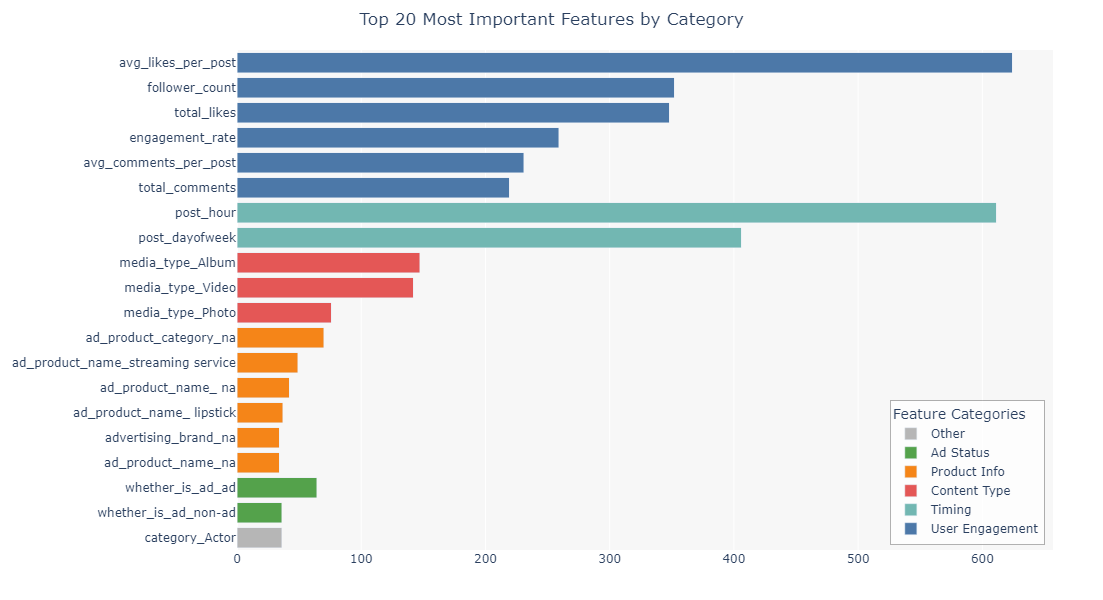

In [229]:
import plotly.graph_objects as go
import pandas as pd

# [Previous code for feature categories and color mapping remains the same until DataFrame creation]

# Get top 20 features by importance
importance_df = importance_df.nlargest(20, 'importance')

# Calculate total importance for each category
category_total_imp = importance_df.groupby('category')['importance'].sum()
category_order = category_total_imp.sort_values(ascending=True).index

# Create a new column for sorting
importance_df['sort_key'] = importance_df.apply(
    lambda x: f"{list(category_order).index(x['category']):02d}_{-x['importance']:010.4f}", 
    axis=1
)

# Sort the DataFrame
importance_df = importance_df.sort_values('sort_key')

# Create the plot
fig_importance = go.Figure()

# Add bars for each category in reverse order (most important first)
for category in category_order[::-1]:
    cat_data = importance_df[importance_df['category'] == category]
    fig_importance.add_trace(go.Bar(
        x=cat_data['importance'],
        y=cat_data['feature'],
        name=category,
        orientation='h',
        marker_color=category_colors[category]
    ))

# Update layout
fig_importance.update_layout(
    title='Top 20 Most Important Features by Category',
    title_x=0.5,
    width=800,
    height=600,
    margin=dict(l=200, r=50, t=50, b=50),  # Reduced right margin
    showlegend=True,
    legend=dict(
        title='Feature Categories',
        yanchor="bottom",  # 改为bottom
        y=0.01,           # 改为接近0的值
        xanchor="right",
        x=0.99,
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='rgba(0, 0, 0, 0.3)',
        borderwidth=1
    ),
    barmode='stack',
    yaxis={'categoryorder':'array', 
          'categoryarray':importance_df['feature'].tolist()},  # Reverse the order
    plot_bgcolor='rgba(240, 240, 240, 0.5)',  # Light gray background
)

fig_importance.show()

## Add text features to the model (hashtags)
results: add text features decrease the model prediction accuracy

In [117]:
df = df1
from sklearn.preprocessing import FunctionTransformer

# 1) 准备数据
feature_cols = [
    "follower_count",
    "post_hour",
    "post_dayofweek",
     "ad_product_category",  
     "advertising_brand",
     "category", "total_likes", 
    "total_comments", "avg_likes_per_post",	
    "avg_comments_per_post", "engagement_rate","whether_is_ad", "media_type","ad_product_name"
]
target_col = "likes"

# 1) 首先确保文本列的数据类型是字符串
df_model = df[feature_cols + [target_col]].copy()
df_model['ad_product_name'] = df_model['ad_product_name'].astype(str)
df_model = df_model.dropna(subset=[target_col])

X = df_model[feature_cols]
y = df_model[target_col]

# 2) 区分列类型
text_cols = ["ad_product_name"]
num_cols = ["follower_count", "post_hour", "post_dayofweek", 
                "total_likes", "total_comments", "avg_likes_per_post",	
                "avg_comments_per_post", "engagement_rate"]
cat_cols = ["ad_product_category", "advertising_brand","category","whether_is_ad", "media_type"]

# 修改文本转换器，移除 TruncatedSVD
text_transformer = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True, 
        stop_words='english', 
        max_features=100,  # 减少特征数量
        strip_accents='unicode',
        preprocessor=str
    ))
])


num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# 修改 ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("text", text_transformer, text_cols),
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ],
    remainder='drop',
    sparse_threshold=0  # 强制输出密集矩阵
)

# 6) 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7) 训练 & 评估
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", xgb.XGBRegressor(n_estimators=100, max_depth=6,
                             learning_rate=0.1,
                             random_state=42, 
                            reg_lambda=10))
])

print("results of XGBoost:")
evaluate_model("XGBoost", xgb_pipeline)

lgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lgb", LGBMRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=-1,       # -1表示不限制树深
        random_state=42
    ))
])
print("results of lighGBM:")
evaluate_model("LightGBM", lgb_pipeline)

results of XGBoost:


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 51347

In [26]:
# 3) 定义参数搜索空间
# "lgb__" 前缀对应 pipeline 最后一步的命名 "lgb"
param_grid = {
    "lgb__num_leaves": [15, 31, 63],   # 控制叶子数; 越大越复杂
    "lgb__max_depth": [-1, 5, 7],      # -1表示不限制深度; 也可用更小/更大测试
    "lgb__learning_rate": [0.1, 0.05], # 学习率
    "lgb__lambda_l1": [0, 1, 5],       # L1 正则
    "lgb__lambda_l2": [0, 1, 5],       # L2 正则
    "lgb__subsample": [1.0, 0.8],      # 训练数据采样
    "lgb__colsample_bytree": [1.0, 0.8]# 特征列采样
}

# 4) 使用 GridSearchCV 进行搜索
grid_search = GridSearchCV(
    estimator=lgb_pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # 或者 "r2", "neg_mean_absolute_error"
    cv=3,                              # 3 折交叉验证
    verbose=1,                         # 查看进度
    n_jobs=-1                          # 并行
)

# 5) 训练数据
# 这里假设你已有 X_train, y_train; X_test, y_test
grid_search.fit(X_train, y_train)

# 6) 打印最佳参数 & 评估结果
print("Best Params:", grid_search.best_params_)
print("Best CV Score (MSE):", grid_search.best_score_)

best_model = grid_search.best_estimator_  # pipeline with best found params
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}, R^2: {r2:.3f}")

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18911
[LightGBM] [Info] Number of data points in the train set: 51347, number of used features: 2119
[LightGBM] [Info] Start training from score 137177.119170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [18]:
#check whether aggregated_hashtags are correlated to likes
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# 计算 Tfidf 特征对目标变量的互信息
tfidf_features = text_transformer.fit_transform(df['aggregated_hashtags'])
mi_scores = mutual_info_regression(tfidf_features, df["likes"])

# 计算均值
mean_mi = np.mean(mi_scores)
print(f"Average Mutual Information Score: {mean_mi}")

NameError: name 'text_transformer' is not defined

## Enagement Prediction: Comments (optional)

In [57]:
# 检查数据缺失情况
print("Initial shape:", df.shape)
print(df.isnull().sum())

# 去除 "likes" 目标列自身为空的行（一定要有标签）
df = df.dropna(subset=["comments"])

# 3. ================== 准备特征列 & 目标列 ==================
feature_cols = ["follower_count",    
                "ad_product_category",  
                "post_hour",         
                "post_dayofweek",
               "advertising_brand",
               "category", "total_likes", 
                "total_comments", "avg_likes_per_post",	
                "avg_comments_per_post", "engagement_rate", "whether_is_ad", "media_type"]    
target_col = "comments"

# 构建一个新的 DataFrame，确保所需列都在
df_model = df[feature_cols + [target_col]].dropna()  # 再去一遍空值，防止特征列有漏

X = df_model[feature_cols]
y = df_model[target_col]

# 4. ================== 构造 ColumnTransformer ==================
# 把特征分成 数值列 & 分类列
num_features = ["follower_count", "post_hour", "post_dayofweek", 
                "total_likes", "total_comments", "avg_likes_per_post",	
                "avg_comments_per_post", "engagement_rate"]
cat_features = ["ad_product_category", "advertising_brand","category","whether_is_ad", "media_type"]

# 数值列: 用中位数插值 + 标准化
num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 分类列: 用众数插值 + OneHot
cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# 综合处理器
preprocessor = ColumnTransformer([
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

# 5. ================== 划分训练集、测试集 ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Initial shape: (64184, 34)
user_name                    0
user_id                      0
post_id                      0
date                         0
media_type                   0
likes                        0
comments                     0
views                        0
caption                   1201
media_urls                3133
sponsor_tags             61284
whether_is_ad                0
ad_product_category          0
ad_product_name              5
advertising_brand            1
username                  7585
full_name                 7585
category                  7585
follower_count            7585
biography                 7585
profile_pic_url           7585
is_business               7585
is_verified               7585
media_count               7585
instagram_location_id     7585
aggregated_hashtags       2413
total_likes                  0
total_comments               0
avg_likes_per_post           0
avg_comments_per_post        0
engagement_rate           7585
post_time   

In [58]:
### 6.1 Linear Regression
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("lr", LinearRegression())
])
evaluate_model("LinearRegression", lr_pipeline)

LinearRegression => RMSE: 3179.38, R^2: 0.197


In [60]:
### 6.3 XGBoost
# XGBoost 也能放进 Pipeline，但它本身可处理部分缺失值；这里仍然用 preprocessor
xgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("xgb", xgb.XGBRegressor(n_estimators=100, max_depth=6,
                             learning_rate=0.1,
                             random_state=42))
])
evaluate_model("XGBoost", xgb_pipeline)

XGBoost => RMSE: 3159.66, R^2: 0.207


## Use trained model to predict likes

In [14]:
def predict_influencer_likes(df, lgb_pipeline, user_id, post_hour, post_dayofweek):
    """
    预测特定博主在特定时间发布商品的预期点赞量
    """
    import numpy as np
    import pandas as pd
    
    # 1. 提取博主特征
    influencer_features = ["follower_count", "category", "total_likes", 
                          "total_comments", "avg_likes_per_post",
                          "avg_comments_per_post", "engagement_rate", "media_type"]
    
    # 获取博主信息
    influencer_row = df[df['user_id'] == user_id].iloc[0]
    influencer_data = influencer_row[influencer_features].copy()
    user_name = influencer_row['user_name']
    follower_count = influencer_row['follower_count']
    category = influencer_row['category']
    avg_likes = float(influencer_row['avg_likes_per_post'])
    
    # 2. 随机抽取20个有效广告商品
    product_features = ["ad_product_category", "advertising_brand",
                       "whether_is_ad", "ad_product_name"]
    
    valid_ads = df[
        (df['whether_is_ad'] == 'ad') & 
        (df['ad_product_name'].notna()) &
        (df['ad_product_name'] != 'na')
    ]
    
    if len(valid_ads) < 20:
        print(f"警告：数据集中只有 {len(valid_ads)} 个有效广告商品，少于请求的20个")
        random_products = valid_ads[product_features]
    else:
        random_products = valid_ads[product_features].sample(n=20, random_state=42)
    
    # 3. 构建预测数据集
    all_rows = []
    for _, product in random_products.iterrows():
        row_data = influencer_data.copy()
        for feat in product_features:
            row_data[feat] = product[feat]
        row_data['post_hour'] = post_hour
        row_data['post_dayofweek'] = post_dayofweek
        all_rows.append(row_data)
    
    prediction_data = pd.DataFrame(all_rows)
    
    # 4. 进行预测
    predicted_likes = lgb_pipeline.predict(prediction_data)
    
    # 5. 将预测结果添加到商品信息中
    result_df = random_products.copy()
    result_df['predicted_likes'] = predicted_likes
    result_df['predicted_likes(k)'] = np.round(predicted_likes / 1000, 1)
    result_df = result_df.sort_values('predicted_likes', ascending=False)
    
    # 6. 添加博主信息和计算涨跌幅
    result_df['user_id'] = user_id
    result_df['user_name'] = user_name
    result_df['follower_count'] = follower_count
    result_df['category'] = category
    result_df['avg_likes_per_post(k)'] = np.round(avg_likes / 1000, 1)
    
    # 计算预测点赞量相对于平均值的涨跌幅
    engagement_changes = np.round(((predicted_likes / avg_likes) - 1) * 100, 1)
    result_df['engagement_change'] = [f"{x}%" for x in engagement_changes]
    
    # 7. 选择并重排列顺序
    final_columns = [
        'user_id', 'user_name', 'follower_count', 'category',
        'avg_likes_per_post(k)', 'ad_product_name', 'ad_product_category', 
        'advertising_brand', 'predicted_likes(k)', 'engagement_change'
    ]
    
    result_df = result_df[final_columns]
    
    return result_df

In [15]:
#apply the prediction function
user_id = 171146
post_hour = 15
post_dayofweek = 1  # 周一发布

predictions = predict_influencer_likes(df, lgb_pipeline, user_id, post_hour, post_dayofweek)
print("预测结果前5条：")
print(predictions[['ad_product_name', 'predicted_likes(k)']].head())

预测结果前5条：
      ad_product_name  predicted_likes(k)
30699           movie              1433.4
62785           movie              1433.4
55594           movie              1433.4
8062             song              1337.4
5698             cars              1319.1


In [16]:
predictions

,user_id,user_name,follower_count,category,avg_likes_per_post(k),ad_product_name,ad_product_category,advertising_brand,predicted_likes(k),engagement_change
30699,171146,shanedawson,7300391.0,Video creator,1053.3,movie,Movies_and_TV,na,1433.4,22.1%
62785,171146,shanedawson,7300391.0,Video creator,1053.3,movie,Movies_and_TV,na,1433.4,22.8%
55594,171146,shanedawson,7300391.0,Video creator,1053.3,movie,Movies_and_TV,na,1433.4,22.1%
8062,171146,shanedawson,7300391.0,Video creator,1053.3,song,Digital_Music,konvictkulture,1337.4,20.1%
5698,171146,shanedawson,7300391.0,Video creator,1053.3,cars,Automotive,"Volvo,na",1319.1,22.1%
16639,171146,shanedawson,7300391.0,Video creator,1053.3,live_broadcast,Digital_Music,SiriusXM,1310.0,21.8%
7391,171146,shanedawson,7300391.0,Video creator,1053.3,na,Amazon_Fashion,Dior,1308.2,24.4%
40329,171146,shanedawson,7300391.0,Video creator,1053.3,NBA,Sports_and_Outdoors,NaN,1294.9,22.1%
56618,171146,shanedawson,7300391.0,Video creator,1053.3,fashion,Clothing_Shoes_and_Jewelry,Roberto_Cavalli,1294.0,36.1%
2314,171146,shanedawson,7300391.0,Video creator,1053.3,clothing_sets,Clothing_Shoes_and_Jewelry,tilidahli,1294.0,27.0%


In [165]:
def predict_specific_influencer_products(df, lgb_pipeline, user_product_pairs, post_hour=14, post_dayofweek=1):
    """
    预测指定的博主-商品组合的点赞量
    参数:
    df: DataFrame, 原始数据集
    lgb_pipeline: 训练好的LightGBM模型pipeline
    user_product_pairs: DataFrame, 包含user_id, ad_product_category, ad_product_name, advertising_brand, recommendation_score
    post_hour: int, 发布小时 (默认14点)
    post_dayofweek: int, 发布周几 (默认周一)
    """
    import numpy as np
    from tqdm import tqdm
    
    # 获取所有需要的特征列
    influencer_features = ["follower_count", "category", "total_likes", 
                          "total_comments", "avg_likes_per_post",
                          "avg_comments_per_post", "engagement_rate", "media_type"]
    
    # 存储所有预测结果
    all_predictions = []
    
    # 对每个博主进行处理
    for user_id in tqdm(user_product_pairs['user_id'].unique(), desc="预测进度"):
        # 获取博主信息
        influencer_data = df[df['user_id'] == user_id][influencer_features].iloc[0]
        user_name = df[df['user_id'] == user_id]['user_name'].iloc[0]
        avg_likes = float(influencer_data['avg_likes_per_post'])
        
        # 获取该博主对应的商品列表
        user_products = user_product_pairs[user_product_pairs['user_id'] == user_id]['ad_product_name']
        
        # 获取商品特征
        products_info = df[
            (df['whether_is_ad'] == 'ad') & 
            (df['ad_product_name'].isin(user_products))
        ][['ad_product_category', 'advertising_brand', 
           'ad_product_name', 'whether_is_ad']].drop_duplicates()
        
        # 创建预测数据
        prediction_rows = []
        for _, product in products_info.iterrows():
            row_data = influencer_data.copy()
            for feat in product.index:
                row_data[feat] = product[feat]
            row_data['post_hour'] = post_hour
            row_data['post_dayofweek'] = post_dayofweek
            prediction_rows.append(row_data)
        
        if not prediction_rows:  # 如果没有找到匹配的商品，跳过该博主
            print(f"警告：用户 {user_id} 的商品在原始数据集中未找到匹配记录")
            continue
            
        # 批量预测
        pred_data = pd.DataFrame(prediction_rows)
        predictions = lgb_pipeline.predict(pred_data)
        
        # 保存结果
        for i, (_, product) in enumerate(products_info.iterrows()):
            result = {
                'user_id': user_id,
                'user_name': user_name,
                'follower_count': influencer_data['follower_count'],
                'category': influencer_data['category'],
                'avg_likes_per_post(k)': round(avg_likes / 1000, 1),
                'product': product['ad_product_name'],  # 改为product
                'ad_product_category': product['ad_product_category'],
                'advertising_brand': product['advertising_brand'],
                'predicted_likes(k)': round(predictions[i] / 1000, 1),
                'engagement_change': f"{round(((predictions[i] / avg_likes) - 1) * 100, 1)}%"
            }
            all_predictions.append(result)
    
    # 转换为DataFrame
    result_df = pd.DataFrame(all_predictions)
    
    print("\n预测完成！")
    print(f"总共生成 {len(result_df)} 条预测结果")
    
    return result_df

In [166]:
# 进行预测
predictions = predict_specific_influencer_products(df, lgb_pipeline, user_product_pairs)

预测进度: 100%|██████████████████████████████████████████████████████████████████████| 482/482 [36:14<00:00,  4.51s/it]



预测完成！
总共生成 684305 条预测结果


In [173]:
def predict_specific_influencer_products(df, lgb_pipeline, user_product_pairs, post_hour=14, post_dayofweek=1):
    """
    预测指定的博主-商品组合的点赞量
    
    参数:
    df: DataFrame, 原始数据集
    lgb_pipeline: 训练好的LightGBM模型pipeline
    user_product_pairs: DataFrame, 包含user_id, ad_product_category, ad_product_name, advertising_brand, recommendation_score
    post_hour: int, 发布小时 (默认14点)
    post_dayofweek: int, 发布周几 (默认周一)
    """
    import numpy as np
    from tqdm import tqdm
    
    # 获取所有需要的特征列
    influencer_features = ["follower_count", "category", "total_likes", 
                          "total_comments", "avg_likes_per_post",
                          "avg_comments_per_post", "engagement_rate", "media_type"]
    
    # 存储所有预测结果
    all_predictions = []
    
    # 对每个博主进行处理
    for user_id in tqdm(user_product_pairs['user_id'].unique(), desc="预测进度"):
        # 获取博主信息
        try:
            influencer_data = df[df['user_id'] == user_id][influencer_features].iloc[0]
            user_name = df[df['user_id'] == user_id]['user_name'].iloc[0]
            avg_likes = float(influencer_data['avg_likes_per_post'])
        except (IndexError, KeyError) as e:
            print(f"警告：用户 {user_id} 在原始数据集中未找到")
            continue
        
        # 获取该博主的所有商品推荐
        user_products = user_product_pairs[user_product_pairs['user_id'] == user_id]
        
        # 创建预测数据
        prediction_rows = []
        for _, product_row in user_products.iterrows():
            row_data = influencer_data.copy()
            # 添加商品相关特征
            row_data['ad_product_category'] = product_row['ad_product_category']
            row_data['ad_product_name'] = product_row['ad_product_name']
            row_data['advertising_brand'] = product_row['advertising_brand']
            row_data['whether_is_ad'] = 'ad'  # 所有预测都是广告
            row_data['post_hour'] = post_hour
            row_data['post_dayofweek'] = post_dayofweek
            prediction_rows.append(row_data)
        
        if not prediction_rows:
            continue
            
        # 批量预测
        pred_data = pd.DataFrame(prediction_rows)
        predictions = lgb_pipeline.predict(pred_data)
        
        # 保存结果
        for i, (_, product_row) in enumerate(user_products.iterrows()):
            result = {
                'user_id': user_id,
                'user_name': user_name,
                'follower_count': influencer_data['follower_count'],
                'category': influencer_data['category'],
                'avg_likes_per_post(k)': round(avg_likes / 1000, 1),
                'ad_product_name': product_row['ad_product_name'],
                'ad_product_category': product_row['ad_product_category'],
                'advertising_brand': product_row['advertising_brand'],
                'predicted_likes(k)': round(predictions[i] / 1000, 1),
                'engagement_change': f"{round(((predictions[i] / avg_likes) - 1) * 100, 1)}%",
                'recommendation_score': product_row['recommendation_score'],
            }
            all_predictions.append(result)
    
    # 转换为DataFrame
    result_df = pd.DataFrame(all_predictions)
    
    print("\n预测完成！")
    print(f"总共生成 {len(result_df)} 条预测结果")
    
    return result_df

In [174]:
# 生成预测结果
predictions = predict_specific_influencer_products(df, lgb_pipeline, user_product_pairs)

预测进度: 100%|██████████████████████████████████████████████████████████████████████| 482/482 [01:23<00:00,  5.77it/s]



预测完成！
总共生成 20867 条预测结果

预测结果示例（前5条）：


KeyError: "['product', 'comprehensive_score'] not in index"

In [190]:
full_influencer_product = pd.read_csv(r"D:\Python编程\influencer recommendation system project\influencer_product_full_list.csv")

In [191]:
# predict all the influencer_product pairs' likes
predictions_full = predict_specific_influencer_products(df, lgb_pipeline, full_influencer_product, post_hour=20, post_dayofweek=6)

预测进度: 100%|██████████████████████████████████████████████████████████████████████| 482/482 [05:01<00:00,  1.60it/s]



预测完成！
总共生成 92268 条预测结果


In [193]:
predictions_full
predictions_full.to_csv('Like_prediction_full_list.csv', index=False, encoding='utf-8-sig')

In [151]:
predictions.to_csv('Product_Like_prediction.csv', index=False, encoding='utf-8-sig')

In [28]:
# 按user_id和product分组，取recommendation_score最大的记录
filtered_predictions = predictions.sort_values(['user_id', 'product', 'recommendation_score'], 
                                            ascending=[True, True, False]) \
    .groupby(['user_id', 'product']) \
    .first() \
    .reset_index()

 # 重新排序列
final_columns = [
        'user_id', 'user_name', 'follower_count', 'category',
        'avg_likes_per_post(k)', 'product', 'ad_product_category', 
        'advertising_brand', 'predicted_likes(k)', 'engagement_change',
        'recommendation_score'
    ]

filtered_predictions = filtered_predictions[final_columns]

# 保存结果
filtered_predictions.to_csv('product_list_sample_output.csv', index=False, encoding='utf-8-sig')

# 打印处理前后的数据量对比
print(f"处理前数据量: {len(predictions)}")
print(f"处理后数据量: {len(filtered_predictions)}")

处理前数据量: 354223
处理后数据量: 9627


## Compute final comprehensive score

In [204]:
predictions = pd.read_excel(r"D:\Python编程\influencer recommendation system project\product recommendation with three indexes.xlsx")

# 2. 对三列进行Min-Max归一化
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# 对三列分别进行归一化
normalized_likes = min_max_normalize(predictions['predicted_likes(k)'])
normalized_score = min_max_normalize(predictions['recommendation_score'])
normalized_fit = min_max_normalize(predictions['influencer_product_fit'])

# 3. 加权求和 (权重分别为0.5, 0.2, 0.3)
predictions['comprehensive_score'] = ((
    0.5 * normalized_likes + 
    0.2 * normalized_score + 
    0.3 * normalized_fit
).round(3))*100

# 4. 按用户分组后再按综合得分降序排序
predictions = predictions.sort_values(['user_id', 'comprehensive_score'], 
                                   ascending=[True, False])
predictions = predictions.dropna(subset=["comprehensive_score"])

# 5. 保存处理后的结果
predictions.to_csv('product_list_with_comprehensive_score.csv', 
                  index=False, 
                  encoding='utf-8-sig')

# 6. 打印示例结果
print("处理完成！每个用户的前3条推荐：")
for user_id in predictions['user_id'].unique():
    print(f"\n用户 {user_id} 的前3条推荐：")
    user_recommendations = predictions[predictions['user_id'] == user_id].head(3)
    print(user_recommendations[['ad_product_name', 'predicted_likes(k)', 'recommendation_score', 
                              'influencer_product_fit', 'comprehensive_score']])

处理完成！每个用户的前3条推荐：

用户 171146 的前3条推荐：
   ad_product_name  predicted_likes(k)  recommendation_score  \
0            movie              1465.2              0.149344   
30           movie              1448.4              0.019987   
38           movie              1448.4              0.017440   

    influencer_product_fit  comprehensive_score  
0                 0.291487                 69.9  
30                0.348682                 68.3  
38                0.337474                 67.9  

用户 487760 的前3条推荐：
              ad_product_name  predicted_likes(k)  recommendation_score  \
50                  jewellery                 3.4              0.497832   
71  clothing_jewelry_footwear                 3.4              0.039052   
68                  jewellery                 3.4              0.046124   

    influencer_product_fit  comprehensive_score  
50                0.374184                 32.4  
71                0.464489                 24.8  
68                0.455170           

## visualization of Like Engagement prediction results

In [173]:
def plot_hourly_likes_prediction(df, lgb_pipeline, user_id, product_info, post_dayofweek):
    """
    预测并绘制特定商品在一天24小时内的预期点赞量变化
    
    参数:
    df: DataFrame, 原始数据集
    lgb_pipeline: 训练好的LightGBM模型pipeline
    user_id: int/str, 博主ID
    product_info: Series/dict, 包含商品特征的字典或Series
    post_dayofweek: int, 发布星期几 (0-6)
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # 1. 获取博主特征
    influencer_features = ["follower_count", "category", "total_likes", 
                          "total_comments", "avg_likes_per_post",
                          "avg_comments_per_post", "engagement_rate", "media_type"]
    
    influencer_row = df[df['user_id'] == user_id].iloc[0]
    influencer_data = influencer_row[influencer_features].copy()
    avg_likes = float(influencer_row['avg_likes_per_post'])
    
    # 2. 预测24小时的点赞量
    hours = range(24)
    predictions = []
    
    for hour in hours:
        # 构建单条预测数据
        row_data = influencer_data.copy()
        # 添加商品特征
        row_data['ad_product_category'] = product_info['ad_product_category']
        row_data['advertising_brand'] = product_info['advertising_brand']
        row_data['ad_product_name'] = product_info['ad_product_name']
        row_data['whether_is_ad'] = 'ad'  # 直接设置为'ad'
        
        # 添加时间特征
        row_data['post_hour'] = hour
        row_data['post_dayofweek'] = post_dayofweek
        
        # 转换为DataFrame并预测
        pred_data = pd.DataFrame([row_data])
        pred = lgb_pipeline.predict(pred_data)[0]
        predictions.append(pred / 1000)  # 转换为k单位
    
    # 3. 绘图
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # 绘制点赞量曲线
    plt.plot(hours, predictions, marker='o', linewidth=2, markersize=8)
    
    # 添加平均点赞量参考线
    avg_likes_k = avg_likes / 1000
    plt.axhline(y=avg_likes_k, color='r', linestyle='--', alpha=0.5, 
                label=f'平均点赞量 ({avg_likes_k:.1f}k)')
    
    # 设置标题和标签
    plt.title(f'商品"{product_info["ad_product_name"]}"在不同发布时间的预期点赞量\n'
             f'博主ID: {user_id}, 发布日期: 周{post_dayofweek+1}', 
             pad=20)
    plt.xlabel('发布时间 (小时)')
    plt.ylabel('预期点赞量 (k)')
    
    # 设置x轴刻度
    plt.xticks(hours)
    
    # 添加网格和图例
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # 找出最佳和最差时间点
    best_hour = hours[np.argmax(predictions)]
    worst_hour = hours[np.argmin(predictions)]

C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21457 (\N{CJK UNIFIED IDEOGRAPH-53D1}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  func(*args, **kwargs)
C:\A

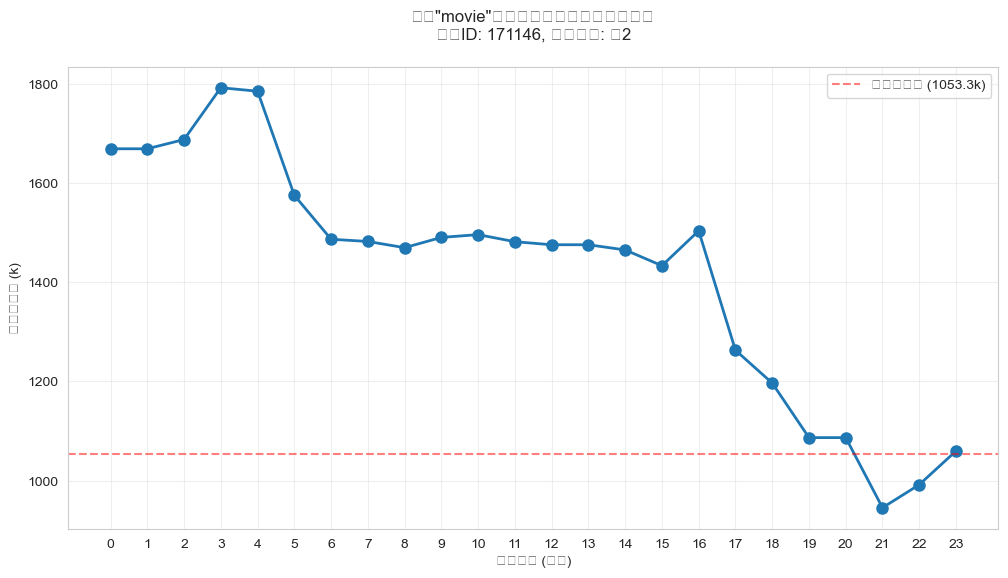

In [174]:
# 获取之前预测结果中的第一个商品进行分析
product_to_analyze = predictions.iloc[0]
post_dayofweek = 1  # 周一

# 绘制图表并分析
plot_hourly_likes_prediction(df, lgb_pipeline, user_id, product_to_analyze, post_dayofweek)

In [156]:
predictions

,user_id,user_name,follower_count,category,avg_likes_per_post(k),product,ad_product_category,advertising_brand,predicted_likes(k),engagement_change,recommendation_score,influencer_product_fit,comprehensive_score
8,171146,shanedawson,7300391.0,Video creator,1053.3,gym_shorts,Clothing_Shoes_and_Jewelry,Gymshark,1316.9,0.250,0.036296,0.977112,0.750
16,171146,shanedawson,7300391.0,Video creator,1053.3,TV series,Movies_and_TV,paramountplus,1295.0,0.229,0.038801,0.896100,0.719
15,171146,shanedawson,7300391.0,Video creator,1053.3,fitness_program,Sports_and_Outdoors,TrainForHer,1306.1,0.240,0.042408,0.876086,0.717
19,171146,shanedawson,7300391.0,Video creator,1053.3,sandwich,Grocery_and_Gourmet_Food,fazesubs,1287.9,0.223,0.031219,0.860290,0.705
0,171146,shanedawson,7300391.0,Video creator,1053.3,movie,Movies_and_TV,na,1465.2,0.391,0.060963,0.631891,0.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,72016781038,flotus,3934937.0,Government organization,463.9,album,Digital_Music,na,402.8,-0.132,0.106370,0.215914,0.231
9615,72016781038,flotus,3934937.0,Government organization,463.9,award,Movies_and_TV,PLATINO,388.8,-0.162,0.055964,0.197753,0.213
9613,72016781038,flotus,3934937.0,Government organization,463.9,Live Performance,Movies_and_TV,na,394.0,-0.151,0.049253,0.173650,0.207
9616,72016781038,flotus,3934937.0,Government organization,463.9,live_event,Others,na,384.7,-0.171,0.059311,0.167500,0.204


In [161]:
def save_visualization_report(predictions, output_file='recommendation_analysis_report.html'):
    import plotly.express as px
    import plotly.graph_objects as go
    
    # 计算类别顺序
    category_means = predictions.groupby('ad_product_category')['predicted_likes(k)'].mean().sort_values(ascending=False)
    category_order = category_means.index.tolist()
    
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("""
        <html>
        <head>
            <title>Product Recommendation Analysis Report</title>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                body { font-family: Arial, sans-serif; margin: 20px; }
                .plot { margin: 20px 0; }
            </style>
        </head>
        <body>
        <h1>Product Recommendation Analysis Report</h1>
        """)
        
        # 1. Distribution plot
        fig1 = px.histogram(predictions, 
                          x='predicted_likes(k)',
                          title='Distribution of Predicted Likes',
                          labels={'predicted_likes(k)': 'Predicted Likes (k)', 
                                 'count': 'Frequency'})
        f.write(f'<div class="plot">{fig1.to_html()}</div>')
        
        fig2 = px.box(predictions, 
                     x='ad_product_category', 
                     y='predicted_likes(k)',
                     category_orders={'ad_product_category': category_order},  # 设置类别顺序
                     title='Predicted Likes by Product Category')
        fig2.update_layout(
            xaxis_tickangle=-45,  # 旋转x轴标签
            xaxis_title='Product Category',
            yaxis_title='Predicted Likes (k)'
        )
        f.write(f'<div class="plot">{fig2.to_html()}</div>')

        # 3. Scatter plot
        fig3 = px.scatter(predictions, 
                         x='follower_count', 
                         y='predicted_likes(k)',
                         color='ad_product_category',
                         title='Follower Count vs Predicted Likes',
                         hover_data=['user_id', 'product'])  # 修改这里
        f.write(f'<div class="plot">{fig3.to_html()}</div>')
        
        # 4. Top Products Analysis
        top_n = 5
        top_recommendations = predictions.nlargest(top_n, 'predicted_likes(k)')
        fig4 = px.bar(top_recommendations,
                     x='product',  # 修改这里
                     y='predicted_likes(k)',
                     color='user_id',
                     title=f'Top {top_n} Product Recommendations',
                     labels={'product': 'Product Name',  # 修改这里
                            'predicted_likes(k)': 'Predicted Likes (k)'})
        f.write(f'<div class="plot">{fig4.to_html()}</div>')
        
        # 5. Summary Statistics Table
        stats = predictions.groupby('ad_product_category').agg({
            'predicted_likes(k)': ['count', 'mean', 'std', 'min', 'max']
        }).round(2)
        
        fig5 = go.Figure(data=[go.Table(
            header=dict(values=['Product Category', 'Count', 'Mean', 'Std', 'Min', 'Max'],
                       fill_color='paleturquoise',
                       align='left'),
            cells=dict(values=[stats.index,
                             stats['predicted_likes(k)']['count'],
                             stats['predicted_likes(k)']['mean'],
                             stats['predicted_likes(k)']['std'],
                             stats['predicted_likes(k)']['min'],
                             stats['predicted_likes(k)']['max']],
                      fill_color='lavender',
                      align='left'))
        ])
        fig5.update_layout(title='Statistical Summary by Product Category')
        f.write(f'<div class="plot">{fig5.to_html()}</div>')
        
        f.write("</body></html>")
    
    print(f"Report has been saved to {output_file}")

# 生成报告
save_visualization_report(predictions)

Report has been saved to recommendation_analysis_report.html


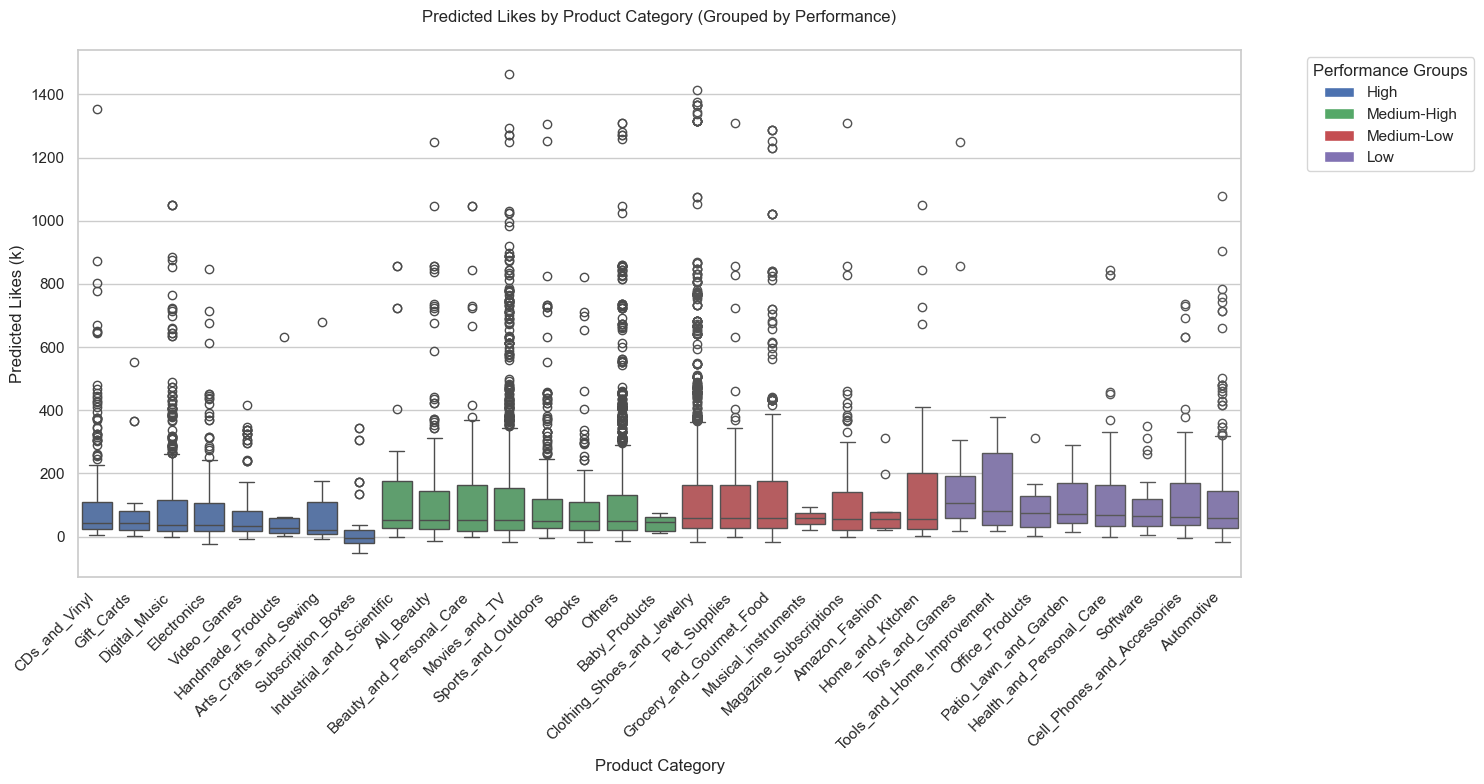


Categories by Performance Group:

High Performance Group (Average Likes):
- CDs_and_Vinyl: 43.6k
- Gift_Cards: 42.5k
- Digital_Music: 37.7k
- Electronics: 37.2k
- Video_Games: 33.3k
- Handmade_Products: 26.5k
- Arts_Crafts_and_Sewing: 22.2k
- Subscription_Boxes: -3.6k

Medium-High Performance Group (Average Likes):
- Industrial_and_Scientific: 53.25k
- All_Beauty: 52.35k
- Beauty_and_Personal_Care: 52.0k
- Movies_and_TV: 51.3k
- Sports_and_Outdoors: 50.4k
- Books: 49.4k
- Others: 48.5k
- Baby_Products: 47.0k

Medium-Low Performance Group (Average Likes):
- Clothing_Shoes_and_Jewelry: 59.4k
- Pet_Supplies: 58.7k
- Grocery_and_Gourmet_Food: 57.8k
- Musical_instruments: 57.45k
- Magazine_Subscriptions: 57.2k
- Amazon_Fashion: 56.6k
- Home_and_Kitchen: 54.9k

Low Performance Group (Average Likes):
- Toys_and_Games: 106.1k
- Tools_and_Home_Improvement: 81.1k
- Office_Products: 75.9k
- Patio_Lawn_and_Garden: 72.25k
- Health_and_Personal_Care: 67.1k
- Software: 64.0k
- Cell_Phones_and_Access

In [163]:
# 1. 计算每个类别的平均值并排序
category_means = predictions.groupby('ad_product_category')['predicted_likes(k)'].median().sort_values(ascending=False)

# 2. 将类别分成4组
n_groups = 4
category_groups = pd.qcut(category_means, n_groups, labels=['High', 'Medium-High', 'Medium-Low', 'Low'])
category_colors = {
    'High': '#4C72B0',         # 深蓝色
    'Medium-High': '#55A868',  # 绿色
    'Medium-Low': '#C44E52',   # 红色
    'Low': '#8172B3'          # 紫色
}

# 3. 创建一个新的DataFrame包含类别和对应的组
category_group_df = pd.DataFrame({
    'category': category_means.index,
    'group': category_groups,
    'mean': category_means.values
})

# 4. 创建箱线图
plt.figure(figsize=(15, 8))
for group in ['High', 'Medium-High', 'Medium-Low', 'Low']:
    # 获取该组的类别
    categories = category_group_df[category_group_df['group'] == group]['category']
    
    # 为该组创建箱线图
    sns.boxplot(data=predictions[predictions['ad_product_category'].isin(categories)],
                x='ad_product_category',
                y='predicted_likes(k)',
                order=categories,
                color=category_colors[group])

plt.title('Predicted Likes by Product Category (Grouped by Performance)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Predicted Likes (k)')

# 添加图例
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=group)
                  for group, color in category_colors.items()]
plt.legend(handles=legend_elements, title='Performance Groups',
          bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整布局
plt.tight_layout()
plt.show()

# 打印每个组的类别
print("\nCategories by Performance Group:")
for group in ['High', 'Medium-High', 'Medium-Low', 'Low']:
    categories = category_group_df[category_group_df['group'] == group]['category'].tolist()
    mean_values = category_group_df[category_group_df['group'] == group]['mean'].round(2).tolist()
    print(f"\n{group} Performance Group (Average Likes):")
    for cat, mean in zip(categories, mean_values):
        print(f"- {cat}: {mean}k")

In [197]:
def save_visualization_report(predictions, output_file='likes_prediction_analysis_report.html'):
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import numpy as np
    import pandas as pd
    
    # 首先过滤掉'na'和'Others'类别
    filtered_predictions = predictions[
        ~predictions['ad_product_category'].isin(['na', 'Others'])
    ]
    
    # 计算类别均值并分组
    category_means = filtered_predictions.groupby('ad_product_category')['predicted_likes(k)'].mean().sort_values(ascending=False)
    n_groups = 4
    category_groups = pd.qcut(category_means, n_groups, labels=['High', 'Medium-High', 'Medium-Low', 'Low'])
    
    # 创建类别组DataFrame
    category_group_df = pd.DataFrame({
        'category': category_means.index,
        'group': category_groups,
        'mean': category_means.values
    })
    
    # 定义颜色映射
    color_map = {
        'High': '#2ecc71',
        'Medium-High': '#3498db',
        'Medium-Low': '#e74c3c',
        'Low': '#9b59b6'
    }
    
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write("""
        <html>
        <head>
            <title>Product Recommendation Analysis Report</title>
            <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
            <style>
                body { font-family: Arial, sans-serif; margin: 20px; }
                .plot { margin: 20px 0; }
                h1, h2 { color: #2c3e50; text-align: center; }
                .section { margin: 40px 0; }
            </style>
        </head>
        <body>
        <h1>Product Recommendation Analysis Report</h1>
        """)
        
        # 1. Distribution plot
        fig1 = px.histogram(filtered_predictions, 
                          x='predicted_likes(k)',
                          title='Distribution of Predicted Likes',
                          labels={'predicted_likes(k)': 'Predicted Likes (k)', 
                                 'count': 'Frequency'})
        fig1.update_layout(
            title_x=0.5,
            margin=dict(t=50, l=50, r=50, b=50)
        )
        f.write(f'<div class="plot">{fig1.to_html()}</div>')
        
        # 2. Box plot by category with performance groups
        fig2 = go.Figure()

        # 计算类别均值并分组
        category_means = filtered_predictions.groupby('ad_product_category')['predicted_likes(k)'].mean().sort_values(ascending=True)  # 改为升序排列
        n_groups = 4
        category_groups = pd.qcut(category_means, n_groups, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])  # 标签顺序对应升序排列
        
        # 创建类别组DataFrame
        category_group_df = pd.DataFrame({
            'category': category_means.index,
            'group': category_groups,
            'mean': category_means.values
        })
        
        # 定义颜色映射（调整颜色顺序）
        color_map = {
            'Low': '#9b59b6',      # 紫色给最低组
            'Medium-Low': '#e74c3c',  # 红色给中低组
            'Medium-High': '#3498db',  # 蓝色给中高组
            'High': '#2ecc71'      # 绿色给最高组
        }

        
        for group in ['High', 'Medium-High', 'Medium-Low', 'Low']:
            categories = category_group_df[category_group_df['group'] == group]['category']
            group_data = filtered_predictions[filtered_predictions['ad_product_category'].isin(categories)]
            
            fig2.add_trace(go.Box(
                x=group_data['ad_product_category'],
                y=group_data['predicted_likes(k)'],
                name=group,
                marker_color=color_map[group]
            ))
            
        fig2.update_layout(
            title='Predicted Likes by Product Category (Grouped by Performance)',
            title_x=0.5,
            xaxis_title='Product Category',
            yaxis_title='Predicted Likes (k)',
            xaxis_tickangle=-45,
            showlegend=True,
            boxmode='group',
            height=700,
            margin=dict(t=50, l=50, r=50, b=150)
        )
        f.write(f'<div class="plot">{fig2.to_html()}</div>')
        
        # 3. Category Popularity Analysis (Pie Chart)
        category_counts = filtered_predictions['ad_product_category'].value_counts()
        top_10_categories = category_counts.head(10)
        other_count = category_counts[10:].sum()
        
        pie_data = pd.concat([top_10_categories, pd.Series({'Others': other_count})])
        percentages = (pie_data / pie_data.sum() * 100).round(1)
        
        labels = [f'{label}<br>{count:,} ({pct:.1f}%)' 
                 for label, count, pct in zip(pie_data.index, pie_data.values, percentages)]
        
        fig3 = go.Figure(data=[go.Pie(
            labels=pie_data.index,
            values=pie_data.values,
            hole=0.4,
            textposition='outside',
            textinfo='text',
            text=labels,
            showlegend=False,
            textfont=dict(size=12)
        )])
        
        fig3.update_layout(
            title='Top Product Categories Distribution',
            title_x=0.5,
            annotations=[
                dict(
                    text='Product<br>Categories',
                    x=0.5, y=0.5,
                    font_size=20,
                    showarrow=False
                )
            ],
            height=600,
            width=1000,
            margin=dict(t=50, l=100, r=100, b=50)
        )
        
        f.write('<div class="section">')
        f.write('<h2>Product Category Distribution</h2>')
        f.write(f'<div class="plot">{fig3.to_html()}</div>')
        
        # 4. Statistics Table
        stats_df = pd.DataFrame({
            'Category': top_10_categories.index,
            'Count': top_10_categories.values,
            'Percentage': percentages[top_10_categories.index]
        })
        
        fig4 = go.Figure(data=[go.Table(
            header=dict(
                values=['Category', 'Count', 'Percentage (%)'],
                fill_color='paleturquoise',
                align='left'
            ),
            cells=dict(
                values=[
                    stats_df['Category'],
                    stats_df['Count'],
                    stats_df['Percentage'].round(1)
                ],
                fill_color='lavender',
                align='left'
            )
        )])
        fig4.update_layout(
            title='Top 10 Product Categories Statistics',
            title_x=0.5
        )
        f.write(f'<div class="plot">{fig4.to_html()}</div>')
        f.write('</div>')
        
        # 5. Scatter Plot with Trend Lines
        top_20_categories = filtered_predictions.groupby('ad_product_category')['predicted_likes(k)'].mean().nlargest(20).index
        follower_threshold = filtered_predictions['follower_count'].quantile(0.95)
        
        top_predictions = filtered_predictions[
            (filtered_predictions['ad_product_category'].isin(top_20_categories)) & 
            (filtered_predictions['follower_count'] <= follower_threshold)
        ]
        
        fig5 = px.scatter(top_predictions, 
                         x='follower_count', 
                         y='predicted_likes(k)',
                         color='ad_product_category',
                         title='Follower Count vs Predicted Likes (Top 20 Categories by Average Predicted Likes)',
                         hover_data=['user_id', 'ad_product_name'],
                         trendline="lowess",
                         trendline_options=dict(frac=0.5))
        
        fig5.update_layout(
            title_x=0.5,
            xaxis_title='Follower Count',
            yaxis_title='Predicted Likes (k)',
            legend_title='Product Category',
            legend=dict(
                yanchor="top",
                y=1,
                xanchor="left",
                x=1.02
            ),
            margin=dict(r=250)
        )
        
        # 更新x轴刻度格式
        max_followers_m = follower_threshold / 1000000
        fig5.update_xaxes(
            tickformat=".1fM",
            ticktext=[f"{i:.1f}M" for i in np.linspace(0, max_followers_m, 6)],
            tickvals=np.linspace(0, follower_threshold, 6)
        )
        
        fig5.update_traces(
            marker=dict(size=6, opacity=0.5),  # 增大点的大小，降低透明度
            selector=dict(mode='markers')
        )
        f.write(f'<div class="plot">{fig5.to_html()}</div>')
        
        # 6. Additional Statistics
        stats_text = f"""
        <div style="margin: 20px 0; text-align: center;">
            <h3>Data Range Information:</h3>
            <ul style="list-style-position: inside;">
                <li>Follower Count Range: 0 to {follower_threshold:,.0f} (95th percentile)</li>
                <li>Number of data points: {len(top_predictions):,}</li>
            </ul>
        </div>
        """
        f.write(stats_text)
        
        # 7. New Score Distributions (if available)
        if 'recommendation_score' in filtered_predictions.columns:
            fig6 = px.histogram(filtered_predictions, 
                              x='recommendation_score',
                              title='Distribution of Recommendation Scores',
                              labels={'recommendation_score': 'Recommendation Score', 
                                     'count': 'Frequency'})
            fig6.update_layout(title_x=0.5)
            f.write(f'<div class="plot">{fig6.to_html()}</div>')
        
        if 'comprehensive_score' in filtered_predictions.columns:
            fig7 = px.histogram(filtered_predictions, 
                              x='comprehensive_score',
                              title='Distribution of Comprehensive Scores',
                              labels={'comprehensive_score': 'Comprehensive Score', 
                                     'count': 'Frequency'})
            fig7.update_layout(title_x=0.5)
            f.write(f'<div class="plot">{fig7.to_html()}</div>')
        
        f.write("</body></html>")
    
    print(f"Report has been saved to {output_file}")

# 生成报告
save_visualization_report(predictions)

Report has been saved to likes_prediction_analysis_report.html


In [188]:
predictions = predictions.dropna(subset=['user_id', 'follower_count', 'ad_product_category', 'predicted_likes(k)'])
predictions.to_excel("products from CF with predicted likes.xlsx", index = 'True')

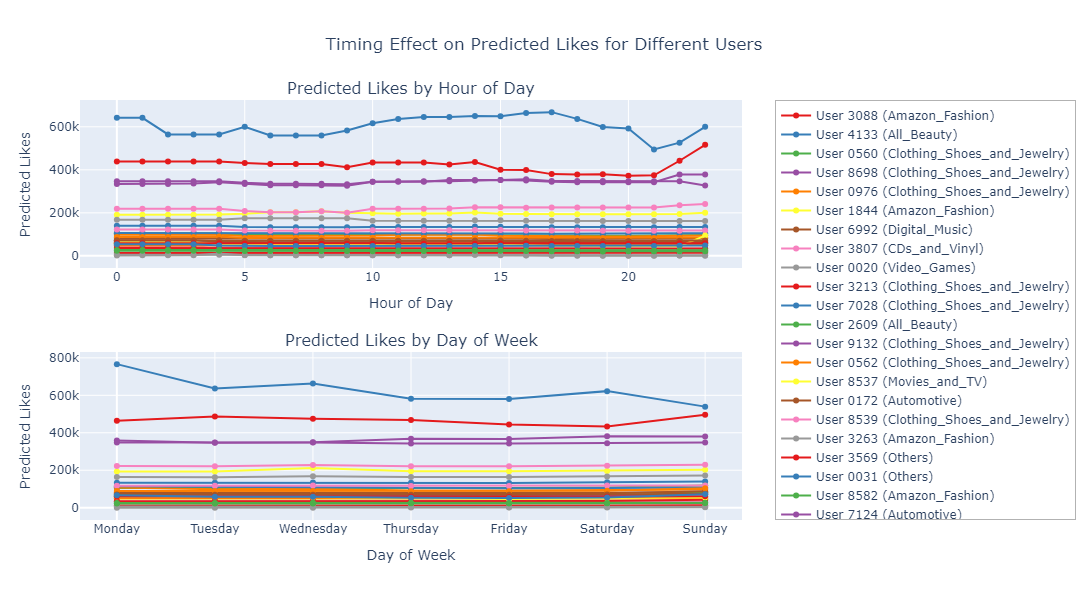

In [250]:
def analyze_timing_effect(model_pipeline, predictions, df, feature_cols, n_users=30):
    """
    Analyze timing effect on predicted likes for selected users
    """
    # 首先筛选出非na类别的数据
    valid_predictions = predictions[predictions['ad_product_category'] != 'na']
    
    # 按predicted_likes(k)排序并选择每个用户得分最高的记录
    best_predictions = valid_predictions.sort_values('predicted_likes(k)', ascending=False)
    best_predictions = best_predictions.drop_duplicates('user_id', keep='first')
    
    # 从这些用户中随机选择20个
    selected_users = best_predictions['user_id'].sample(n=n_users, random_state=42)
    
    # Create time variations
    hours = list(range(24))
    days = list(range(7))
    
    # Store results
    results = []
    
    for user_id in selected_users:
        # 从df中获取用户数据
        user_df_data = df[df['user_id'] == user_id].iloc[0]
        # 从predictions中获取产品类别等信息
        user_pred_data = best_predictions[best_predictions['user_id'] == user_id].iloc[0]
        
        # Predict for different hours
        for hour in hours:
            # Create test record with all necessary features
            test_data = user_df_data.copy()
            test_data['post_hour'] = hour
            
            # Create DataFrame with only the required features
            test_df = pd.DataFrame([test_data])[feature_cols]
            
            try:
                # Make prediction
                pred = model_pipeline.predict(test_df)[0]
                
                results.append({
                    'user_id': user_id,
                    'time_type': 'hour',
                    'time_value': hour,
                    'predicted_likes': pred,
                    'follower_count': user_df_data['follower_count'],
                    'product_category': user_pred_data['ad_product_category']
                })
            except Exception as e:
                print(f"Error predicting for hour {hour}: {str(e)}")
        
        # Predict for different days
        for day in days:
            # Create test record with all necessary features
            test_data = user_df_data.copy()
            test_data['post_dayofweek'] = day
            
            # Create DataFrame with only the required features
            test_df = pd.DataFrame([test_data])[feature_cols]
            
            try:
                # Make prediction
                pred = model_pipeline.predict(test_df)[0]
                
                results.append({
                    'user_id': user_id,
                    'time_type': 'day',
                    'time_value': day,
                    'predicted_likes': pred,
                    'follower_count': user_df_data['follower_count'],
                    'product_category': user_pred_data['ad_product_category']
                })
            except Exception as e:
                print(f"Error predicting for day {day}: {str(e)}")
    
    results_df = pd.DataFrame(results)
    
    if len(results_df) == 0:
        print("No valid predictions generated!")
        return None,None
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Predicted Likes by Hour of Day', 'Predicted Likes by Day of Week'),
        vertical_spacing=0.2
    )
    
    colors = px.colors.qualitative.Set1
    
    # Plot hourly predictions
    hour_data = results_df[results_df['time_type'] == 'hour']
    for i, user_id in enumerate(selected_users):
        user_hour_data = hour_data[hour_data['user_id'] == user_id]
        if len(user_hour_data) > 0:
            follower_count = user_hour_data['follower_count'].iloc[0]
            product_category = user_hour_data['product_category'].iloc[0]
            
            user_id_str = str(user_id)
            user_id_display = user_id_str[-4:] if len(user_id_str) > 4 else user_id_str
            
            fig.add_trace(
                go.Scatter(
                    x=user_hour_data['time_value'],
                    y=user_hour_data['predicted_likes'],
                    name=f'User {user_id_display} ({product_category})',
                    mode='lines+markers',
                    line=dict(color=colors[i % len(colors)]),
                    hovertemplate='Hour: %{x}<br>Predicted Likes: %{y:.0f}<br>Followers: ' + 
                                 f'{follower_count:,.0f}<extra></extra>'
                ),
                row=1, col=1
            )
    
    # Plot daily predictions
    day_data = results_df[results_df['time_type'] == 'day']
    for i, user_id in enumerate(selected_users):
        user_day_data = day_data[day_data['user_id'] == user_id]
        if len(user_day_data) > 0:
            follower_count = user_day_data['follower_count'].iloc[0]
            product_category = user_day_data['product_category'].iloc[0]
            
            user_id_str = str(user_id)
            user_id_display = user_id_str[-4:] if len(user_id_str) > 4 else user_id_str
            
            fig.add_trace(
                go.Scatter(
                    x=user_day_data['time_value'],
                    y=user_day_data['predicted_likes'],
                    name=f'User {user_id_display} ({product_category})',
                    mode='lines+markers',
                    line=dict(color=colors[i % len(colors)]),
                    showlegend=False,
                    hovertemplate='Day: %{x}<br>Predicted Likes: %{y:.0f}<br>Followers: ' + 
                                 f'{follower_count:,.0f}<extra></extra>'
                ),
                row=2, col=1
            )
    
    # Update layout
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # 在函数中更新layout部分的代码：

    fig.update_layout(
        height=600,
        width=1000,  # 增加宽度以适应右侧图例
        title_text="Timing Effect on Predicted Likes for Different Users",
        title_x=0.5,
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.05,  # 将图例移到图表右侧
            bgcolor='rgba(255, 255, 255, 0.8)',
            bordercolor='rgba(0, 0, 0, 0.3)',
            borderwidth=1,
            orientation="v"  # 改为垂直排列
        ),
        # 添加边距以容纳右侧图例
        margin=dict(r=200)  # 增加右侧边距
    )

    
    fig.update_xaxes(title_text="Hour of Day", row=1, col=1)
    fig.update_xaxes(title_text="Day of Week", ticktext=day_names, tickvals=list(range(7)), row=2, col=1)
    fig.update_yaxes(title_text="Predicted Likes", row=1, col=1)
    fig.update_yaxes(title_text="Predicted Likes", row=2, col=1)
    
    return fig, results_df

# 生成和显示图表
timing_effect_plot, results_df = analyze_timing_effect(lgb_pipeline, predictions, df, feature_cols)
timing_effect_plot.show()

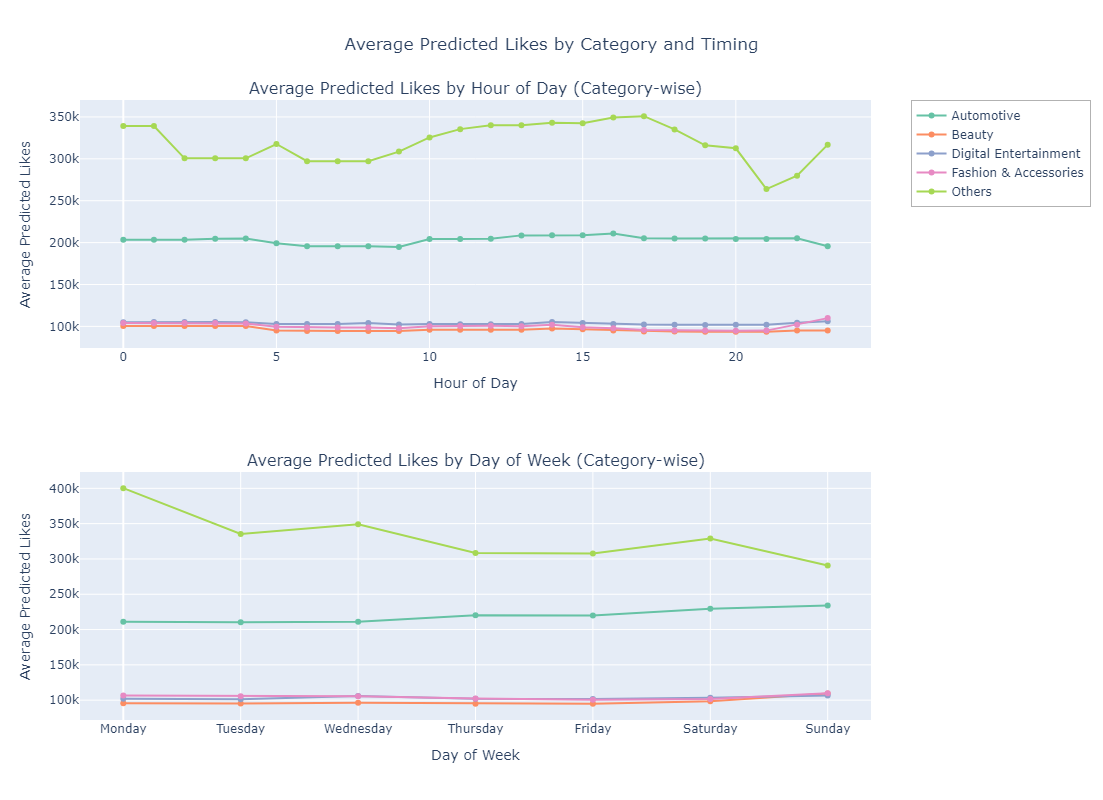

In [251]:
def analyze_category_timing(results_df):
    """
    Analyze and visualize timing effects by product category
    """
    # 创建类别映射字典，将相似类别组合
    category_mapping = {
        'Clothing_Shoes_and_Jewelry': 'Fashion & Accessories',
        'Amazon_Fashion': 'Fashion & Accessories',
        'All_Beauty': 'Beauty',
        'Digital_Music': 'Digital Entertainment',
        'CDs_and_Vinyl': 'Digital Entertainment',
        'Video_Games': 'Digital Entertainment',
        'Movies_and_TV': 'Digital Entertainment',
        'Automotive': 'Automotive',
        'Others': 'Others'
    }
    
    # 添加主类别列
    results_df['main_category'] = results_df['product_category'].map(category_mapping)
    
    # 按主类别和时间类型计算平均预测点赞数
    category_hour_means = results_df[results_df['time_type'] == 'hour'].groupby(
        ['main_category', 'time_value'])['predicted_likes'].mean().reset_index()
    
    category_day_means = results_df[results_df['time_type'] == 'day'].groupby(
        ['main_category', 'time_value'])['predicted_likes'].mean().reset_index()
    
    # 创建子图
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=('Average Predicted Likes by Hour of Day (Category-wise)',
                       'Average Predicted Likes by Day of Week (Category-wise)'),
        vertical_spacing=0.2
    )
    
    # 设置颜色
    colors = px.colors.qualitative.Set2
    
    # 绘制小时数据
    for i, category in enumerate(category_hour_means['main_category'].unique()):
        cat_data = category_hour_means[category_hour_means['main_category'] == category]
        
        fig.add_trace(
            go.Scatter(
                x=cat_data['time_value'],
                y=cat_data['predicted_likes'],
                name=category,
                mode='lines+markers',
                line=dict(color=colors[i % len(colors)]),
                hovertemplate='Hour: %{x}<br>Avg Predicted Likes: %{y:.0f}<extra></extra>'
            ),
            row=1, col=1
        )
    
    # 绘制星期数据
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    for i, category in enumerate(category_day_means['main_category'].unique()):
        cat_data = category_day_means[category_day_means['main_category'] == category]
        
        fig.add_trace(
            go.Scatter(
                x=cat_data['time_value'],
                y=cat_data['predicted_likes'],
                name=category,
                mode='lines+markers',
                line=dict(color=colors[i % len(colors)]),
                showlegend=False,
                hovertemplate='Day: %{x}<br>Avg Predicted Likes: %{y:.0f}<extra></extra>'
            ),
            row=2, col=1
        )
    
    # 更新布局
    fig.update_layout(
        height=800,
        width=1000,
        title_text="Average Predicted Likes by Category and Timing",
        title_x=0.5,
        showlegend=True,
        legend=dict(
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.05,
            bgcolor='rgba(255, 255, 255, 0.8)',
            bordercolor='rgba(0, 0, 0, 0.3)',
            borderwidth=1
        ),
        margin=dict(r=200)
    )
    
    fig.update_xaxes(title_text="Hour of Day", row=1, col=1)
    fig.update_xaxes(title_text="Day of Week", 
                     ticktext=day_names, 
                     tickvals=list(range(7)), 
                     row=2, col=1)
    fig.update_yaxes(title_text="Average Predicted Likes", row=1, col=1)
    fig.update_yaxes(title_text="Average Predicted Likes", row=2, col=1)
    
    return fig

# 使用获取的results_df生成新的可视化
if results_df is not None:
    category_timing_plot = analyze_category_timing(results_df)
    category_timing_plot.show()
else:
    print("No data available for category analysis")

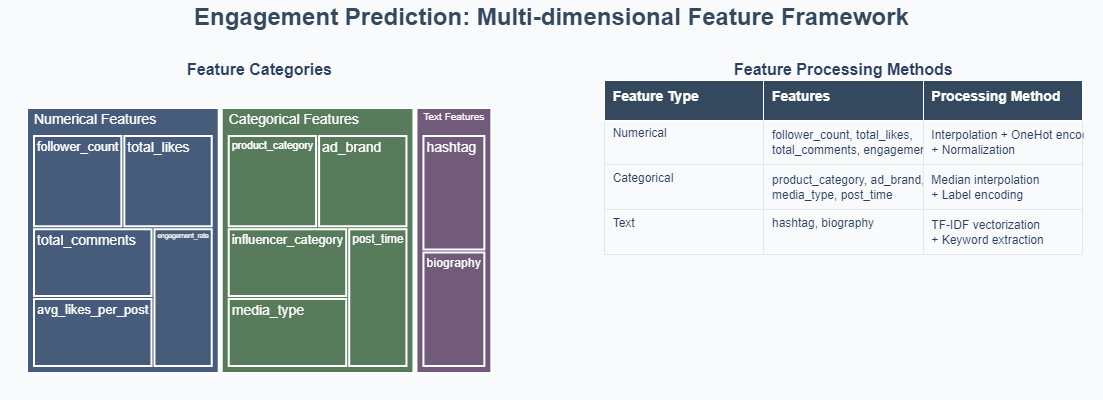

In [255]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def create_enhanced_feature_framework():
    # 创建主图布局
    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.5, 0.5],
        subplot_titles=(
            "<b>Feature Categories</b>",
            "<b>Feature Processing Methods</b>"
        ),
        specs=[[{"type": "treemap"}, {"type": "table"}]]
    )

    # 定义配色方案
    colors = {
        'numerical': '#465C7A',    # 深蓝灰色
        'categorical': '#587B5C',  # 深绿色
        'text': '#725A7A',        # 深紫色
        'header': '#34495E',      # 标题蓝色
        'background': '#F8FAFC'   # 浅灰背景
    }

    # 创建特征树状图
    treemap = go.Treemap(
        labels=[
            "Numerical Features", "Categorical Features", "Text Features",
            "follower_count", "total_likes", "total_comments", "avg_likes_per_post", "engagement_rate",
            "product_category", "ad_brand", "influencer_category", "media_type", "post_time",
            "hashtag", "biography"
        ],
        parents=[
            "", "", "",
            "Numerical Features", "Numerical Features", "Numerical Features", "Numerical Features", "Numerical Features",
            "Categorical Features", "Categorical Features", "Categorical Features", "Categorical Features", "Categorical Features",
            "Text Features", "Text Features"
        ],
        marker=dict(
            colors=[
                colors['numerical'], colors['categorical'], colors['text'],
                *[colors['numerical']]*5,
                *[colors['categorical']]*5,
                *[colors['text']]*2
            ],
            line=dict(width=2, color='white')
        ),
        textfont=dict(size=14, color='white'),
        hovertemplate='Feature: %{label}<extra></extra>'
    )

    # 创建处理方法表格
    table = go.Table(
        header=dict(
            values=[
                '<b>Feature Type</b>', 
                '<b>Features</b>', 
                '<b>Processing Method</b>'
            ],
            fill_color=colors['header'],
            align=['left', 'left', 'left'],
            font=dict(size=14, color='white'),
            height=40
        ),
        cells=dict(
            values=[
                ['Numerical', 'Categorical', 'Text'],
                [
                    'follower_count, total_likes,<br>total_comments, engagement_rate',
                    'product_category, ad_brand,<br>media_type, post_time',
                    'hashtag, biography'
                ],
                [
                    'Interpolation + OneHot encoding<br>+ Normalization',
                    'Median interpolation<br>+ Label encoding',
                    'TF-IDF vectorization<br>+ Keyword extraction'
                ]
            ],
            fill_color=[
                [colors['background']]*3,
                [colors['background']]*3,
                [colors['background']]*3
            ],
            align=['left', 'left', 'left'],
            font=dict(size=12),
            height=30,
            line=dict(color='#E1E8ED', width=1)
        )
    )

    # 添加图表元素
    fig.add_trace(treemap, row=1, col=1)
    fig.add_trace(table, row=1, col=2)

    # 更新布局
    fig.update_layout(
        title=dict(
            text='<b>Engagement Prediction: Multi-dimensional Feature Framework</b>',
            x=0.5,
            y=0.98,
            xanchor='center',
            yanchor='top',
            font=dict(size=24, color=colors['header'])
        ),
        showlegend=False,
        height=400,
        width=1000,
        margin=dict(t=80, l=20, r=20, b=20),
        paper_bgcolor=colors['background'],
        plot_bgcolor=colors['background'],
        font=dict(family="Arial"),
    )

    # 更新子图标题样式
    fig.update_annotations(font_size=16)

    return fig

# 创建和显示图表
fig = create_enhanced_feature_framework()
fig.show()

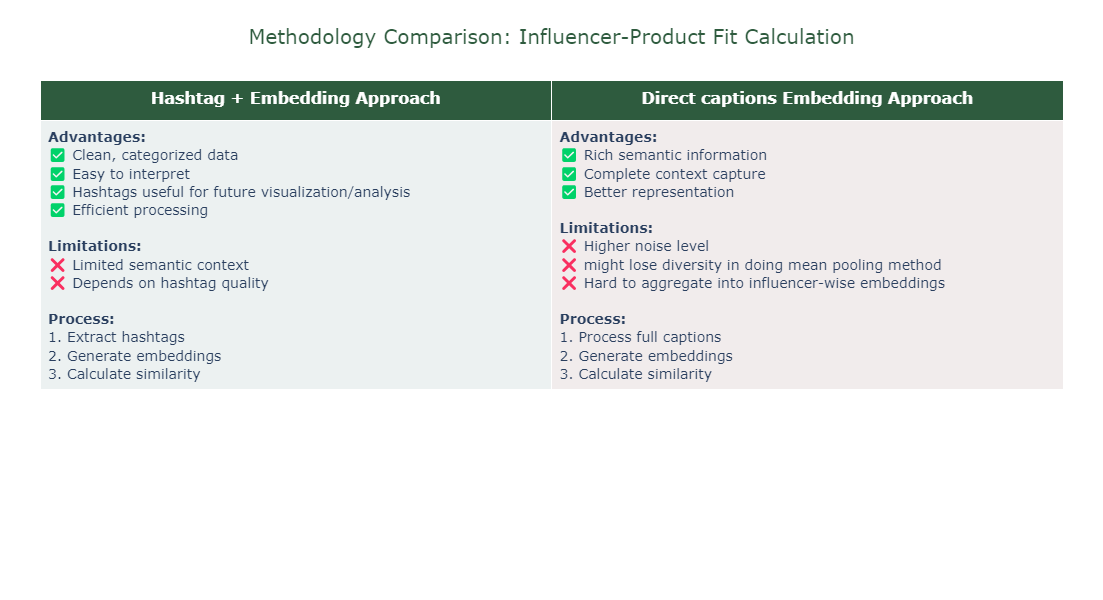

In [271]:
import plotly.graph_objects as go

def create_methodology_comparison():
    # 创建表格
    fig = go.Figure(data=[go.Table(
        columnwidth=[3, 3],
        header=dict(
            values=['<b>Hashtag + Embedding Approach</b>', '<b>Direct captions Embedding Approach</b>'],
            fill_color='#2E5B3E',
            align=['center', 'center'],
            font=dict(color='white', size=16),
            height=40
        ),
        cells=dict(
            values=[
                [
                    '<b>Advantages:</b><br>' +
                    '✅ Clean, categorized data<br>' +
                    '✅ Easy to interpret<br>' +
                    '✅ Hashtags useful for future visualization/analysis<br>' +
                    '✅ Efficient processing<br><br>' +
                    '<b>Limitations:</b><br>' +
                    '❌ Limited semantic context<br>' +
                    '❌ Depends on hashtag quality<br><br>' +
                    '<b>Process:</b><br>' +
                    '1. Extract hashtags<br>' +
                    '2. Generate embeddings<br>' +
                    '3. Calculate similarity'
                ],
                [
                    '<b>Advantages:</b><br>' +
                    '✅ Rich semantic information<br>' +
                    '✅ Complete context capture<br>' +
                    '✅ Better representation<br><br>' +
                    '<b>Limitations:</b><br>' +
                    '❌ Higher noise level<br>' +
                    '❌ might lose diversity in doing mean pooling method<br>' +
                    '❌ Hard to aggregate into influencer-wise embeddings<br><br>' +
                    '<b>Process:</b><br>' +
                    '1. Process full captions<br>' +
                    '2. Generate embeddings<br>' +
                    '3. Calculate similarity'
                ]
            ],
            align=['left', 'left'],
            font=dict(size=14),
            height=30,
            fill_color=['rgba(158, 185, 185, 0.2)', 'rgba(185, 158, 158, 0.2)']
        )
    )])

    # 更新布局
    fig.update_layout(
        title=dict(
            text='Methodology Comparison: Influencer-Product Fit Calculation',
            x=0.5,
            y=0.95,
            xanchor='center',
            yanchor='top',
            font=dict(size=20, color='#2E5B3E')
        ),
        width=1000,
        height=600,
        margin=dict(t=80, l=40, r=40, b=40),
        paper_bgcolor='white'
    )

    return fig

# 创建和显示图表
fig = create_methodology_comparison()
fig.show()

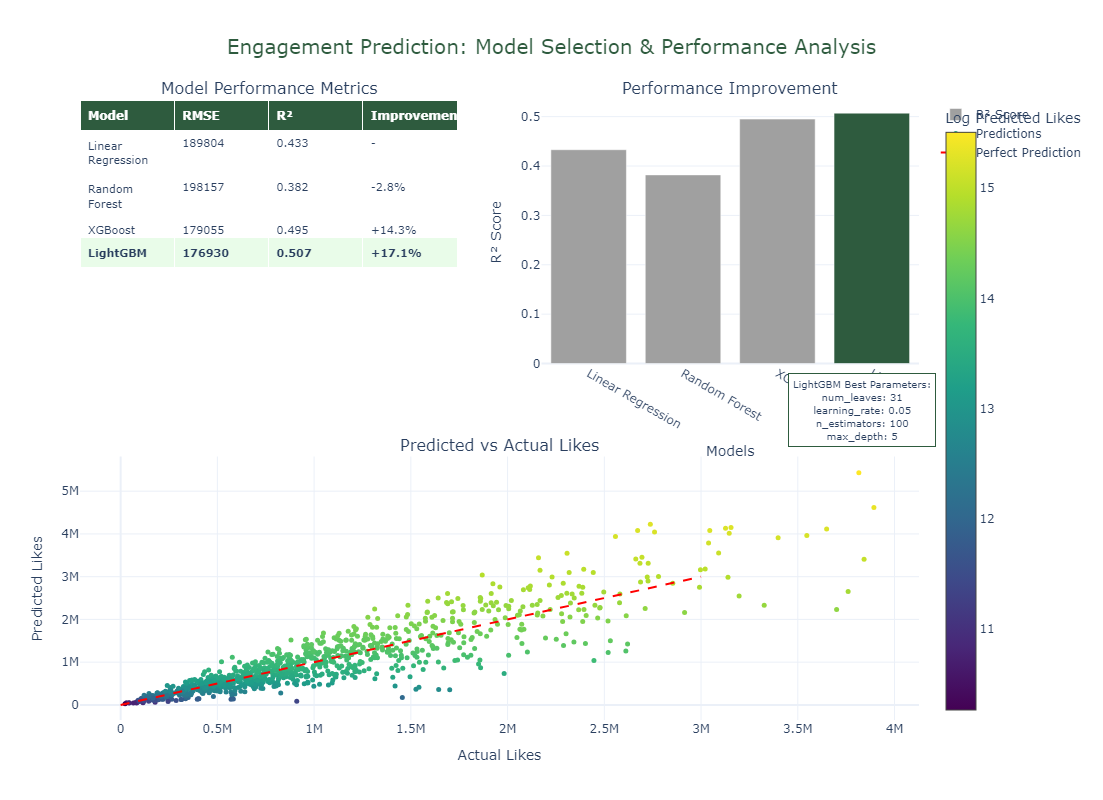

In [275]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def create_model_selection_dashboard():
    # 创建模拟数据
    np.random.seed(42)
    actual_likes = np.random.gamma(2, 500000, 1000)  
    predicted_likes = actual_likes * (1 + np.random.normal(0, 0.3, 1000))  
    
    # 创建子图布局
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            "Model Performance Metrics",
            "Performance Improvement",
            "Predicted vs Actual Likes",
            "Model Training Time"
        ),
        specs=[
            [{"type": "table"}, {"type": "bar"}],
            [{"type": "scatter", "colspan": 2}, None]
        ],
        vertical_spacing=0.15,
        horizontal_spacing=0.1
    )

    # 添加模型性能表格
    model_table = go.Table(
        header=dict(
            values=['<b>Model</b>', '<b>RMSE</b>', '<b>R²</b>', '<b>Improvement</b>'],
            fill_color='#2E5B3E',
            align='left',
            font=dict(color='white', size=12)
        ),
        cells=dict(
            values=[
                ['Linear Regression', 'Random Forest', 'XGBoost', '<b>LightGBM</b>'],
                ['189804', '198157', '179055', '<b>176930</b>'],
                ['0.433', '0.382', '0.495', '<b>0.507</b>'],
                ['-', '-2.8%', '+14.3%', '<b>+17.1%</b>']
            ],
            fill_color=[['white', 'white', 'white', 'rgba(144, 238, 144, 0.2)']]*4,
            align='left',
            font=dict(size=11)
        )
    )
    
    # 添加性能提升条形图
    improvement_bar = go.Bar(
        x=['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
        y=[0.433, 0.382, 0.495, 0.507],
        marker=dict(
            color=['#A0A0A0', '#A0A0A0', '#A0A0A0', '#2E5B3E']
        ),
        name='R² Score'
    )

    # 添加散点图（带密度颜色）
    scatter = go.Scatter(
        x=actual_likes,
        y=predicted_likes,
        mode='markers',
        marker=dict(
            size=5,
            color=np.log1p(predicted_likes),
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title='Log Predicted Likes')
        ),
        name='Predictions'
    )

    # 添加完美预测线
    perfect_line = go.Scatter(
        x=[0, 3e6],
        y=[0, 3e6],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', dash='dash')
    )

    # 将所有图表添加到子图中
    fig.add_trace(model_table, row=1, col=1)
    fig.add_trace(improvement_bar, row=1, col=2)
    fig.add_trace(scatter, row=2, col=1)
    fig.add_trace(perfect_line, row=2, col=1)

    # 更新布局
    fig.update_layout(
        title=dict(
            text='Engagement Prediction: Model Selection & Performance Analysis',
            x=0.5,
            y=0.95,
            font=dict(size=20, color='#2E5B3E')
        ),
        showlegend=True,
        height=800,
        width=1200,
        template='plotly_white'
    )

    # 更新坐标轴
    fig.update_xaxes(title_text="Actual Likes", row=2, col=1)
    fig.update_yaxes(title_text="Predicted Likes", row=2, col=1)
    fig.update_xaxes(title_text="Models", row=1, col=2)
    fig.update_yaxes(title_text="R² Score", row=1, col=2)

    # 添加LightGBM最佳参数注释
    fig.add_annotation(
        text='LightGBM Best Parameters:<br>' +
             'num_leaves: 31<br>' +
             'learning_rate: 0.05<br>' +
             'n_estimators: 100<br>' +
             'max_depth: 5',
        xref='paper',
        yref='paper',
        x=1.02,
        y=0.5,
        showarrow=False,
        bordercolor='#2E5B3E',
        borderwidth=1,
        borderpad=4,
        bgcolor='white',
        font=dict(size=10)
    )

    return fig

# 创建和显示仪表板
fig = create_model_selection_dashboard()
fig.show()